# Separate runs by HKLE due to size limits

In [1]:
datafile='TCGA/focused.1000.T.csv.gz'

In [2]:
hkle='HERVK113'

['HERVK113', 'SVA_A', 'SVA_B', 'SVA_C', 'SVA_D', 'SVA_E', 'SVA_F']

In [3]:
threshold=3

---

In [4]:
import numpy as np
np.__version__

'1.20.3'

In [5]:
import pandas as pd
pd.__version__

'1.2.4'

In [6]:
import matplotlib
matplotlib.__version__

'3.4.2'

In [7]:
import matplotlib.pyplot as plt

In [8]:
# Adjust plot size
#options(repr.plot.width=16, repr.plot.height=6)

# For some reason, if this is in the same cell as the import command, it doesn't work.
plt.rcParams["figure.figsize"] = [18.0,8.0]

In [9]:
import scipy
scipy.__version__

'1.7.0'

In [10]:
from scipy import stats

In [11]:
import seaborn as sns
sns.__version__

'0.11.1'

In [12]:
from datetime import datetime

In [13]:
import sklearn
sklearn.__version__

'0.24.2'

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [15]:
default_max_columns=pd.get_option('display.max_columns')

In [16]:
default_max_rows=pd.get_option('display.max_rows')

In [17]:
default_precision=pd.get_option('display.precision')

In [18]:
pd.set_option('display.precision', 2)

In [19]:
#default_threshold=np.get_printoptions()['threshold']

In [20]:
#np.set_printoptions(threshold=10000000)

---

# Read Metadata 1

In [21]:
mt1=pd.read_csv("TCGA/metadata.cart.TCGA.GBM-LGG.WGS.bam.2020-07-17.csv",header=None,
 names=['subject','sequencing','days_to_death','gender','disease_type','center_name','unknown'])
mt1.head()

subject               sequencing  days_to_death  gender  \
0  02-2483  02-2483-01A-01D-1494-08            NaN    male   
1  02-2483  02-2483-10A-01D-1494-08            NaN    male   
2  02-2485  02-2485-01A-01D-1494-08            NaN    male   
3  02-2485  02-2485-10A-01D-1494-08            NaN    male   
4  06-0125  06-0125-01A-01D-1490-08         1448.0  female   

              disease_type                         center_name unknown  
0  Glioblastoma Multiforme  Broad Institute of MIT and Harvard  9440/3  
1  Glioblastoma Multiforme  Broad Institute of MIT and Harvard  9440/3  
2  Glioblastoma Multiforme  Broad Institute of MIT and Harvard  9440/3  
3  Glioblastoma Multiforme  Broad Institute of MIT and Harvard  9440/3  
4  Glioblastoma Multiforme  Broad Institute of MIT and Harvard  9440/3

In [22]:
mt1.shape

(278, 7)

In [23]:
mt1.rename(columns={"submitter": "subject"},inplace=True)
mt1.rename(columns={"gender": "gender1"},inplace=True)
mt1.shape

(278, 7)

In [24]:
mt1=mt1.drop('sequencing',axis='columns')
mt1=mt1.drop_duplicates()
mt1.shape

(127, 6)

In [25]:
list(mt1)

['subject',
 'days_to_death',
 'gender1',
 'disease_type',
 'center_name',
 'unknown']

In [26]:
mt1['subject']

0      02-2483
2      02-2485
4      06-0125
7      06-0152
8      06-0157
        ...   
263    IK-7675
265    TM-A7CF
268    TQ-A7RK
272    TQ-A7RV
275    TQ-A8XE
Name: subject, Length: 127, dtype: object

---

# Read Metadata 2

In [27]:
mt2=pd.read_csv("TCGA/TCGA.Glioma.metadata.tsv",sep="\t")

In [28]:
mt2.shape

(1114, 18)

In [29]:
mt2.head()

case_submitter_id project_id primary_diagnosis   race  \
0      TCGA-02-0001   TCGA-GBM      Glioblastoma  white   
1      TCGA-02-0003   TCGA-GBM      Glioblastoma  white   
2      TCGA-02-0004   TCGA-GBM      Glioblastoma  white   
3      TCGA-02-0006   TCGA-GBM      Glioblastoma  white   
4      TCGA-02-0007   TCGA-GBM      Glioblastoma  white   

                ethnicity  gender RE_names IDH     x1p19q TERT  \
0  not hispanic or latino  female      NaN  WT  non-codel  NaN   
1  not hispanic or latino    male      NaN  WT  non-codel  NaN   
2  not hispanic or latino    male      NaN  WT        NaN  NaN   
3  not hispanic or latino  female      NaN  WT  non-codel  NaN   
4  not hispanic or latino  female      NaN  WT  non-codel  NaN   

         IDH_1p19q_status                           WHO_groups  \
0  IDH-WT:1p19q-non-codel  glioblastoma:IDH-WT:1p19q-non-codel   
1  IDH-WT:1p19q-non-codel  glioblastoma:IDH-WT:1p19q-non-codel   
2         IDH-WT:1p19q-NA                                  NaN   
3  IDH-WT:1p19q-non-codel  glioblastoma:IDH-WT:1p19q-non-codel   
4  IDH-WT:1p19q-non-codel  glioblastoma:IDH-WT:1p19q-non-codel   

                     Triple_group     Tissue_sample_location          MGMT  \
0  IDH-WT:1p19q-non-codel:TERT-NA  MD Anderson Cancer Center  Unmethylated   
1  IDH-WT:1p19q-non-codel:TERT-NA  MD Anderson Cancer Center  Unmethylated   
2         IDH-WT:1p19q-NA:TERT-NA  MD Anderson Cancer Center           NaN   
3  IDH-WT:1p19q-non-codel:TERT-NA  MD Anderson Cancer Center  Unmethylated   
4  IDH-WT:1p19q-non-codel:TERT-NA  MD Anderson Cancer Center  Unmethylated   

    Age  Survival_months  Vital_status  
0  44.0            11.76           1.0  
1  50.0             4.73           1.0  
2  59.0            11.33           1.0  
3  56.0            18.33           1.0  
4  40.0            23.16           1.0

In [30]:
list(mt2)

['case_submitter_id',
 'project_id',
 'primary_diagnosis',
 'race',
 'ethnicity',
 'gender',
 'RE_names',
 'IDH',
 'x1p19q',
 'TERT',
 'IDH_1p19q_status',
 'WHO_groups',
 'Triple_group',
 'Tissue_sample_location',
 'MGMT',
 'Age',
 'Survival_months',
 'Vital_status']

In [31]:
mt2['subject']=mt2['case_submitter_id'].astype(str).str[5:12]

In [32]:
mt2[['subject','case_submitter_id']].head()

subject case_submitter_id
0  02-0001      TCGA-02-0001
1  02-0003      TCGA-02-0003
2  02-0004      TCGA-02-0004
3  02-0006      TCGA-02-0006
4  02-0007      TCGA-02-0007

In [33]:
mt2.drop('case_submitter_id',axis='columns',inplace=True)
mt2.rename(columns={"gender": "gender2"},inplace=True)

In [34]:
list(mt2)

['project_id',
 'primary_diagnosis',
 'race',
 'ethnicity',
 'gender2',
 'RE_names',
 'IDH',
 'x1p19q',
 'TERT',
 'IDH_1p19q_status',
 'WHO_groups',
 'Triple_group',
 'Tissue_sample_location',
 'MGMT',
 'Age',
 'Survival_months',
 'Vital_status',
 'subject']

---

# Merge Metadata

In [35]:
meta=mt2.merge(mt1,on='subject',suffixes=["_mt2","_mt1"],how='inner')

In [36]:
del mt1
del mt2

In [37]:
meta.head()

project_id primary_diagnosis                       race  \
0   TCGA-GBM      Glioblastoma                      asian   
1   TCGA-GBM      Glioblastoma  black or african american   
2   TCGA-GBM      Glioblastoma                      white   
3   TCGA-GBM      Glioblastoma                      white   
4   TCGA-GBM      Glioblastoma                      white   

                ethnicity gender2                   RE_names     IDH  \
0  not hispanic or latino    male  02-2483-01A-01R-1849-01+1  Mutant   
1  not hispanic or latino    male  02-2485-01A-01R-1849-01+1      WT   
2  not hispanic or latino  female  06-0125-01A-01R-1849-01+1      WT   
3  not hispanic or latino    male                        NaN      WT   
4  not hispanic or latino  female  06-0157-01A-01R-1849-01+1      WT   

      x1p19q    TERT            IDH_1p19q_status  ...          MGMT   Age  \
0  non-codel      WT  IDH-Mutant:1p19q-non-codel  ...    Methylated  43.0   
1  non-codel  Mutant      IDH-WT:1p19q-non-codel  ...  Unmethylated  53.0   
2  non-codel  Mutant      IDH-WT:1p19q-non-codel  ...    Methylated  63.0   
3  non-codel     NaN      IDH-WT:1p19q-non-codel  ...           NaN  68.0   
4  non-codel  Mutant      IDH-WT:1p19q-non-codel  ...           NaN  63.0   

  Survival_months Vital_status  subject  days_to_death  gender1  \
0           15.31          0.0  02-2483            NaN     male   
1           15.44          0.0  02-2485            NaN     male   
2           47.57          1.0  06-0125         1448.0   female   
3           12.32          1.0  06-0152          375.0     male   
4            3.19          1.0  06-0157           97.0   female   

              disease_type                         center_name unknown  
0  Glioblastoma Multiforme  Broad Institute of MIT and Harvard  9440/3  
1  Glioblastoma Multiforme  Broad Institute of MIT and Harvard  9440/3  
2  Glioblastoma Multiforme  Broad Institute of MIT and Harvard  9440/3  
3  Glioblastoma Multiforme  Broad Institute of MIT and Harvard  9440/3  
4  Glioblastoma Multiforme  Broad Institute of MIT and Harvard  9440/3  

[5 rows x 23 columns]

In [38]:
meta.drop(meta[(meta['subject']=='CS-6186') & (meta['center_name']=='Harvard Medical School')].index,inplace=True)

In [39]:
meta.drop(meta[(meta['subject']=='DU-5872') & (meta['center_name']=='Harvard Medical School')].index,inplace=True)

In [40]:
meta.columns

Index(['project_id', 'primary_diagnosis', 'race', 'ethnicity', 'gender2',
       'RE_names', 'IDH', 'x1p19q', 'TERT', 'IDH_1p19q_status', 'WHO_groups',
       'Triple_group', 'Tissue_sample_location', 'MGMT', 'Age',
       'Survival_months', 'Vital_status', 'subject', 'days_to_death',
       'gender1', 'disease_type', 'center_name', 'unknown'],
      dtype='object')

In [41]:
meta['primary_diagnosis'].value_counts()

Glioblastoma                     35
Oligodendroglioma, NOS           33
Astrocytoma, anaplastic          24
Mixed glioma                     16
Astrocytoma, NOS                  9
Oligodendroglioma, anaplastic     8
Name: primary_diagnosis, dtype: int64

In [42]:
meta['TERT'].value_counts()

Mutant    68
WT        54
Name: TERT, dtype: int64

In [43]:
meta['IDH'].value_counts()

Mutant    74
WT        50
Name: IDH, dtype: int64

In [44]:
meta['x1p19q'].value_counts()

non-codel    102
codel         23
Name: x1p19q, dtype: int64

In [45]:
meta['disease_type'].value_counts()

Brain Lower Grade Glioma    90
Glioblastoma Multiforme     35
Name: disease_type, dtype: int64

In [46]:
meta['gender1'].value_counts()

male      72
female    53
Name: gender1, dtype: int64

In [47]:
meta['race'].value_counts()

white                        114
black or african american      7
not reported                   3
asian                          1
Name: race, dtype: int64

In [48]:
meta['ethnicity'].value_counts()

not hispanic or latino    108
not reported               11
hispanic or latino          6
Name: ethnicity, dtype: int64

In [49]:
meta['IDH_1p19q_status'].value_counts()

IDH-Mutant:1p19q-non-codel    51
IDH-WT:1p19q-non-codel        50
IDH-Mutant:1p19q-codel        23
IDH-NA:1p19q-non-codel         1
Name: IDH_1p19q_status, dtype: int64

In [50]:
meta['WHO_groups'].value_counts()

glioblastoma:IDH-WT:1p19q-non-codel             29
oligodendroglioma:IDH-Mutant:1p19q-codel        23
astrocytoma:IDH-Mutant:1p19q-non-codel          18
astrocytoma:IDH-WT:1p19q-non-codel              13
oligodendroglioma:IDH-Mutant:1p19q-non-codel    13
oligoastrocytoma:IDH-Mutant:1p19q-non-codel     11
glioblastoma:IDH-Mutant:1p19q-non-codel          5
oligodendroglioma:IDH-WT:1p19q-non-codel         4
oligoastrocytoma:IDH-WT:1p19q-non-codel          4
Name: WHO_groups, dtype: int64

In [51]:
meta['Triple_group'].value_counts()

IDH-Mutant:1p19q-non-codel:TERT-WT        49
IDH-WT:1p19q-non-codel:TERT-Mutant        44
IDH-Mutant:1p19q-codel:TERT-Mutant        22
IDH-WT:1p19q-non-codel:TERT-WT             4
IDH-WT:1p19q-non-codel:TERT-NA             2
IDH-Mutant:1p19q-codel:TERT-WT             1
IDH-NA:1p19q-non-codel:TERT-Mutant         1
IDH-Mutant:1p19q-non-codel:TERT-NA         1
IDH-Mutant:1p19q-non-codel:TERT-Mutant     1
Name: Triple_group, dtype: int64

In [52]:
meta['MGMT'].value_counts()

Methylated      87
Unmethylated    27
Name: MGMT, dtype: int64

In [53]:
meta['center_name'].value_counts()

Broad Institute of MIT and Harvard    75
Harvard Medical School                50
Name: center_name, dtype: int64

---

# Read raw data and cleanup

In [54]:
#df=pd.read_csv("focused.csv.gz",header=[0,1,2,3],index_col=[0,1])
#df.columns.names=['sample','pup','hkle','q']
#df=df.T
df=pd.read_csv(datafile,header=[0,1],index_col=[0,1,2,3])
#df.reset_index(inplace=True)
#df=pd.read_csv(datafile,header=[0,1]) #,index_col=[0,1,2,3])
df.head()

chromosome                                   chr1                          \
position                                  1102000 1308000 1409000 1410000   
sample               pup    hkle     mapq                                   
02-2483-01A-01D-1494 paired HERVK113 Q20        0       0       4       1   
                            SVA_A    Q20        0       0       0       0   
                            SVA_B    Q20        0       0       0       0   
                            SVA_C    Q20        0       0       0       0   
                            SVA_D    Q20        0       0       0       0   

chromosome                                                                 \
position                                  1580000 1581000 2211000 3129000   
sample               pup    hkle     mapq                                   
02-2483-01A-01D-1494 paired HERVK113 Q20        4       0       0       0   
                            SVA_A    Q20        0       0       0       0   
                            SVA_B    Q20        0       0       0       0   
                            SVA_C    Q20        0       0       0       0   
                            SVA_D    Q20        0       0       0       0   

chromosome                                                 ...     chrY  \
position                                  3315000 3321000  ... 15075000   
sample               pup    hkle     mapq                  ...            
02-2483-01A-01D-1494 paired HERVK113 Q20        0       0  ...        0   
                            SVA_A    Q20        0       0  ...        0   
                            SVA_B    Q20        0       0  ...        0   
                            SVA_C    Q20        0       0  ...        0   
                            SVA_D    Q20        0       0  ...        0   

chromosome                                                                     \
position                                  15774000 17181000 19536000 19699000   
sample               pup    hkle     mapq                                       
02-2483-01A-01D-1494 paired HERVK113 Q20         0        0        0        2   
                            SVA_A    Q20         0        0        0        0   
                            SVA_B    Q20         0        0        0        0   
                            SVA_C    Q20         0        0        0        0   
                            SVA_D    Q20         0        0        0        0   

chromosome                                                                     \
position                                  19700000 20553000 20976000 21047000   
sample               pup    hkle     mapq                                       
02-2483-01A-01D-1494 paired HERVK113 Q20         0        0        0        0   
                            SVA_A    Q20         0        0        0        0   
                            SVA_B    Q20         0        0        0        0   
                            SVA_C    Q20         0        0        0        0   
                            SVA_D    Q20         0        0        0        0   

chromosome                                          
position                                  21217000  
sample               pup    hkle     mapq           
02-2483-01A-01D-1494 paired HERVK113 Q20         0  
                            SVA_A    Q20         0  
                            SVA_B    Q20         0  
                            SVA_C    Q20         0  
                            SVA_D    Q20         0  

[5 rows x 12550 columns]

In [55]:
df.columns= [' '.join(col).strip() for col in df.columns.values]
df.head()

chr1 1102000  chr1 1308000  \
sample               pup    hkle     mapq                               
02-2483-01A-01D-1494 paired HERVK113 Q20              0             0   
                            SVA_A    Q20              0             0   
                            SVA_B    Q20              0             0   
                            SVA_C    Q20              0             0   
                            SVA_D    Q20              0             0   

                                           chr1 1409000  chr1 1410000  \
sample               pup    hkle     mapq                               
02-2483-01A-01D-1494 paired HERVK113 Q20              4             1   
                            SVA_A    Q20              0             0   
                            SVA_B    Q20              0             0   
                            SVA_C    Q20              0             0   
                            SVA_D    Q20              0             0   

                                           chr1 1580000  chr1 1581000  \
sample               pup    hkle     mapq                               
02-2483-01A-01D-1494 paired HERVK113 Q20              4             0   
                            SVA_A    Q20              0             0   
                            SVA_B    Q20              0             0   
                            SVA_C    Q20              0             0   
                            SVA_D    Q20              0             0   

                                           chr1 2211000  chr1 3129000  \
sample               pup    hkle     mapq                               
02-2483-01A-01D-1494 paired HERVK113 Q20              0             0   
                            SVA_A    Q20              0             0   
                            SVA_B    Q20              0             0   
                            SVA_C    Q20              0             0   
                            SVA_D    Q20              0             0   

                                           chr1 3315000  chr1 3321000  ...  \
sample               pup    hkle     mapq                              ...   
02-2483-01A-01D-1494 paired HERVK113 Q20              0             0  ...   
                            SVA_A    Q20              0             0  ...   
                            SVA_B    Q20              0             0  ...   
                            SVA_C    Q20              0             0  ...   
                            SVA_D    Q20              0             0  ...   

                                           chrY 15075000  chrY 15774000  \
sample               pup    hkle     mapq                                 
02-2483-01A-01D-1494 paired HERVK113 Q20               0              0   
                            SVA_A    Q20               0              0   
                            SVA_B    Q20               0              0   
                            SVA_C    Q20               0              0   
                            SVA_D    Q20               0              0   

                                           chrY 17181000  chrY 19536000  \
sample               pup    hkle     mapq                                 
02-2483-01A-01D-1494 paired HERVK113 Q20               0              0   
                            SVA_A    Q20               0              0   
                            SVA_B    Q20               0              0   
                            SVA_C    Q20               0              0   
                            SVA_D    Q20               0              0   

                                           chrY 19699000  chrY 19700000  \
sample               pup    hkle     mapq                                 
02-2483-01A-01D-1494 paired HERVK113 Q20               2              0   
                            SVA_A    Q20               0              0   
                            SVA_B    Q20               0              0   
                     

In [56]:
df.reset_index(inplace=True)

In [57]:
df.rename(columns={"sample": "sequencing"},inplace=True)
df['sample']=df['sequencing'].str[0:11]
#df['sample']=df['sample'].str[0:11]
df['subject']=df['sample'].str[0:7]
df['subject']

0       02-2483
1       02-2483
2       02-2483
3       02-2483
4       02-2483
         ...   
1024    TQ-A8XE
1025    TQ-A8XE
1026    TQ-A8XE
1027    TQ-A8XE
1028    TQ-A8XE
Name: subject, Length: 1029, dtype: object

In [58]:
df.columns

Index(['sequencing', 'pup', 'hkle', 'mapq', 'chr1 1102000', 'chr1 1308000',
       'chr1 1409000', 'chr1 1410000', 'chr1 1580000', 'chr1 1581000',
       ...
       'chrY 17181000', 'chrY 19536000', 'chrY 19699000', 'chrY 19700000',
       'chrY 20553000', 'chrY 20976000', 'chrY 21047000', 'chrY 21217000',
       'sample', 'subject'],
      dtype='object', length=12556)

In [59]:
df.head()

sequencing     pup      hkle mapq  chr1 1102000  chr1 1308000  \
0  02-2483-01A-01D-1494  paired  HERVK113  Q20             0             0   
1  02-2483-01A-01D-1494  paired     SVA_A  Q20             0             0   
2  02-2483-01A-01D-1494  paired     SVA_B  Q20             0             0   
3  02-2483-01A-01D-1494  paired     SVA_C  Q20             0             0   
4  02-2483-01A-01D-1494  paired     SVA_D  Q20             0             0   

   chr1 1409000  chr1 1410000  chr1 1580000  chr1 1581000  ...  chrY 17181000  \
0             4             1             4             0  ...              0   
1             0             0             0             0  ...              0   
2             0             0             0             0  ...              0   
3             0             0             0             0  ...              0   
4             0             0             0             0  ...              0   

   chrY 19536000  chrY 19699000  chrY 19700000  chrY 20553000  chrY 20976000  \
0              0              2              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   chrY 21047000  chrY 21217000       sample  subject  
0              0              0  02-2483-01A  02-2483  
1              0              0  02-2483-01A  02-2483  
2              0              0  02-2483-01A  02-2483  
3              0              0  02-2483-01A  02-2483  
4              0              0  02-2483-01A  02-2483  

[5 rows x 12556 columns]

In [60]:
df=df[df['hkle']==hkle]

In [61]:
#df.set_index(['subject','sample','sequencing','pup','hkle','mapq'],inplace=True)
df.set_index(['subject','sample','sequencing','pup','hkle','mapq'],inplace=True)
df.head()

chr1 1102000  \
subject sample      sequencing           pup    hkle     mapq                 
02-2483 02-2483-01A 02-2483-01A-01D-1494 paired HERVK113 Q20              0   
        02-2483-10A 02-2483-10A-01D-1494 paired HERVK113 Q20              0   
02-2485 02-2485-01A 02-2485-01A-01D-1494 paired HERVK113 Q20              0   
        02-2485-10A 02-2485-10A-01D-1494 paired HERVK113 Q20              0   
06-0125 06-0125-01A 06-0125-01A-01D-1490 paired HERVK113 Q20              0   

                                                               chr1 1308000  \
subject sample      sequencing           pup    hkle     mapq                 
02-2483 02-2483-01A 02-2483-01A-01D-1494 paired HERVK113 Q20              0   
        02-2483-10A 02-2483-10A-01D-1494 paired HERVK113 Q20              0   
02-2485 02-2485-01A 02-2485-01A-01D-1494 paired HERVK113 Q20              0   
        02-2485-10A 02-2485-10A-01D-1494 paired HERVK113 Q20              0   
06-0125 06-0125-01A 06-0125-01A-01D-1490 paired HERVK113 Q20              0   

                                                               chr1 1409000  \
subject sample      sequencing           pup    hkle     mapq                 
02-2483 02-2483-01A 02-2483-01A-01D-1494 paired HERVK113 Q20              4   
        02-2483-10A 02-2483-10A-01D-1494 paired HERVK113 Q20              2   
02-2485 02-2485-01A 02-2485-01A-01D-1494 paired HERVK113 Q20              3   
        02-2485-10A 02-2485-10A-01D-1494 paired HERVK113 Q20              8   
06-0125 06-0125-01A 06-0125-01A-01D-1490 paired HERVK113 Q20              9   

                                                               chr1 1410000  \
subject sample      sequencing           pup    hkle     mapq                 
02-2483 02-2483-01A 02-2483-01A-01D-1494 paired HERVK113 Q20              1   
        02-2483-10A 02-2483-10A-01D-1494 paired HERVK113 Q20              3   
02-2485 02-2485-01A 02-2485-01A-01D-1494 paired HERVK113 Q20              4   
        02-2485-10A 02-2485-10A-01D-1494 paired HERVK113 Q20              0   
06-0125 06-0125-01A 06-0125-01A-01D-1490 paired HERVK113 Q20              6   

                                                               chr1 1580000  \
subject sample      sequencing           pup    hkle     mapq                 
02-2483 02-2483-01A 02-2483-01A-01D-1494 paired HERVK113 Q20              4   
        02-2483-10A 02-2483-10A-01D-1494 paired HERVK113 Q20              3   
02-2485 02-2485-01A 02-2485-01A-01D-1494 paired HERVK113 Q20              4   
        02-2485-10A 02-2485-10A-01D-1494 paired HERVK113 Q20              0   
06-0125 06-0125-01A 06-0125-01A-01D-1490 paired HERVK113 Q20              9   

                                                               chr1 1581000  \
subject sample      sequencing           pup    hkle     mapq                 
02-2483 02-2483-01A 02-2483-01A-01D-1494 paired HERVK113 Q20              0   
        02-2483-10A 02-2483-10A-01D-1494 paired HERVK113 Q20              0   
02-2485 02-2485-01A 02-2485-01A-01D-1494 paired HERVK113 Q20              0   
        02-2485-10A 02-2485-10A-01D-1494 paired HERVK113 Q20              0   
06-0125 06-0125-01A 06-0125-01A-01D-1490 paired HERVK113 Q20              0   

                                                               chr1 2211000  \
subject sample      sequencing           pup    hkle     mapq                 
02-2483 02-2483-01A 02-2483-01A-01D-1494 paired HERVK113 Q20              0   
        02-2483-10A 02-2483-10A-01D-1494 paired HERVK113 Q20              0   
02-2485 02-2485-01A 02-2485-01A-01D-1494 paired HERVK113 Q20              0   
        02-2485-10A 02-2485-10A-01D-1494 paired HERVK113 Q20              0   
06-0125 06-0125-01A 06-0125-01A-01D-1490 paired HERVK113 Q20              0   

                                                               chr1 3129000  \
subject sample      sequencing           pup    hkle     mapq                 
02-2483 02-2483-01A 02-2483

In [62]:
df.shape

(147, 12550)

---

## Remove "pup" and "q" as they are useless in this dataset.

In [63]:
df=df.droplevel('pup',axis='index').droplevel('mapq',axis='index').droplevel('hkle',axis='index')

In [64]:
df.head()

chr1 1102000  chr1 1308000  \
subject sample      sequencing                                         
02-2483 02-2483-01A 02-2483-01A-01D-1494             0             0   
        02-2483-10A 02-2483-10A-01D-1494             0             0   
02-2485 02-2485-01A 02-2485-01A-01D-1494             0             0   
        02-2485-10A 02-2485-10A-01D-1494             0             0   
06-0125 06-0125-01A 06-0125-01A-01D-1490             0             0   

                                          chr1 1409000  chr1 1410000  \
subject sample      sequencing                                         
02-2483 02-2483-01A 02-2483-01A-01D-1494             4             1   
        02-2483-10A 02-2483-10A-01D-1494             2             3   
02-2485 02-2485-01A 02-2485-01A-01D-1494             3             4   
        02-2485-10A 02-2485-10A-01D-1494             8             0   
06-0125 06-0125-01A 06-0125-01A-01D-1490             9             6   

                                          chr1 1580000  chr1 1581000  \
subject sample      sequencing                                         
02-2483 02-2483-01A 02-2483-01A-01D-1494             4             0   
        02-2483-10A 02-2483-10A-01D-1494             3             0   
02-2485 02-2485-01A 02-2485-01A-01D-1494             4             0   
        02-2485-10A 02-2485-10A-01D-1494             0             0   
06-0125 06-0125-01A 06-0125-01A-01D-1490             9             0   

                                          chr1 2211000  chr1 3129000  \
subject sample      sequencing                                         
02-2483 02-2483-01A 02-2483-01A-01D-1494             0             0   
        02-2483-10A 02-2483-10A-01D-1494             0             0   
02-2485 02-2485-01A 02-2485-01A-01D-1494             0             0   
        02-2485-10A 02-2485-10A-01D-1494             0             0   
06-0125 06-0125-01A 06-0125-01A-01D-1490             0             0   

                                          chr1 3315000  chr1 3321000  ...  \
subject sample      sequencing                                        ...   
02-2483 02-2483-01A 02-2483-01A-01D-1494             0             0  ...   
        02-2483-10A 02-2483-10A-01D-1494             0             0  ...   
02-2485 02-2485-01A 02-2485-01A-01D-1494             0             0  ...   
        02-2485-10A 02-2485-10A-01D-1494             0             0  ...   
06-0125 06-0125-01A 06-0125-01A-01D-1490             0             0  ...   

                                          chrY 15075000  chrY 15774000  \
subject sample      sequencing                                           
02-2483 02-2483-01A 02-2483-01A-01D-1494              0              0   
        02-2483-10A 02-2483-10A-01D-1494              0              1   
02-2485 02-2485-01A 02-2485-01A-01D-1494              0              0   
        02-2485-10A 02-2485-10A-01D-1494              0              0   
06-0125 06-0125-01A 06-0125-01A-01D-1490              0              0   

                                          chrY 17181000  chrY 19536000  \
subject sample      sequencing                                           
02-2483 02-2483-01A 02-2483-01A-01D-1494              0              0   
        02-2483-10A 02-2483-10A-01D-1494              0              0   
02-2485 02-2485-01A 02-2485-01A-01D-1494              0              0   
        02-2485-10A 02-2485-10A-01D-1494              0              0   
06-0125 06-0125-01A 06-0125-01A-01D-1490              0              0   

                                          chrY 19699000  chrY 19700000  \
subject sample      sequencing                                           
02-2483 02-2483-01A 02-2483-01A-01D-1494              2              0   
        02-2483-10A 02-2483-10A-01D-1494              1              1   
02-2485 02-2485-01A 02-2485-01A-01D-1494              0              1   
        02-2485-10A 02-2485-10A-01D-1494              1              0   


In [65]:
df.shape

(147, 12550)

---

## Drop recurrent tumor (-02?)

---

## Drop solid normal (-11?) (I've seen a couple)

---

## Drop solitary tumor / normal ( not sure how to do this programmatically )

* FG-5963-01A
* CS-5390-10A

In [66]:
df.loc[df.index.get_level_values('sample') == 'FG-5963-01A'].index

MultiIndex([], names=['subject', 'sample', 'sequencing'])

In [67]:
df.drop(df.loc[df.index.get_level_values('sample') == 'FG-5963-01A'].index,axis='index',inplace=True)

In [68]:
df.loc[df.index.get_level_values('sample') == 'FG-5963-01A'].index

MultiIndex([], names=['subject', 'sample', 'sequencing'])

In [69]:
df.loc[df.index.get_level_values('sample') == "CS-5390-10A"].index

MultiIndex([('CS-5390', 'CS-5390-10A', 'CS-5390-10A-01D-1468')],
           names=['subject', 'sample', 'sequencing'])

In [70]:
df.drop(df.loc[df.index.get_level_values('sample') == "CS-5390-10A"].index,axis='index',inplace=True)

In [71]:
df.loc[df.index.get_level_values('sample') == "CS-5390-10A"].index

MultiIndex([], names=['subject', 'sample', 'sequencing'])

In [72]:
df.shape

(146, 12550)

In [73]:
df

chr1 1102000  chr1 1308000  \
subject sample      sequencing                                         
02-2483 02-2483-01A 02-2483-01A-01D-1494             0             0   
        02-2483-10A 02-2483-10A-01D-1494             0             0   
02-2485 02-2485-01A 02-2485-01A-01D-1494             0             0   
        02-2485-10A 02-2485-10A-01D-1494             0             0   
06-0125 06-0125-01A 06-0125-01A-01D-1490             0             0   
...                                                ...           ...   
TQ-A7RK TQ-A7RK-10A TQ-A7RK-10A-01D-A33W             0             0   
TQ-A7RV TQ-A7RV-01A TQ-A7RV-01A-21D-A34A             0             0   
        TQ-A7RV-10A TQ-A7RV-10A-01D-A34A             0             0   
TQ-A8XE TQ-A8XE-01A TQ-A8XE-01A-11D-A36O             0             0   
        TQ-A8XE-10A TQ-A8XE-10A-01D-A367             0             0   

                                          chr1 1409000  chr1 1410000  \
subject sample      sequencing                                         
02-2483 02-2483-01A 02-2483-01A-01D-1494             4             1   
        02-2483-10A 02-2483-10A-01D-1494             2             3   
02-2485 02-2485-01A 02-2485-01A-01D-1494             3             4   
        02-2485-10A 02-2485-10A-01D-1494             8             0   
06-0125 06-0125-01A 06-0125-01A-01D-1490             9             6   
...                                                ...           ...   
TQ-A7RK TQ-A7RK-10A TQ-A7RK-10A-01D-A33W             5             0   
TQ-A7RV TQ-A7RV-01A TQ-A7RV-01A-21D-A34A             7             2   
        TQ-A7RV-10A TQ-A7RV-10A-01D-A34A             4             2   
TQ-A8XE TQ-A8XE-01A TQ-A8XE-01A-11D-A36O             3             1   
        TQ-A8XE-10A TQ-A8XE-10A-01D-A367             0             1   

                                          chr1 1580000  chr1 1581000  \
subject sample      sequencing                                         
02-2483 02-2483-01A 02-2483-01A-01D-1494             4             0   
        02-2483-10A 02-2483-10A-01D-1494             3             0   
02-2485 02-2485-01A 02-2485-01A-01D-1494             4             0   
        02-2485-10A 02-2485-10A-01D-1494             0             0   
06-0125 06-0125-01A 06-0125-01A-01D-1490             9             0   
...                                                ...           ...   
TQ-A7RK TQ-A7RK-10A TQ-A7RK-10A-01D-A33W             2             0   
TQ-A7RV TQ-A7RV-01A TQ-A7RV-01A-21D-A34A             4             0   
        TQ-A7RV-10A TQ-A7RV-10A-01D-A34A             4             0   
TQ-A8XE TQ-A8XE-01A TQ-A8XE-01A-11D-A36O             2             0   
        TQ-A8XE-10A TQ-A8XE-10A-01D-A367             7             0   

                                          chr1 2211000  chr1 3129000  \
subject sample      sequencing                                         
02-2483 02-2483-01A 02-2483-01A-01D-1494             0             0   
        02-2483-10A 02-2483-10A-01D-1494             0             0   
02-2485 02-2485-01A 02-2485-01A-01D-1494             0             0   
        02-2485-10A 02-2485-10A-01D-1494             0             0   
06-0125 06-0125-01A 06-0125-01A-01D-1490             0             0   
...                                                ...           ...   
TQ-A7RK TQ-A7RK-10A TQ-A7RK-10A-01D-A33W             0             0   
TQ-A7RV TQ-A7RV-01A TQ-A7RV-01A-21D-A34A             0             0   
        TQ-A7RV-10A TQ-A7RV-10A-01D-A34A             0             0   
TQ-A8XE TQ-A8XE-01A TQ-A8XE-01A-11D-A36O             0             0   
        TQ-A8XE-10A TQ-A8XE-10A-01D-A367             0             0   

                                          chr1 3315000  chr1 3321000  ...  \
subject sample      sequencing                                        ...   
02-2483 02-2483-01A 02-2483-01A-01D-1494             0             0  ...   
        02-2483-10A 02-2483-10A-01D-1494             0         

---

In [74]:
#df.set_index(['subject','sample'],inplace=True)

In [75]:
tmp=df[df>threshold].count(axis='columns')
tmp

subject  sample       sequencing          
02-2483  02-2483-01A  02-2483-01A-01D-1494    104
         02-2483-10A  02-2483-10A-01D-1494    102
02-2485  02-2485-01A  02-2485-01A-01D-1494    135
         02-2485-10A  02-2485-10A-01D-1494     70
06-0125  06-0125-01A  06-0125-01A-01D-1490    267
                                             ... 
TQ-A7RK  TQ-A7RK-10A  TQ-A7RK-10A-01D-A33W     38
TQ-A7RV  TQ-A7RV-01A  TQ-A7RV-01A-21D-A34A     89
         TQ-A7RV-10A  TQ-A7RV-10A-01D-A34A     46
TQ-A8XE  TQ-A8XE-01A  TQ-A8XE-01A-11D-A36O    134
         TQ-A8XE-10A  TQ-A8XE-10A-01D-A367     47
Length: 146, dtype: int64

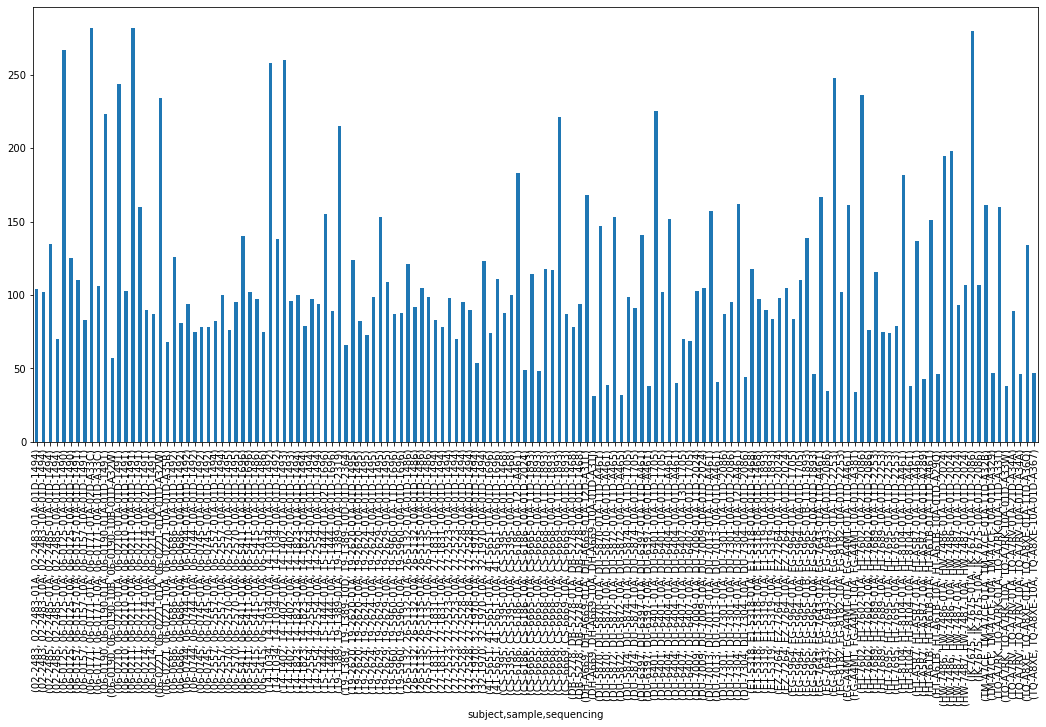

In [76]:
tmp[tmp>=0].plot(kind='bar')
plt.show()

# Read RAW read counts

In [77]:
rc=pd.read_csv('TCGA/sequencing_paired_read_counts.csv',header=None,names=['sequencing','count'])
#rc['sample']=rc['sequencing'].str[0:11]
rc.head()

sequencing       count
0  02-2483-01A-01D-1494   566024474
1  02-2483-10A-01D-1494   579304076
2  02-2485-01A-01D-1494   575060540
3  02-2485-10A-01D-1494   478851061
4  06-0125-01A-01D-1490  1066268796

---

# Normalize tmp by RAW read count

In [78]:
#df.reset_index(inplace=True)

In [79]:
#tmp=df.merge(rc,on='sample')
tmp=df.merge(rc,on='sequencing')
#tmp.drop('sequencing',axis='columns',inplace=True)
#df.set_index(['subject','sample','sequencing'],inplace=True)
#tmp.set_index(['subject','sample','sequencing'],inplace=True)
tmp.set_index(['sequencing'],inplace=True)
tmp

chr1 1102000  chr1 1308000  chr1 1409000  chr1 1410000  \
sequencing                                                                     
02-2483-01A-01D-1494             0             0             4             1   
02-2483-10A-01D-1494             0             0             2             3   
02-2485-01A-01D-1494             0             0             3             4   
02-2485-10A-01D-1494             0             0             8             0   
06-0125-01A-01D-1490             0             0             9             6   
...                            ...           ...           ...           ...   
TQ-A7RK-10A-01D-A33W             0             0             5             0   
TQ-A7RV-01A-21D-A34A             0             0             7             2   
TQ-A7RV-10A-01D-A34A             0             0             4             2   
TQ-A8XE-01A-11D-A36O             0             0             3             1   
TQ-A8XE-10A-01D-A367             0             0             0             1   

                      chr1 1580000  chr1 1581000  chr1 2211000  chr1 3129000  \
sequencing                                                                     
02-2483-01A-01D-1494             4             0             0             0   
02-2483-10A-01D-1494             3             0             0             0   
02-2485-01A-01D-1494             4             0             0             0   
02-2485-10A-01D-1494             0             0             0             0   
06-0125-01A-01D-1490             9             0             0             0   
...                            ...           ...           ...           ...   
TQ-A7RK-10A-01D-A33W             2             0             0             0   
TQ-A7RV-01A-21D-A34A             4             0             0             0   
TQ-A7RV-10A-01D-A34A             4             0             0             0   
TQ-A8XE-01A-11D-A36O             2             0             0             0   
TQ-A8XE-10A-01D-A367             7             0             0             0   

                      chr1 3315000  chr1 3321000  ...  chrY 15774000  \
sequencing                                        ...                  
02-2483-01A-01D-1494             0             0  ...              0   
02-2483-10A-01D-1494             0             0  ...              1   
02-2485-01A-01D-1494             0             0  ...              0   
02-2485-10A-01D-1494             0             0  ...              0   
06-0125-01A-01D-1490             0             0  ...              0   
...                            ...           ...  ...            ...   
TQ-A7RK-10A-01D-A33W             0             0  ...              1   
TQ-A7RV-01A-21D-A34A             0             0  ...              0   
TQ-A7RV-10A-01D-A34A             0             0  ...              0   
TQ-A8XE-01A-11D-A36O             0             0  ...              0   
TQ-A8XE-10A-01D-A367             0             0  ...              0   

                      chrY 17181000  chrY 19536000  chrY 19699000  \
sequencing                                                          
02-2483-01A-01D-1494              0              0              2   
02-2483-10A-01D-1494              0              0              1   
02-2485-01A-01D-1494              0              0              0   
02-2485-10A-01D-1494              0              0              1   
06-0125-01A-01D-1490              0              0              0   
...                             ...            ...            ...   
TQ-A7RK-10A-01D-A33W              0              0              0   
TQ-A7RV-01A-21D-A34A              0              0              0   
TQ-A7RV-10A-01D-A34A              0              0              1   
TQ-A8XE-01A-11D-A36O              0              0              0   
TQ-A8XE-10A-01D-A367              0              0              0   

                      chrY 19700000  chrY 20553000  chrY 20976000  \
sequencing                          

In [80]:
tmp[tmp.columns[tmp.columns.str.contains("^chr")]]=(
    1e9*tmp[tmp.columns[tmp.columns.str.contains("^chr")]].values)/tmp[['count']].values
tmp

chr1 1102000  chr1 1308000  chr1 1409000  chr1 1410000  \
sequencing                                                                     
02-2483-01A-01D-1494           0.0           0.0          7.07          1.77   
02-2483-10A-01D-1494           0.0           0.0          3.45          5.18   
02-2485-01A-01D-1494           0.0           0.0          5.22          6.96   
02-2485-10A-01D-1494           0.0           0.0         16.71          0.00   
06-0125-01A-01D-1490           0.0           0.0          8.44          5.63   
...                            ...           ...           ...           ...   
TQ-A7RK-10A-01D-A33W           0.0           0.0         13.41          0.00   
TQ-A7RV-01A-21D-A34A           0.0           0.0         11.17          3.19   
TQ-A7RV-10A-01D-A34A           0.0           0.0         11.03          5.52   
TQ-A8XE-01A-11D-A36O           0.0           0.0          4.14          1.38   
TQ-A8XE-10A-01D-A367           0.0           0.0          0.00          2.69   

                      chr1 1580000  chr1 1581000  chr1 2211000  chr1 3129000  \
sequencing                                                                     
02-2483-01A-01D-1494          7.07           0.0           0.0           0.0   
02-2483-10A-01D-1494          5.18           0.0           0.0           0.0   
02-2485-01A-01D-1494          6.96           0.0           0.0           0.0   
02-2485-10A-01D-1494          0.00           0.0           0.0           0.0   
06-0125-01A-01D-1490          8.44           0.0           0.0           0.0   
...                            ...           ...           ...           ...   
TQ-A7RK-10A-01D-A33W          5.36           0.0           0.0           0.0   
TQ-A7RV-01A-21D-A34A          6.38           0.0           0.0           0.0   
TQ-A7RV-10A-01D-A34A         11.03           0.0           0.0           0.0   
TQ-A8XE-01A-11D-A36O          2.76           0.0           0.0           0.0   
TQ-A8XE-10A-01D-A367         18.85           0.0           0.0           0.0   

                      chr1 3315000  chr1 3321000  ...  chrY 15774000  \
sequencing                                        ...                  
02-2483-01A-01D-1494           0.0           0.0  ...           0.00   
02-2483-10A-01D-1494           0.0           0.0  ...           1.73   
02-2485-01A-01D-1494           0.0           0.0  ...           0.00   
02-2485-10A-01D-1494           0.0           0.0  ...           0.00   
06-0125-01A-01D-1490           0.0           0.0  ...           0.00   
...                            ...           ...  ...            ...   
TQ-A7RK-10A-01D-A33W           0.0           0.0  ...           2.68   
TQ-A7RV-01A-21D-A34A           0.0           0.0  ...           0.00   
TQ-A7RV-10A-01D-A34A           0.0           0.0  ...           0.00   
TQ-A8XE-01A-11D-A36O           0.0           0.0  ...           0.00   
TQ-A8XE-10A-01D-A367           0.0           0.0  ...           0.00   

                      chrY 17181000  chrY 19536000  chrY 19699000  \
sequencing                                                          
02-2483-01A-01D-1494            0.0            0.0           3.53   
02-2483-10A-01D-1494            0.0            0.0           1.73   
02-2485-01A-01D-1494            0.0            0.0           0.00   
02-2485-10A-01D-1494            0.0            0.0           2.09   
06-0125-01A-01D-1490            0.0            0.0           0.00   
...                             ...            ...            ...   
TQ-A7RK-10A-01D-A33W            0.0            0.0           0.00   
TQ-A7RV-01A-21D-A34A            0.0            0.0           0.00   
TQ-A7RV-10A-01D-A34A            0.0            0.0           2.76   
TQ-A8XE-01A-11D-A36O            0.0            0.0           0.00   
TQ-A8XE-10A-01D-A367            0.0            0.0           0.00   

                      chrY 19700000  chrY 20553000  chrY 20976000  \
sequencing                          

In [81]:
tmp=tmp[tmp>threshold].count(axis='columns')
tmp

sequencing
02-2483-01A-01D-1494    311
02-2483-10A-01D-1494    321
02-2485-01A-01D-1494    337
02-2485-10A-01D-1494    274
06-0125-01A-01D-1490    268
                       ... 
TQ-A7RK-10A-01D-A33W    215
TQ-A7RV-01A-21D-A34A    276
TQ-A7RV-10A-01D-A34A    220
TQ-A8XE-01A-11D-A36O    218
TQ-A8XE-10A-01D-A367    222
Length: 146, dtype: int64

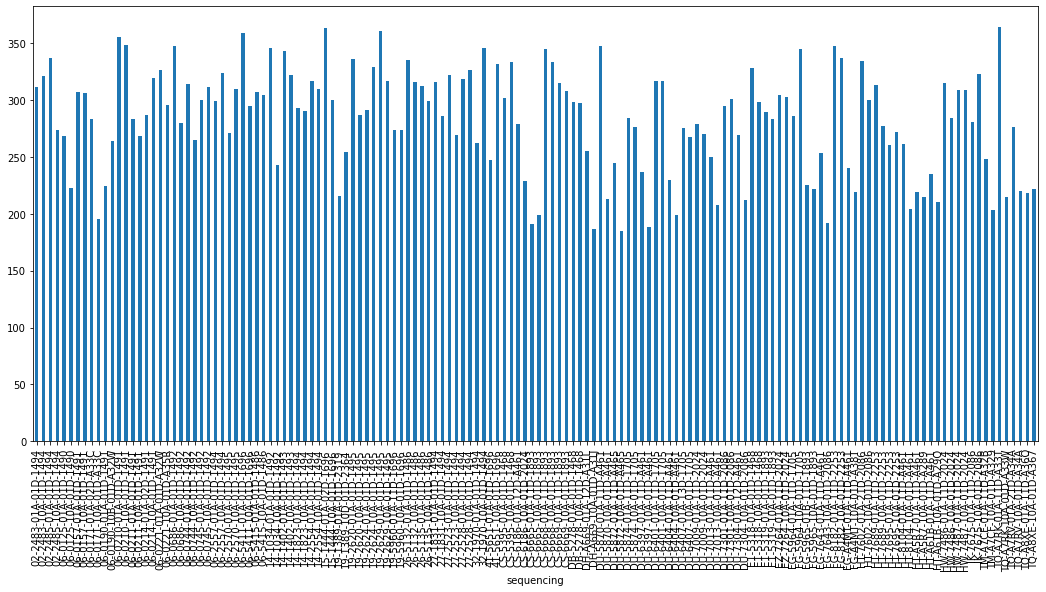

In [82]:
tmp[tmp>=0].plot(kind='bar')
plt.show()

---

# Normalize df

In [83]:
df.reset_index(inplace=True)
df=df.merge(rc,on='sequencing')
df.set_index(['subject','sample','sequencing'],inplace=True)
df=df.droplevel('sequencing',axis='index')
df[df.columns[df.columns.str.contains("^chr")]]=(
    1e9*df[df.columns[df.columns.str.contains("^chr")]].values)/df[['count']].values
df.drop('count',axis='columns',inplace=True)
df

chr1 1102000  chr1 1308000  chr1 1409000  chr1 1410000  \
subject sample                                                                
02-2483 02-2483-01A           0.0           0.0          7.07          1.77   
        02-2483-10A           0.0           0.0          3.45          5.18   
02-2485 02-2485-01A           0.0           0.0          5.22          6.96   
        02-2485-10A           0.0           0.0         16.71          0.00   
06-0125 06-0125-01A           0.0           0.0          8.44          5.63   
...                           ...           ...           ...           ...   
TQ-A7RK TQ-A7RK-10A           0.0           0.0         13.41          0.00   
TQ-A7RV TQ-A7RV-01A           0.0           0.0         11.17          3.19   
        TQ-A7RV-10A           0.0           0.0         11.03          5.52   
TQ-A8XE TQ-A8XE-01A           0.0           0.0          4.14          1.38   
        TQ-A8XE-10A           0.0           0.0          0.00          2.69   

                     chr1 1580000  chr1 1581000  chr1 2211000  chr1 3129000  \
subject sample                                                                
02-2483 02-2483-01A          7.07           0.0           0.0           0.0   
        02-2483-10A          5.18           0.0           0.0           0.0   
02-2485 02-2485-01A          6.96           0.0           0.0           0.0   
        02-2485-10A          0.00           0.0           0.0           0.0   
06-0125 06-0125-01A          8.44           0.0           0.0           0.0   
...                           ...           ...           ...           ...   
TQ-A7RK TQ-A7RK-10A          5.36           0.0           0.0           0.0   
TQ-A7RV TQ-A7RV-01A          6.38           0.0           0.0           0.0   
        TQ-A7RV-10A         11.03           0.0           0.0           0.0   
TQ-A8XE TQ-A8XE-01A          2.76           0.0           0.0           0.0   
        TQ-A8XE-10A         18.85           0.0           0.0           0.0   

                     chr1 3315000  chr1 3321000  ...  chrY 15075000  \
subject sample                                   ...                  
02-2483 02-2483-01A           0.0           0.0  ...            0.0   
        02-2483-10A           0.0           0.0  ...            0.0   
02-2485 02-2485-01A           0.0           0.0  ...            0.0   
        02-2485-10A           0.0           0.0  ...            0.0   
06-0125 06-0125-01A           0.0           0.0  ...            0.0   
...                           ...           ...  ...            ...   
TQ-A7RK TQ-A7RK-10A           0.0           0.0  ...            0.0   
TQ-A7RV TQ-A7RV-01A           0.0           0.0  ...            0.0   
        TQ-A7RV-10A           0.0           0.0  ...            0.0   
TQ-A8XE TQ-A8XE-01A           0.0           0.0  ...            0.0   
        TQ-A8XE-10A           0.0           0.0  ...            0.0   

                     chrY 15774000  chrY 17181000  chrY 19536000  \
subject sample                                                     
02-2483 02-2483-01A           0.00            0.0            0.0   
        02-2483-10A           1.73            0.0            0.0   
02-2485 02-2485-01A           0.00            0.0            0.0   
        02-2485-10A           0.00            0.0            0.0   
06-0125 06-0125-01A           0.00            0.0            0.0   
...                            ...            ...            ...   
TQ-A7RK TQ-A7RK-10A           2.68            0.0            0.0   
TQ-A7RV TQ-A7RV-01A           0.00            0.0            0.0   
        TQ-A7RV-10A           0.00            0.0            0.0   
TQ-A8XE TQ-A8XE-01A           0.00            0.0            0.0   
        TQ-A8XE-10A           0.00            0.0            0.0   

                     chrY 19699000  chrY 19700000  chrY 20553000  \
subject sample                                                     
02-2483 02-2483-01A 

# drop any that are all 0

In [84]:
df.drop(df.columns[df.sum(axis='index')==0],axis='columns',inplace=True)
df

chr1 1409000  chr1 1410000  chr1 1580000  chr1 5573000  \
subject sample                                                                
02-2483 02-2483-01A          7.07          1.77          7.07           0.0   
        02-2483-10A          3.45          5.18          5.18           0.0   
02-2485 02-2485-01A          5.22          6.96          6.96           0.0   
        02-2485-10A         16.71          0.00          0.00           0.0   
06-0125 06-0125-01A          8.44          5.63          8.44           0.0   
...                           ...           ...           ...           ...   
TQ-A7RK TQ-A7RK-10A         13.41          0.00          5.36           0.0   
TQ-A7RV TQ-A7RV-01A         11.17          3.19          6.38           0.0   
        TQ-A7RV-10A         11.03          5.52         11.03           0.0   
TQ-A8XE TQ-A8XE-01A          4.14          1.38          2.76           0.0   
        TQ-A8XE-10A          0.00          2.69         18.85           0.0   

                     chr1 9002000  chr1 10425000  chr1 10427000  \
subject sample                                                    
02-2483 02-2483-01A          0.00           1.77           0.00   
        02-2483-10A          1.73           1.73           0.00   
02-2485 02-2485-01A          0.00           1.74           0.00   
        02-2485-10A          0.00           4.18           2.09   
06-0125 06-0125-01A          0.00           2.81           2.81   
...                           ...            ...            ...   
TQ-A7RK TQ-A7RK-10A          0.00           0.00           5.36   
TQ-A7RV TQ-A7RV-01A          1.60           0.00           1.60   
        TQ-A7RV-10A          0.00           0.00           2.76   
TQ-A8XE TQ-A8XE-01A          0.00           0.00           2.76   
        TQ-A8XE-10A          0.00           0.00           0.00   

                     chr1 11889000  chr1 11891000  chr1 12784000  ...  \
subject sample                                                    ...   
02-2483 02-2483-01A            0.0           1.77            0.0  ...   
        02-2483-10A            0.0           0.00            0.0  ...   
02-2485 02-2485-01A            0.0           0.00            0.0  ...   
        02-2485-10A            0.0           0.00            0.0  ...   
06-0125 06-0125-01A            0.0           0.94            0.0  ...   
...                            ...            ...            ...  ...   
TQ-A7RK TQ-A7RK-10A            0.0           0.00            0.0  ...   
TQ-A7RV TQ-A7RV-01A            0.0           0.00            1.6  ...   
        TQ-A7RV-10A            0.0           0.00            0.0  ...   
TQ-A8XE TQ-A8XE-01A            0.0           2.76            0.0  ...   
        TQ-A8XE-10A            0.0           0.00            0.0  ...   

                     chrY 7180000  chrY 7711000  chrY 12462000  chrY 12463000  \
subject sample                                                                  
02-2483 02-2483-01A          0.00           0.0           1.77           1.77   
        02-2483-10A          3.45           0.0           0.00           3.45   
02-2485 02-2485-01A          0.00           0.0           1.74           0.00   
        02-2485-10A          0.00           0.0           0.00           2.09   
06-0125 06-0125-01A          0.00           0.0           0.00           0.00   
...                           ...           ...            ...            ...   
TQ-A7RK TQ-A7RK-10A          2.68           0.0           0.00           0.00   
TQ-A7RV TQ-A7RV-01A          0.00           0.0           0.00           1.60   
        TQ-A7RV-10A          0.00           0.0           0.00           2.76   
TQ-A8XE TQ-A8XE-01A          0.00           0.0           0.00           0.00   
        TQ-A8XE-10A          0.00           0.0           0.00           0.00   

                     chrY 13103000  chrY 13104000  chrY 15774000  \
subject sample                                   

# Match earlier HERVK113 notebook counts
* CS-5390-10A - 553
* FG-5963-01A - 68
* CS-6186-01A - 1100
* CS-6186-10A - 950
* DU-5872-01A - 1108
* DU-5872-10A - 776
* 02-2483-01A - 568
* 02-2483-10A - 557
* 02-2485-01A - 587
* 02-2485-10A - 498
* 06-0125-01A - 734

## Keep only Broad and drop Harvard Medical School

### Harvard's samples were really low coverage?

## Search for the presence of HKLE insertions with positions unique to tumor or normal

### Copy raw dataframe, remove sample level and clear out the values

compdf2=df.copy()
compdf2.drop(compdf2.loc[compdf2.index.get_level_values('sample').str.contains("-10.$")].index,axis='index',inplace=True)
compdf2=compdf2.droplevel('sample',axis='index')
compdf2.loc[:,:] = 0
compdf2.head(10)

## Ok. This is some dark magic I think. Gotta be a better, cleaner way to do this.

* Loop over the subjects and hkles. (Loops aren't really pythony.)
* Do an "XOR-AND" for the first (tumor 01) and second (normal 10) samples.
* This returns a Boolean mask
* Change it to 0/1
* Subtract the tumor array from the normal array and assign it to the subject/hkle

### This will create a dataframe of positions representing "tumor - normal" so with values of only

* -1 : normal only
*  0 : both or neither
* +1 : tumor only


for subject in df.index.get_level_values('subject').unique():
    for hkle in df.index.get_level_values('hkle').unique():
        tm=(((  df.loc[subject,:,hkle].iloc[0]>0)^(
                df.loc[subject,:,hkle].iloc[1]>0))&(
                df.loc[subject,:,hkle].iloc[0]>0))
        tm.replace([False,True],[0,1],inplace=True)
        nm=(((  df.loc[subject,:,hkle].iloc[0]>0)^(
                df.loc[subject,:,hkle].iloc[1]>0))&(
                df.loc[subject,:,hkle].iloc[1]>0))
        nm.replace([False,True],[0,1],inplace=True)
        compdf2.loc[subject,hkle]=tm.values-nm.values

compdf.equals(compdf2)

# New technique. Separate the tumor and normal counts.
### Remove the sample column
### DO NOT RESHAPE

In [85]:
n=df.copy()    # NORMAL
t=df.copy()    # TUMOR

In [86]:
n.drop(n.loc[n.index.get_level_values('sample').str.contains("-01.$")].index,axis='index',inplace=True)
t.drop(t.loc[t.index.get_level_values('sample').str.contains("-10.$")].index,axis='index',inplace=True)

In [87]:
n=n.droplevel('sample',axis='index')
t=t.droplevel('sample',axis='index')

In [88]:
n.head()

chr1 1409000  chr1 1410000  chr1 1580000  chr1 5573000  chr1 9002000  \
subject                                                                         
02-2483          3.45          5.18          5.18           0.0          1.73   
02-2485         16.71          0.00          0.00           0.0          0.00   
06-0125          4.31          1.44          7.19           0.0          1.44   
06-0157          1.78          0.00          7.12           0.0          0.00   
06-0171          6.93          2.77          0.00           0.0          0.00   

         chr1 10425000  chr1 10427000  chr1 11889000  chr1 11891000  \
subject                                                               
02-2483           1.73           0.00            0.0            0.0   
02-2485           4.18           2.09            0.0            0.0   
06-0125           2.88           4.31            0.0            0.0   
06-0157           0.00           0.00            0.0            0.0   
06-0171           1.39           0.00            0.0            0.0   

         chr1 12784000  ...  chrY 7180000  chrY 7711000  chrY 12462000  \
subject                 ...                                              
02-2483            0.0  ...          3.45           0.0           0.00   
02-2485            0.0  ...          0.00           0.0           0.00   
06-0125            0.0  ...          0.00           0.0           0.00   
06-0157            0.0  ...          0.00           0.0           0.00   
06-0171            0.0  ...          0.00           0.0           1.39   

         chrY 12463000  chrY 13103000  chrY 13104000  chrY 15774000  \
subject                                                               
02-2483           3.45           0.00           0.00           1.73   
02-2485           2.09           2.09          10.44           0.00   
06-0125           0.00           0.00           0.00           0.00   
06-0157           0.00           0.00           0.00           0.00   
06-0171           4.16           1.39           0.00           0.00   

         chrY 19699000  chrY 19700000  chrY 20976000  
subject                                               
02-2483           1.73           1.73            0.0  
02-2485           2.09           0.00            0.0  
06-0125           0.00           0.00            0.0  
06-0157           0.00           0.00            0.0  
06-0171           0.00           4.16            0.0  

[5 rows x 1571 columns]

In [89]:
t.head()

chr1 1409000  chr1 1410000  chr1 1580000  chr1 5573000  chr1 9002000  \
subject                                                                         
02-2483          7.07          1.77          7.07          0.00          0.00   
02-2485          5.22          6.96          6.96          0.00          0.00   
06-0125          8.44          5.63          8.44          0.00          0.00   
06-0157          1.81          1.81          1.81          1.81          3.63   
06-0171          2.56          1.71          3.42          0.00          0.85   

         chr1 10425000  chr1 10427000  chr1 11889000  chr1 11891000  \
subject                                                               
02-2483           1.77           0.00           0.00           1.77   
02-2485           1.74           0.00           0.00           0.00   
06-0125           2.81           2.81           0.00           0.94   
06-0157           3.63           1.81           0.00           1.81   
06-0171           1.71           0.85           0.85           0.00   

         chr1 12784000  ...  chrY 7180000  chrY 7711000  chrY 12462000  \
subject                 ...                                              
02-2483            0.0  ...           0.0           0.0           1.77   
02-2485            0.0  ...           0.0           0.0           1.74   
06-0125            0.0  ...           0.0           0.0           0.00   
06-0157            0.0  ...           0.0           0.0           0.00   
06-0171            0.0  ...           0.0           0.0           0.00   

         chrY 12463000  chrY 13103000  chrY 13104000  chrY 15774000  \
subject                                                               
02-2483           1.77           0.00           0.00            0.0   
02-2485           0.00           0.00           1.74            0.0   
06-0125           0.00           0.00           0.00            0.0   
06-0157           0.00           0.00           0.00            0.0   
06-0171           0.85           1.71           3.42            0.0   

         chrY 19699000  chrY 19700000  chrY 20976000  
subject                                               
02-2483           3.53           0.00           0.00  
02-2485           0.00           1.74           1.74  
06-0125           0.00           0.00           0.00  
06-0157           0.00           0.00           0.00  
06-0171           0.85           0.00           0.85  

[5 rows x 1571 columns]

In [90]:
n_index=n.index
t_index=t.index

### Compare the indexes. An empty array shows that the indexes are the same. Yay.

In [91]:
n_index[n_index != t_index]

Index([], dtype='object', name='subject')

In [92]:
compdf=(
    ((n>threshold)^(t>threshold))&(t>threshold)).replace([False,True],[0,1]) - (
    ((n>threshold)^(t>threshold))&(n>threshold)).replace([False,True],[0,1])

In [93]:
compdf

chr1 1409000  chr1 1410000  chr1 1580000  chr1 5573000  chr1 9002000  \
subject                                                                         
02-2483             0            -1             0             0             0   
02-2485             0             1             1             0             0   
06-0125             0             1             0             0             0   
06-0157             0             0            -1             0             1   
06-0171            -1             0             1             0             0   
...               ...           ...           ...           ...           ...   
IK-7675            -1             0             0             0             0   
TM-A7CF             0             1            -1             0             0   
TQ-A7RK             0             1             0             0             0   
TQ-A7RV             0             0             0             0             0   
TQ-A8XE             1             0            -1             0             0   

         chr1 10425000  chr1 10427000  chr1 11889000  chr1 11891000  \
subject                                                               
02-2483              0              0              0              0   
02-2485             -1              0              0              0   
06-0125              0             -1              0              0   
06-0157              1              0              0              0   
06-0171              0              0              0              0   
...                ...            ...            ...            ...   
IK-7675              0              0              0              0   
TM-A7CF              0              0              0              0   
TQ-A7RK              1             -1              0              0   
TQ-A7RV              0              0              0              0   
TQ-A8XE              0              0              0              0   

         chr1 12784000  ...  chrY 7180000  chrY 7711000  chrY 12462000  \
subject                 ...                                              
02-2483              0  ...            -1             0              0   
02-2485              0  ...             0             0              0   
06-0125              0  ...             0             0              0   
06-0157              0  ...             0             0              0   
06-0171              0  ...             0             0              0   
...                ...  ...           ...           ...            ...   
IK-7675              0  ...             0             0              0   
TM-A7CF              0  ...             0             0              0   
TQ-A7RK              0  ...             0             0              0   
TQ-A7RV              0  ...             0             0              0   
TQ-A8XE              0  ...             0             0              0   

         chrY 12463000  chrY 13103000  chrY 13104000  chrY 15774000  \
subject                                                               
02-2483             -1              0              0              0   
02-2485              0              0             -1              0   
06-0125              0              0              0              0   
06-0157              0              0              0              0   
06-0171             -1              0              1              0   
...                ...            ...            ...            ...   
IK-7675              0              0              1              0   
TM-A7CF              0              0              0              0   
TQ-A7RK              0              0              0              0   
TQ-A7RV              0              0              0              0   
TQ-A8XE              0              0              0              0   

         chrY 19699000  chrY 19700000  chrY 20976000  
subject                                               
02-2483              1            

### This is cleaner, faster and more pythonic than what follows for compdf.


In [94]:
compdf.head()

chr1 1409000  chr1 1410000  chr1 1580000  chr1 5573000  chr1 9002000  \
subject                                                                         
02-2483             0            -1             0             0             0   
02-2485             0             1             1             0             0   
06-0125             0             1             0             0             0   
06-0157             0             0            -1             0             1   
06-0171            -1             0             1             0             0   

         chr1 10425000  chr1 10427000  chr1 11889000  chr1 11891000  \
subject                                                               
02-2483              0              0              0              0   
02-2485             -1              0              0              0   
06-0125              0             -1              0              0   
06-0157              1              0              0              0   
06-0171              0              0              0              0   

         chr1 12784000  ...  chrY 7180000  chrY 7711000  chrY 12462000  \
subject                 ...                                              
02-2483              0  ...            -1             0              0   
02-2485              0  ...             0             0              0   
06-0125              0  ...             0             0              0   
06-0157              0  ...             0             0              0   
06-0171              0  ...             0             0              0   

         chrY 12463000  chrY 13103000  chrY 13104000  chrY 15774000  \
subject                                                               
02-2483             -1              0              0              0   
02-2485              0              0             -1              0   
06-0125              0              0              0              0   
06-0157              0              0              0              0   
06-0171             -1              0              1              0   

         chrY 19699000  chrY 19700000  chrY 20976000  
subject                                               
02-2483              1              0              0  
02-2485              0              0              0  
06-0125              0              0              0  
06-0157              0              0              0  
06-0171              0             -1              0  

[5 rows x 1571 columns]

In [95]:
compdf.shape

(73, 1571)

### Keep only positions with any sample with something other than 0

### We lose over 3000 positions

In [96]:
compdf=compdf.loc[:, (compdf != 0).any(axis=0)]

In [97]:
compdf.shape

(73, 933)

In [98]:
compdf

chr1 1409000  chr1 1410000  chr1 1580000  chr1 9002000  \
subject                                                           
02-2483             0            -1             0             0   
02-2485             0             1             1             0   
06-0125             0             1             0             0   
06-0157             0             0            -1             1   
06-0171            -1             0             1             0   
...               ...           ...           ...           ...   
IK-7675            -1             0             0             0   
TM-A7CF             0             1            -1             0   
TQ-A7RK             0             1             0             0   
TQ-A7RV             0             0             0             0   
TQ-A8XE             1             0            -1             0   

         chr1 10425000  chr1 10427000  chr1 11891000  chr1 12784000  \
subject                                                               
02-2483              0              0              0              0   
02-2485             -1              0              0              0   
06-0125              0             -1              0              0   
06-0157              1              0              0              0   
06-0171              0              0              0              0   
...                ...            ...            ...            ...   
IK-7675              0              0              0              0   
TM-A7CF              0              0              0              0   
TQ-A7RK              1             -1              0              0   
TQ-A7RV              0              0              0              0   
TQ-A8XE              0              0              0              0   

         chr1 13353000  chr1 15135000  ...  chrY 7179000  chrY 7180000  \
subject                                ...                               
02-2483              0              0  ...             0            -1   
02-2485              0              0  ...             0             0   
06-0125              0              0  ...             0             0   
06-0157              0              0  ...             0             0   
06-0171              0              0  ...             0             0   
...                ...            ...  ...           ...           ...   
IK-7675              0              0  ...            -1             0   
TM-A7CF              0              0  ...             0             0   
TQ-A7RK              0              0  ...             0             0   
TQ-A7RV              0              0  ...             0             0   
TQ-A8XE              0              0  ...             0             0   

         chrY 12462000  chrY 12463000  chrY 13103000  chrY 13104000  \
subject                                                               
02-2483              0             -1              0              0   
02-2485              0              0              0             -1   
06-0125              0              0              0              0   
06-0157              0              0              0              0   
06-0171              0             -1              0              1   
...                ...            ...            ...            ...   
IK-7675              0              0              0              1   
TM-A7CF              0              0              0              0   
TQ-A7RK              0              0              0              0   
TQ-A7RV              0              0              0              0   
TQ-A8XE              0              0              0              0   

         chrY 15774000  chrY 19699000  chrY 19700000  chrY 20976000  
subject                                                              
02-2483              0              1              0              0  
02-2485              0              0              0              0  
06-0125              0              0         

### Get the chromosome columns for analysis after merging with the metadata

In [99]:
#chromosome_columns=compdf.columns[compdf.columns.get_level_values('chromosome').str.contains("^chr")]
chromosome_columns=compdf.columns[compdf.columns.str.contains("^chr")]
chromosome_columns

Index(['chr1 1409000', 'chr1 1410000', 'chr1 1580000', 'chr1 9002000',
       'chr1 10425000', 'chr1 10427000', 'chr1 11891000', 'chr1 12784000',
       'chr1 13353000', 'chr1 15135000',
       ...
       'chrY 7179000', 'chrY 7180000', 'chrY 12462000', 'chrY 12463000',
       'chrY 13103000', 'chrY 13104000', 'chrY 15774000', 'chrY 19699000',
       'chrY 19700000', 'chrY 20976000'],
      dtype='object', length=933)

### Merge with the metadata for later grouping

In [100]:
compdf.reset_index(inplace=True)
compdf=pd.merge(compdf,meta,on='subject',how='left')
#compdf=compdf.merge(meta,on='subject',how='inner')
#compdf=compdf.merge(meta,on='subject')
#compdf.set_index(['subject','hkle'],inplace=True)
compdf.set_index(['subject'],inplace=True)
compdf.head()

chr1 1409000  chr1 1410000  chr1 1580000  chr1 9002000  \
subject                                                           
02-2483             0            -1             0             0   
02-2485             0             1             1             0   
06-0125             0             1             0             0   
06-0157             0             0            -1             1   
06-0171            -1             0             1             0   

         chr1 10425000  chr1 10427000  chr1 11891000  chr1 12784000  \
subject                                                               
02-2483              0              0              0              0   
02-2485             -1              0              0              0   
06-0125              0             -1              0              0   
06-0157              1              0              0              0   
06-0171              0              0              0              0   

         chr1 13353000  chr1 15135000  ...     Tissue_sample_location  \
subject                                ...                              
02-2483              0              0  ...  MD Anderson Cancer Center   
02-2485              0              0  ...  MD Anderson Cancer Center   
06-0125              0              0  ...        Henry Ford Hospital   
06-0157              0              0  ...        Henry Ford Hospital   
06-0171              0              0  ...        Henry Ford Hospital   

                 MGMT   Age  Survival_months  Vital_status  days_to_death  \
subject                                                                     
02-2483    Methylated  43.0            15.31           0.0            NaN   
02-2485  Unmethylated  53.0            15.44           0.0            NaN   
06-0125    Methylated  63.0            47.57           1.0         1448.0   
06-0157           NaN  63.0             3.19           1.0           97.0   
06-0171           NaN  65.0            13.11           1.0          399.0   

         gender1             disease_type                         center_name  \
subject                                                                         
02-2483     male  Glioblastoma Multiforme  Broad Institute of MIT and Harvard   
02-2485     male  Glioblastoma Multiforme  Broad Institute of MIT and Harvard   
06-0125   female  Glioblastoma Multiforme  Broad Institute of MIT and Harvard   
06-0157   female  Glioblastoma Multiforme  Broad Institute of MIT and Harvard   
06-0171     male  Glioblastoma Multiforme  Broad Institute of MIT and Harvard   

         unknown  
subject           
02-2483   9440/3  
02-2485   9440/3  
06-0125   9440/3  
06-0157   9440/3  
06-0171   9440/3  

[5 rows x 955 columns]

### More dark magic here. 

* Select all subjects and HERVK113 on the y-axis and all the chromosome columns on the x-axis.
* We will count all the incidence of each of the previously computed "tumor-normal" values
* Then we will transpose and sort descending by "-1". This will put the highest occurence of normal at the top.


In [101]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

'20210621 12:42:04'

In [102]:
compdf.shape

(73, 955)

In [103]:
#compdf.loc[pd.IndexSlice[:,hkle],chromosome_columns].apply(
compdf[chromosome_columns].apply(
    pd.Series.value_counts, axis=0).T.sort_values(by=[-1],ascending=False).head(10)


-1     0     1
chr1 73130000   25.0  30.0  18.0
chr10 97418000  25.0  32.0  16.0
chr16 75816000  24.0  32.0  17.0
chr4 179554000  23.0  35.0  15.0
chr8 90684000   23.0  31.0  19.0
chr19 56687000  23.0  30.0  20.0
chr10 68526000  23.0  36.0  14.0
chr3 196944000  22.0  34.0  17.0
chr22 11550000  22.0  34.0  17.0
chr9 113033000  22.0  29.0  22.0

In [104]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

'20210621 12:42:05'

### We see that the unique normal positions aren't really that unique.

### If we do the same, but sort by tumor ...

In [105]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

'20210621 12:42:05'

In [106]:
#compdf.loc[pd.IndexSlice[:,hkle],chromosome_columns].apply(
#compdf.loc[pd.IndexSlice[:,],chromosome_columns].apply(
compdf[chromosome_columns].apply(
    pd.Series.value_counts, axis=0).T.sort_values(by=[1],ascending=False).head(10)


-1     0     1
chr7 101150000   4.0  39.0  30.0
chr8 143850000  17.0  27.0  29.0
chr3 134516000  10.0  34.0  29.0
chr7 126168000  12.0  34.0  27.0
chr15 65227000   9.0  37.0  27.0
chr1 161017000  10.0  36.0  27.0
chr19 21567000   8.0  38.0  27.0
chr7 126169000  15.0  32.0  26.0
chr3 5082000    13.0  34.0  26.0
chr8 47176000    6.0  41.0  26.0

In [107]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

'20210621 12:42:06'

In [108]:
def ttests_boxplots_and_heatmaps(localdf,columns,group_column,box_p=0.05,heat_p=0.15):
    select_p_values=[]
    groups=localdf[group_column].unique().tolist()
    print("T-Testing")
    for col in columns:
        if ( col not in localdf.columns ):
            continue
        for group in groups:
            others = groups.copy()
            others.remove(group)
            for other in others:
                #t,p = stats.ttest_rel(
                t,p = stats.ttest_ind(
                    localdf[localdf[group_column]==group][col],
                    localdf[localdf[group_column]==other][col])
                #if(p<0.1):
                #    print(col,group,other,t,p)
                if(( p > 0 ) and ( p < heat_p )):
                    select_p_values.append([abs(t),p,col])

    pdf = pd.DataFrame(select_p_values, columns=['t','p','col'])                        
    pdf=pdf.drop_duplicates().sort_values('p')
    print("Boxplotting")
    for index, row in pdf.iterrows():
        if(( row['p'] > 0 ) and ( row['p'] < box_p )):
            print(" p : "+str(row['p'])+"  ( t : "+str(row['t'])+" ) :  "+str(row['col']))
            
            localdf.boxplot(column=row['col'],by=[group_column])
            plt.title(str(row['col']))
            plt.xticks(rotation=75,ha='right')
            plt.show()                            

    print("Clustermapping")

    selected=['subject',group_column]
    selected=np.append(selected,pdf['col'])
    selected=np.unique(selected)
    print(selected)
    
    #['Lab kit' 'NR_029609.1' 'trimmer' 'diag' 'idh' 'sample' 'subject']
    #['IDH_1p19q_status' 'chrY 7711000' 'subject']
    if len(selected) > 3: #7:
        tmp=localdf[selected].copy()
        tmp.set_index(['subject',group_column],inplace=True)

        #tmp-=tmp.min() # This may almost always be 0 now.
#        tmp/=tmp.max() # given that there should be no NAs now, coule let clustermap do this
        # ...
        #standard_scale int or None, optional
        #Either 0 (rows) or 1 (columns).
        #Whether or not to standardize that dimension, meaning for each row or column,
        #subtract the minimum and divide each by its maximum.
        # how would that deal with 0s or empty cells

        tmp=tmp.fillna(0) # Somehow, some scaled values become NaN so keep this

        tmp.reset_index(inplace=True)

        tmp=tmp.sort_values([group_column])
        tmp.set_index(['subject'],inplace=True)

        diagnoses=tmp.pop(group_column)
        tmp=tmp.T

        network_pal = sns.cubehelix_palette(len(diagnoses.unique()),
                            light=.9, dark=.1, reverse=True,
                            start=1, rot=-2)
        #print(network_pal)
        network_pal
        #print('lut')
        network_lut = dict(zip(diagnoses.unique(), network_pal))
        #print(network_lut)
        #print('labels')
        # Convert the palette to vectors that will be drawn on the side of the matrix
        network_labels = diagnoses
        #print(network_labels)
        network_colors = pd.Series(network_labels, index=tmp.columns).map(network_lut)                
        #print('colors')
        #print(network_colors)

#        print(tmp)

        g=sns.clustermap(tmp,col_cluster=False,figsize=(15,20),cmap="Spectral",
                         col_colors=network_colors,xticklabels=True)
        g.fig.suptitle("Clustermap 1 : " + group_column)
        plt.setp(g.ax_heatmap.get_xticklabels(), rotation=75, horizontalalignment='right')

        # Draw the legend bar for the classes                 
        for label in network_labels.unique():
            g.ax_col_dendrogram.bar(0, 0, color=network_lut[label],
                                    label=label, linewidth=0)
        g.ax_col_dendrogram.legend(loc="center", ncol=4)

        # Adjust the postion of the main colorbar for the heatmap
        #g.cax.set_position([.97, .2, .03, .45])
        g.cax.set_position([0, .15, .005, .6])
        plt.show()

        g=sns.clustermap(tmp,figsize=(15,20),cmap="Spectral",
                         col_colors=network_colors,xticklabels=True)
        g.fig.suptitle("Clustermap 2 : " + group_column)
        plt.setp(g.ax_heatmap.get_xticklabels(), rotation=75, horizontalalignment='right')

        # Draw the legend bar for the classes                 
        for label in network_labels.unique():
            g.ax_col_dendrogram.bar(0, 0, color=network_lut[label],
                                    label=label, linewidth=0)
        g.ax_col_dendrogram.legend(loc="center", ncol=4)

        # Adjust the postion of the main colorbar for the heatmap
        # [dist from left,dist from bottom?,width?,height?]
        g.cax.set_position([0, .15, .005, .6])
        plt.show()  
        


        pcadf=localdf[selected].copy()

        #pcadf=tmp[(tmp["Lab kit"]==labkit) & (tmp["trimmer"]==trimmer) & tmp['diag'].isin(diags)].copy()
        #pcadf=pcadf.drop('trimmer',axis='columns')
        #pcadf=pcadf.drop('Lab kit',axis='columns')
        pcadf.set_index(['subject',group_column],inplace=True)
        elements=pcadf.columns
        pcadf.reset_index(inplace=True)
        scaler = StandardScaler()
        scaler.fit(pcadf[elements])
        scaled_data = scaler.transform(pcadf[elements])
        #scaled_data[0]
        
        #ValueError: n_components=8 must be between 0 and min(n_samples, n_features)=2 with svd_solver='full'
        n=min([len(pcadf),len(pcadf.columns)-2,8])
        pca = PCA(n_components=n)
        
        pca.fit(scaled_data)
        x_pca = pca.transform(scaled_data)
        
        # for color
        groups=pcadf[group_column].unique().tolist()
        pcadf['group_index']=pcadf[group_column].apply(lambda x: groups.index(x))
        
        fig = plt.figure(figsize = (18,8))
        ax = fig.add_subplot(1,1,1) 
        ax.set_xlabel('Principal Component 1', fontsize = 15)
        ax.set_ylabel('Principal Component 2', fontsize = 15)
        ax.set_title(''+str(n)+' component PCA '+group_column, fontsize = 20)

        colors = ['r','g','b','c','m','y','k']
        for target, color in zip(groups,colors):
            indicesToKeep = pcadf[group_column] == target
            ax.scatter(x_pca[indicesToKeep, 0], x_pca[indicesToKeep, 1], c = color, s = 50)
        ax.legend(groups)
        ax.grid()
        #plt.title(group_column)
        plt.show()

    else:
        print("Not enough data to produce cluster maps")
        

In [109]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

'20210621 12:42:06'

In [110]:
compdf.reset_index(inplace=True)
compdf.head()

subject  chr1 1409000  chr1 1410000  chr1 1580000  chr1 9002000  \
0  02-2483             0            -1             0             0   
1  02-2485             0             1             1             0   
2  06-0125             0             1             0             0   
3  06-0157             0             0            -1             1   
4  06-0171            -1             0             1             0   

   chr1 10425000  chr1 10427000  chr1 11891000  chr1 12784000  chr1 13353000  \
0              0              0              0              0              0   
1             -1              0              0              0              0   
2              0             -1              0              0              0   
3              1              0              0              0              0   
4              0              0              0              0              0   

   ...     Tissue_sample_location          MGMT   Age  Survival_months  \
0  ...  MD Anderson Cancer Center    Methylated  43.0            15.31   
1  ...  MD Anderson Cancer Center  Unmethylated  53.0            15.44   
2  ...        Henry Ford Hospital    Methylated  63.0            47.57   
3  ...        Henry Ford Hospital           NaN  63.0             3.19   
4  ...        Henry Ford Hospital           NaN  65.0            13.11   

   Vital_status  days_to_death  gender1             disease_type  \
0           0.0            NaN     male  Glioblastoma Multiforme   
1           0.0            NaN     male  Glioblastoma Multiforme   
2           1.0         1448.0   female  Glioblastoma Multiforme   
3           1.0           97.0   female  Glioblastoma Multiforme   
4           1.0          399.0     male  Glioblastoma Multiforme   

                          center_name  unknown  
0  Broad Institute of MIT and Harvard   9440/3  
1  Broad Institute of MIT and Harvard   9440/3  
2  Broad Institute of MIT and Harvard   9440/3  
3  Broad Institute of MIT and Harvard   9440/3  
4  Broad Institute of MIT and Harvard   9440/3  

[5 rows x 956 columns]

primary_diagnosis
T-Testing
Boxplotting
 p : 4.4800980612265565e-07  ( t : 6.940788532619723 ) :  chr3 50519000


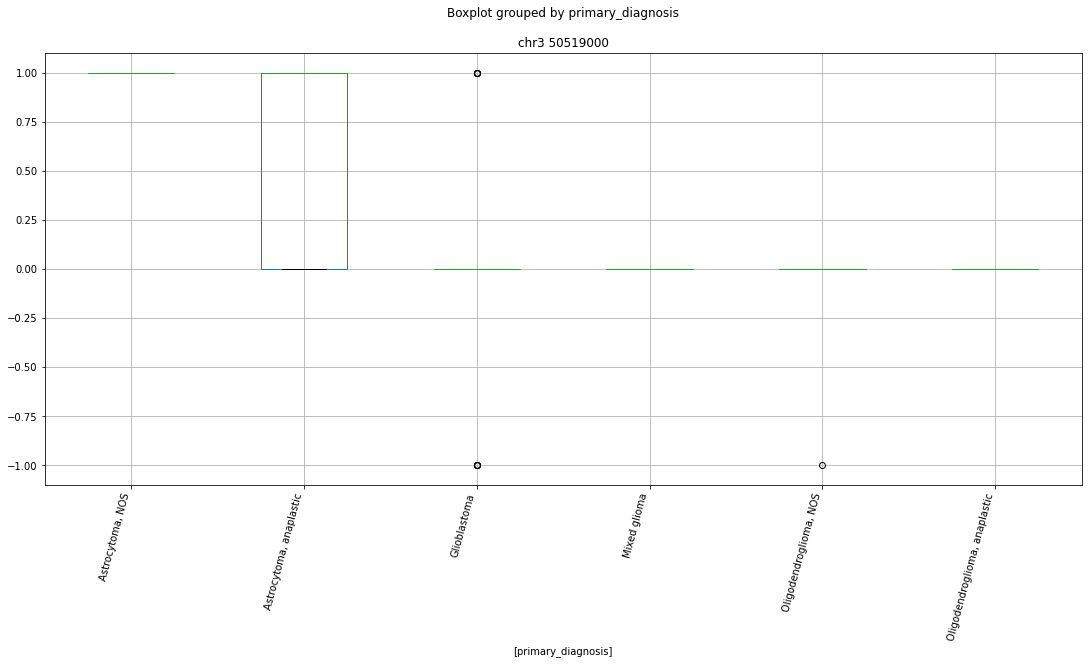

 p : 9.711338292628827e-07  ( t : 6.516251872168421 ) :  chr10 99256000


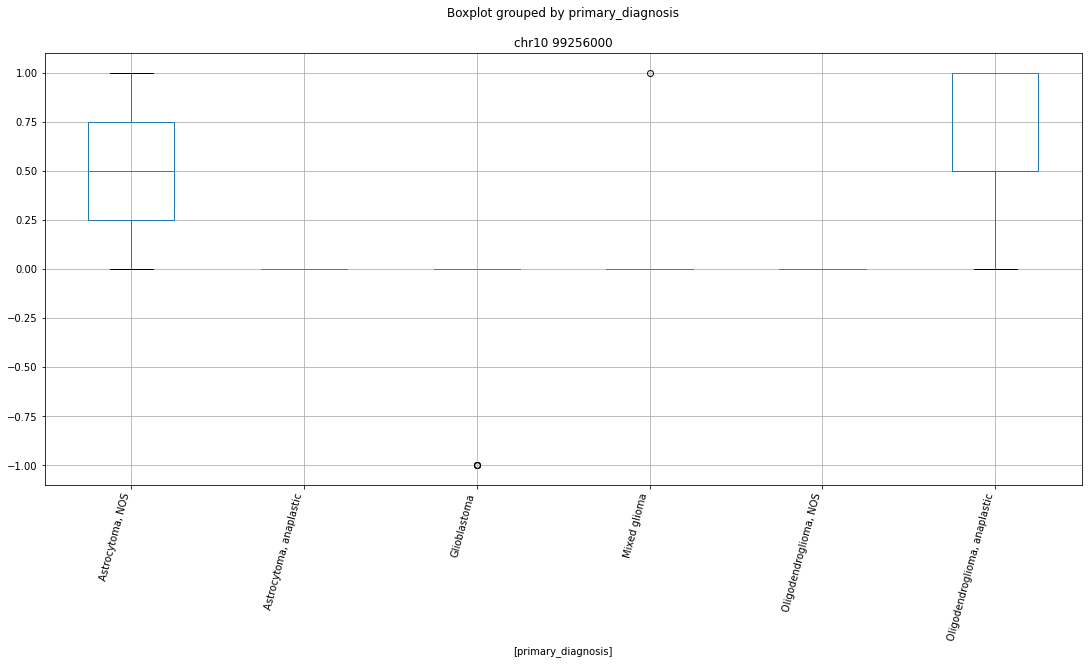

 p : 1.714740087022125e-06  ( t : 6.362389488234746 ) :  chr17 43354000


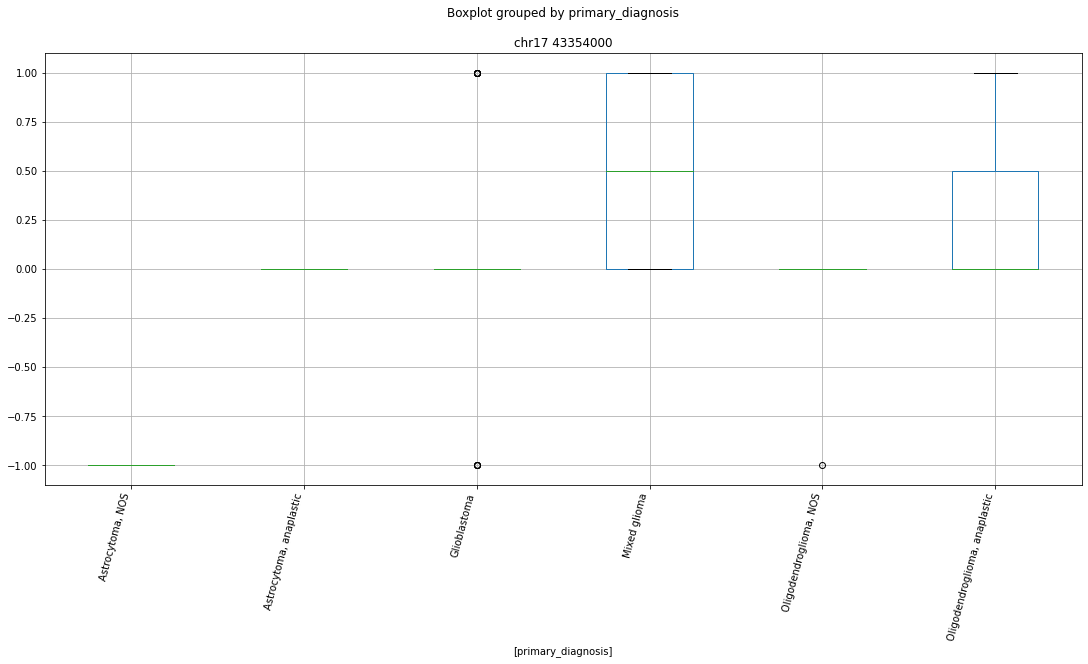

 p : 2.3350854158890195e-06  ( t : 5.666666666666667 ) :  chr12 34180000


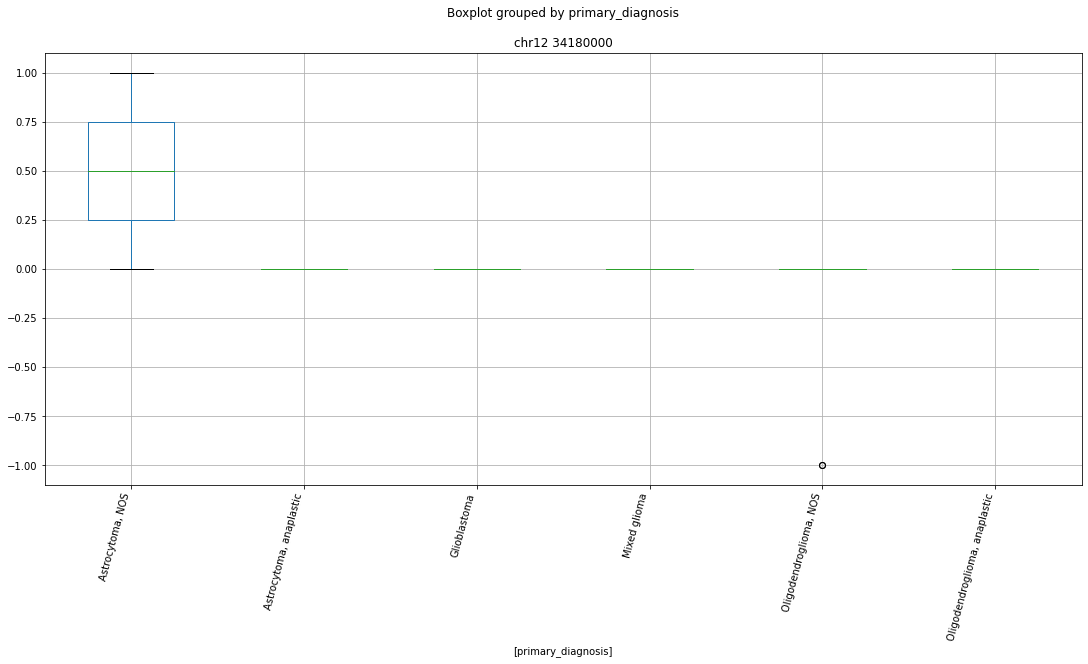

 p : 2.3350854158890195e-06  ( t : 5.666666666666667 ) :  chr20 25550000


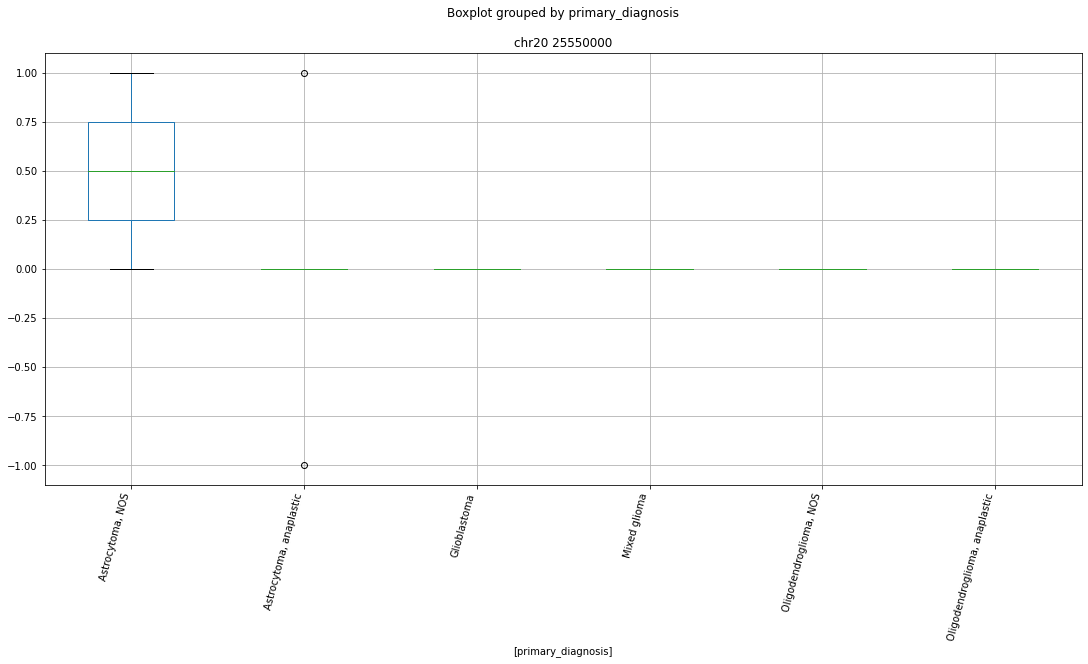

 p : 2.3350854158890195e-06  ( t : 5.666666666666667 ) :  chr22 39011000


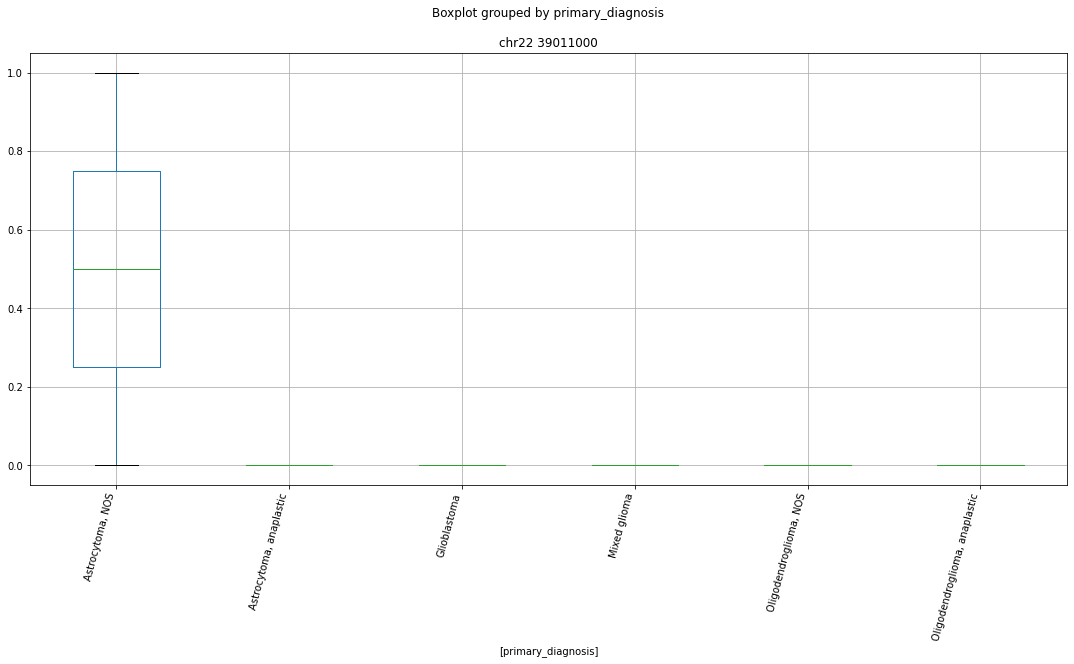

 p : 2.3350854158890195e-06  ( t : 5.666666666666667 ) :  chr20 3023000


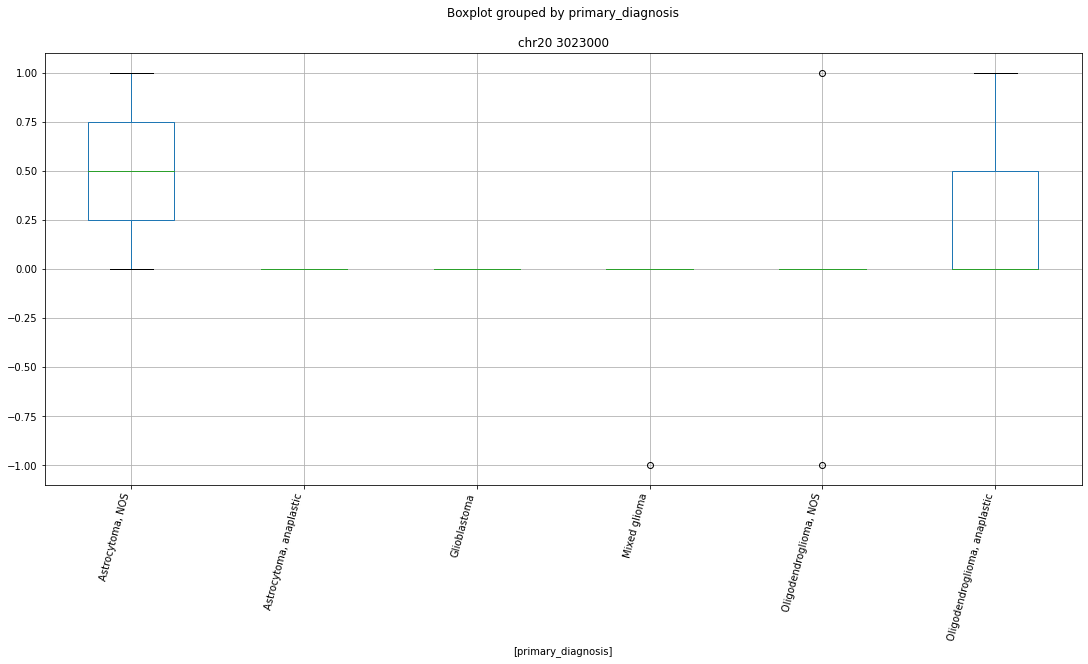

 p : 2.3350854158890195e-06  ( t : 5.666666666666667 ) :  chr19 52873000


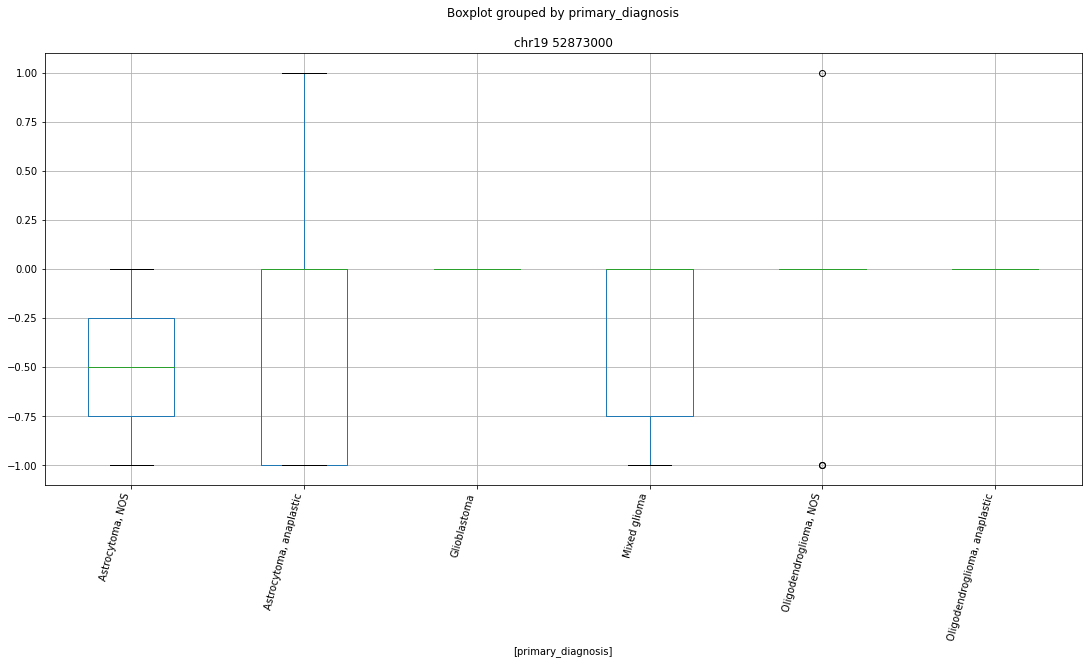

 p : 2.3350854158890195e-06  ( t : 5.666666666666667 ) :  chr16 35629000


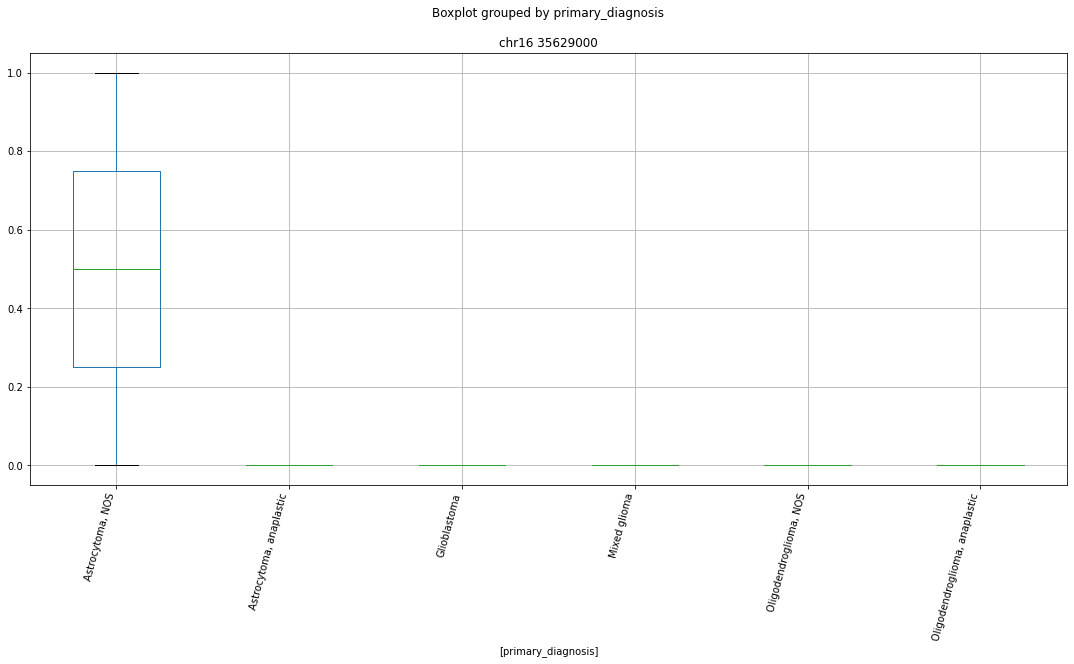

 p : 2.3350854158890195e-06  ( t : 5.666666666666667 ) :  chr6 120931000


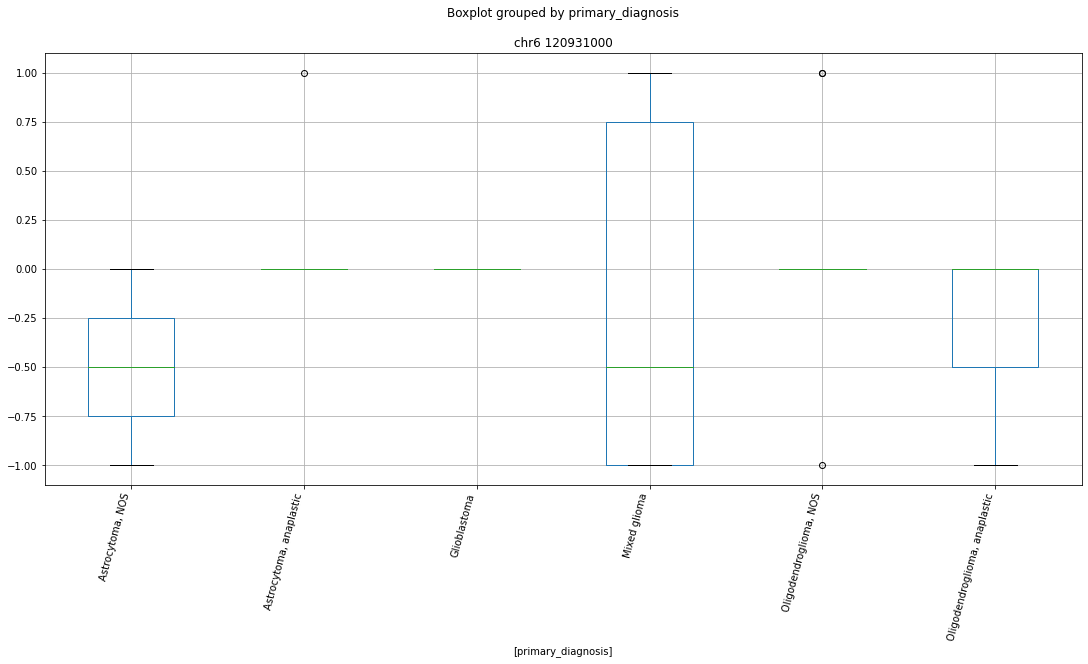

 p : 2.3350854158890195e-06  ( t : 5.666666666666667 ) :  chr3 99420000


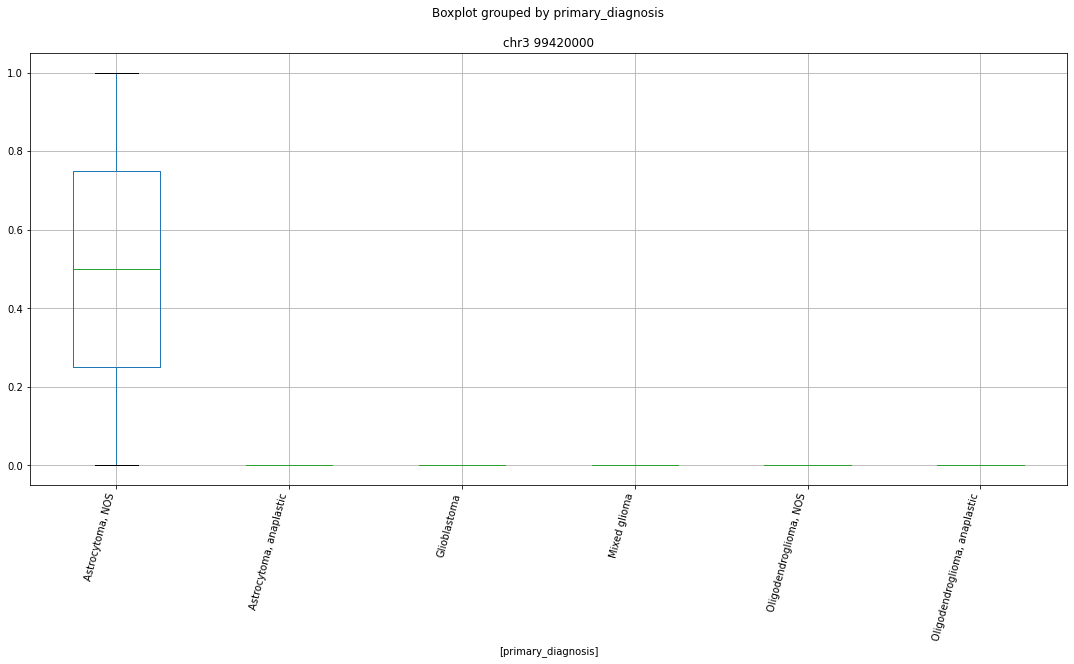

 p : 2.3350854158890195e-06  ( t : 5.666666666666667 ) :  chrX 149627000


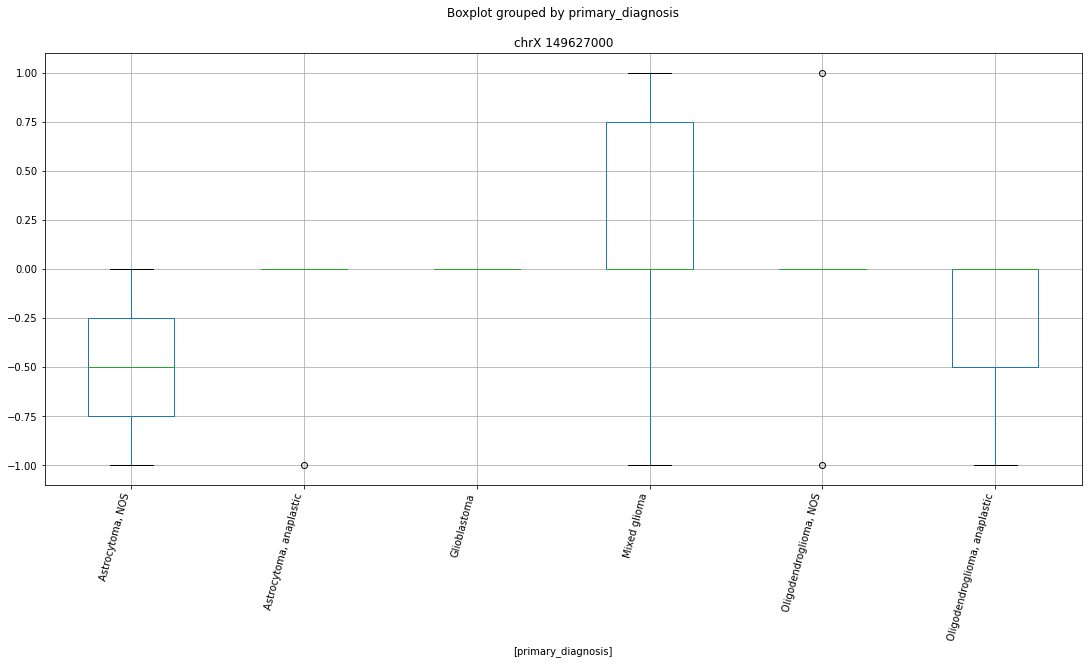

Clustermapping
['chr1 104135000' 'chr1 105473000' 'chr1 111259000' 'chr1 111800000'
 'chr1 145415000' 'chr1 147240000' 'chr1 147734000' 'chr1 152455000'
 'chr1 15379000' 'chr1 155626000' 'chr1 156181000' 'chr1 160690000'
 'chr1 161315000' 'chr1 165092000' 'chr1 165093000' 'chr1 166605000'
 'chr1 209141000' 'chr1 213150000' 'chr1 224340000' 'chr1 39234000'
 'chr1 40572000' 'chr1 45529000' 'chr1 46320000' 'chr1 65139000'
 'chr1 66424000' 'chr1 93276000' 'chr10 102455000' 'chr10 26894000'
 'chr10 37493000' 'chr10 37494000' 'chr10 41714000' 'chr10 6165000'
 'chr10 65409000' 'chr10 65410000' 'chr10 6833000' 'chr10 68525000'
 'chr10 68526000' 'chr10 80806000' 'chr10 90302000' 'chr10 97418000'
 'chr10 99256000' 'chr11 118721000' 'chr11 118730000' 'chr11 44664000'
 'chr11 59137000' 'chr11 61655000' 'chr11 62194000' 'chr11 62195000'
 'chr11 63531000' 'chr11 67603000' 'chr11 72164000' 'chr11 96586000'
 'chr12 105478000' 'chr12 105479000' 'chr12 107827000' 'chr12 110570000'
 'chr12 114484000' 'ch

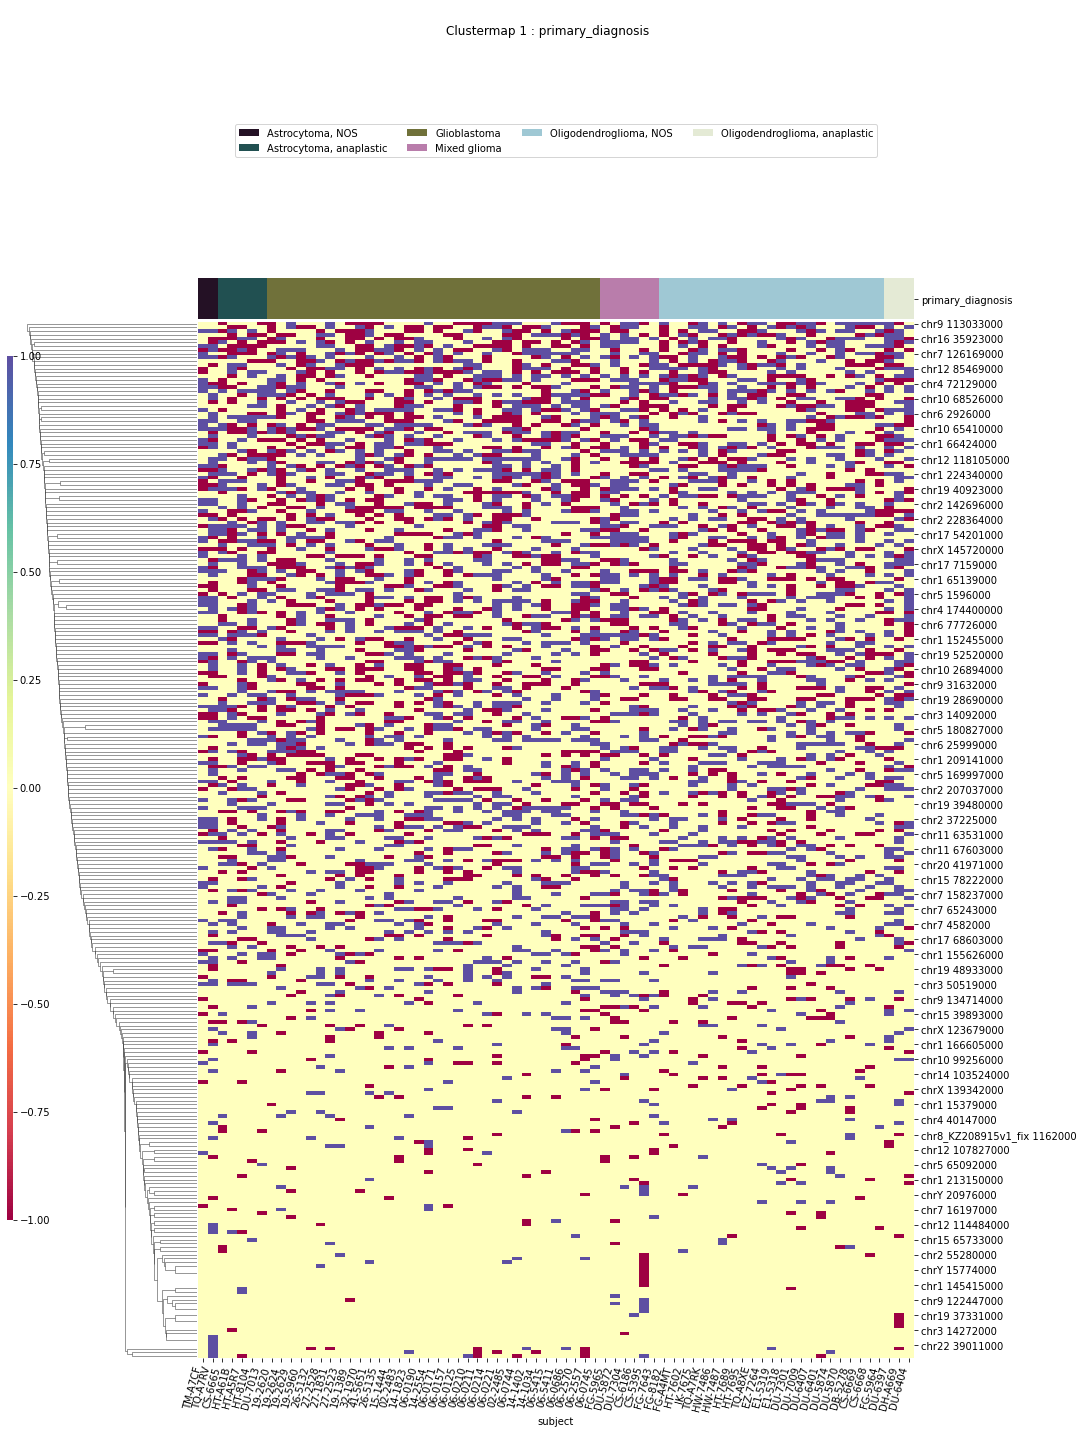

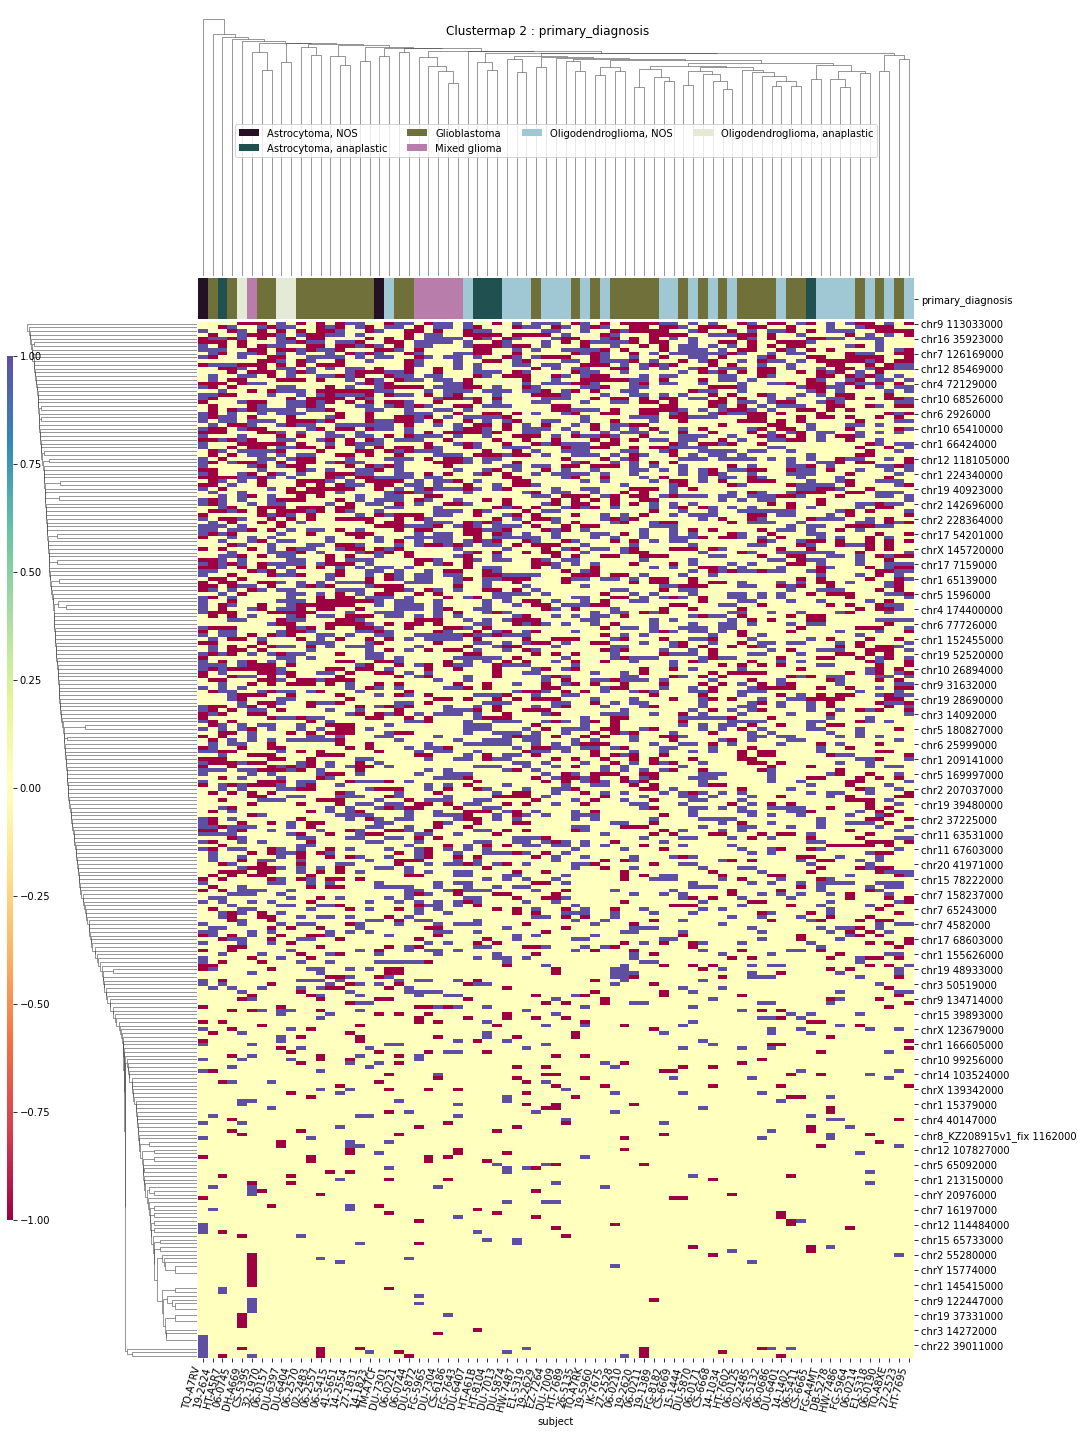

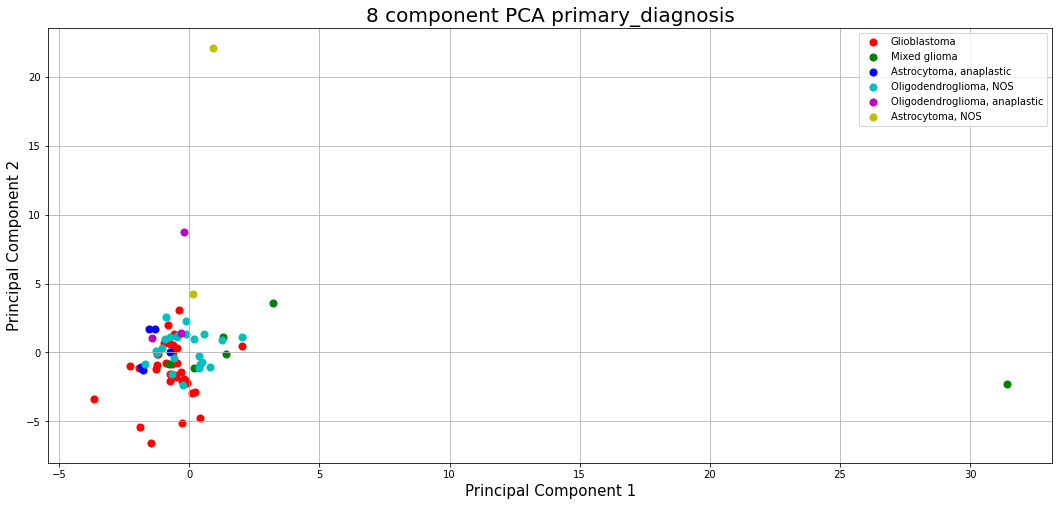

IDH
T-Testing
Boxplotting
Clustermapping
['IDH' 'chr1 1409000' 'chr1 1410000' 'chr1 227869000' 'chr1 247582000'
 'chr1 75383000' 'chr10 125940000' 'chr10 130627000' 'chr10 26894000'
 'chr10 41714000' 'chr10 65409000' 'chr10 65410000' 'chr10 6833000'
 'chr10 68525000' 'chr10 68526000' 'chr12 126958000' 'chr12 37738000'
 'chr12 56400000' 'chr12 58336000' 'chr12 93075000' 'chr14 64979000'
 'chr16 24108000' 'chr17 67326000' 'chr17 68604000' 'chr19 28690000'
 'chr19 36234000' 'chr19 36799000' 'chr19 37252000' 'chr19 37320000'
 'chr19 48933000' 'chr19 51869000' 'chr19 52420000' 'chr19 52873000'
 'chr2 169506000' 'chr2 228364000' 'chr2 232422000' 'chr2 26749000'
 'chr2 30613000' 'chr20 15946000' 'chr21 36061000' 'chr22 11550000'
 'chr3 113033000' 'chr3 127411000' 'chr4 156305000' 'chr4 174383000'
 'chr4 40147000' 'chr5 115347000' 'chr5 150453000' 'chr5 150991000'
 'chr6 26000000' 'chr6 44328000' 'chr6 93173000' 'chr6 99429000'
 'chr7 6901000' 'chr8 90685000' 'chr9 110826000' 'subject']


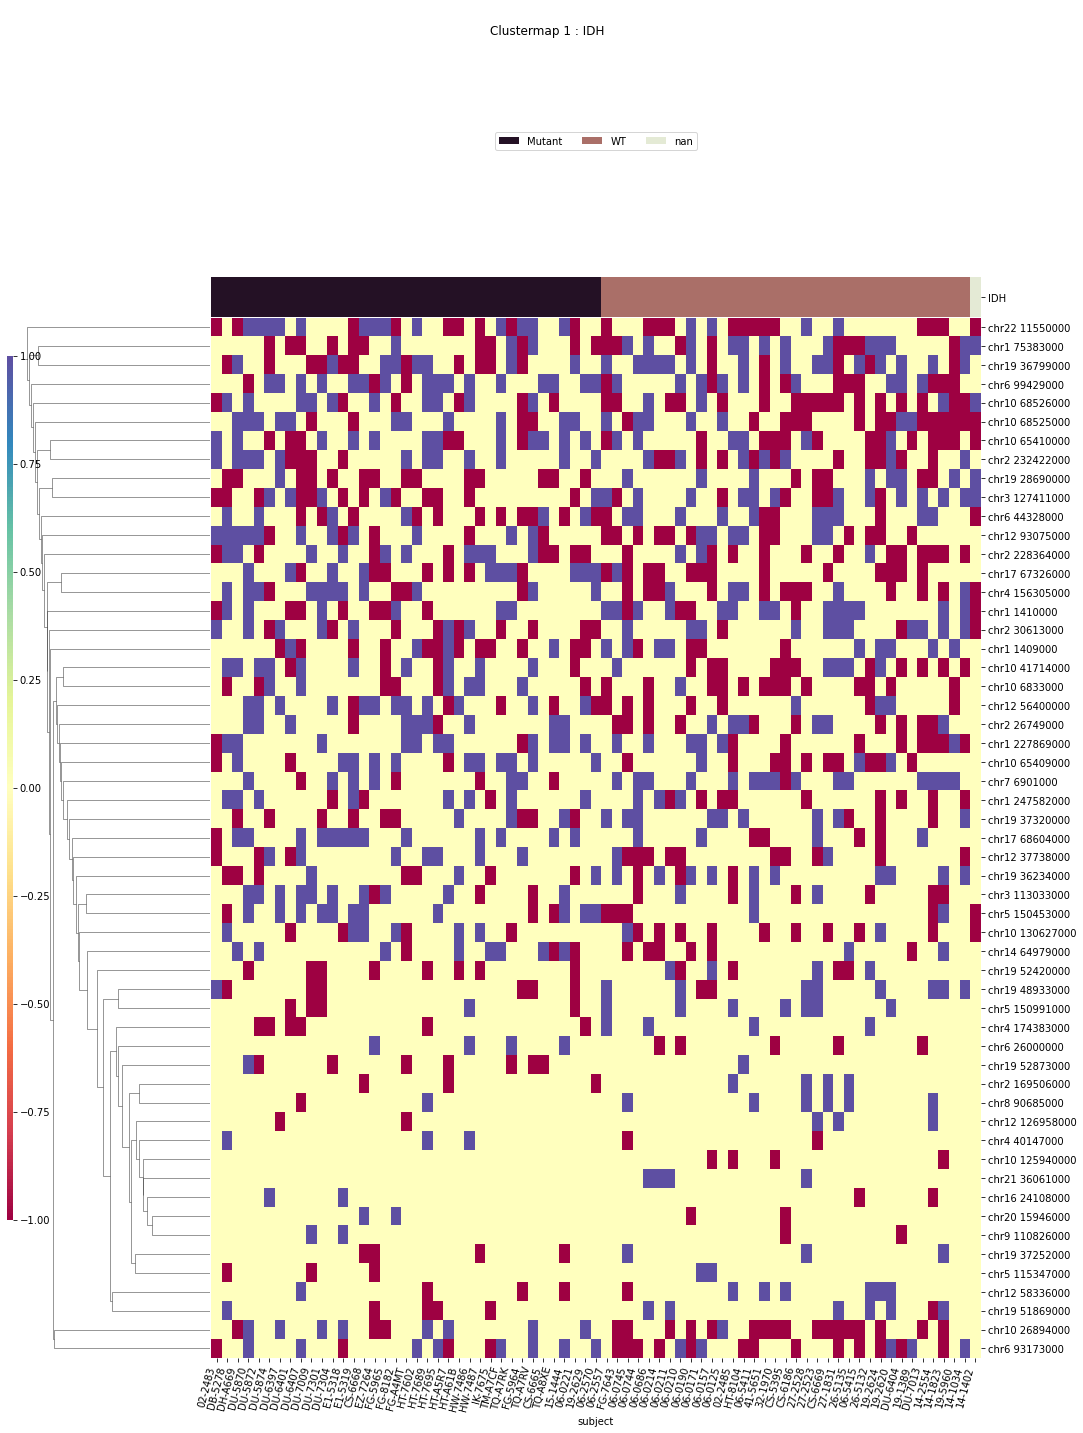

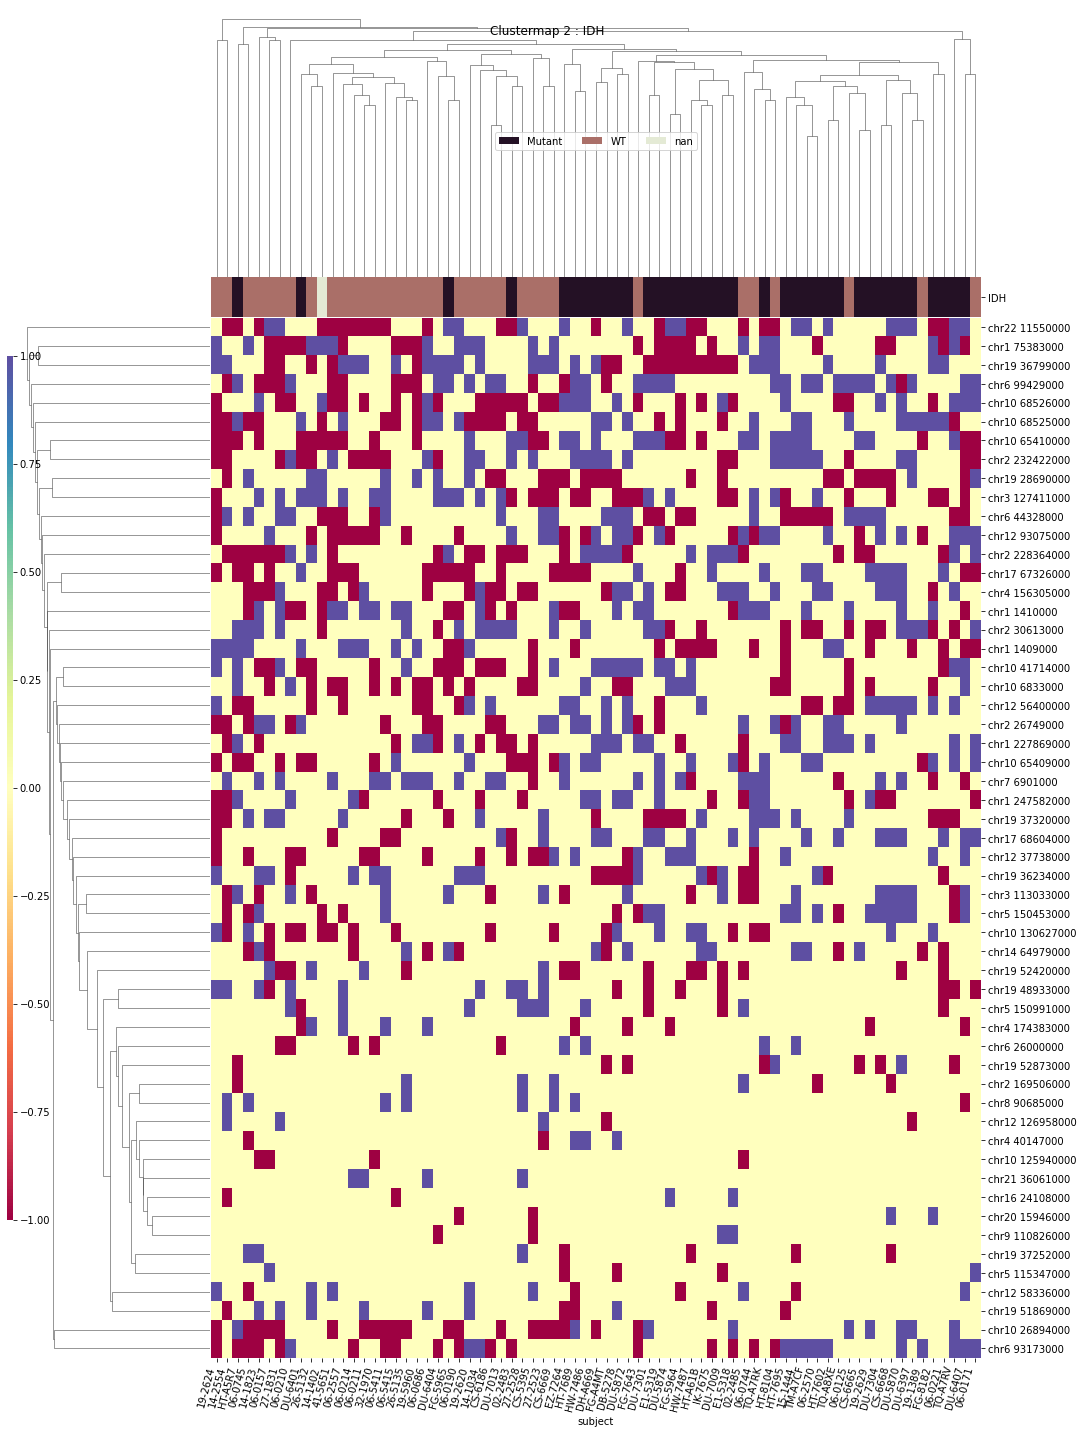

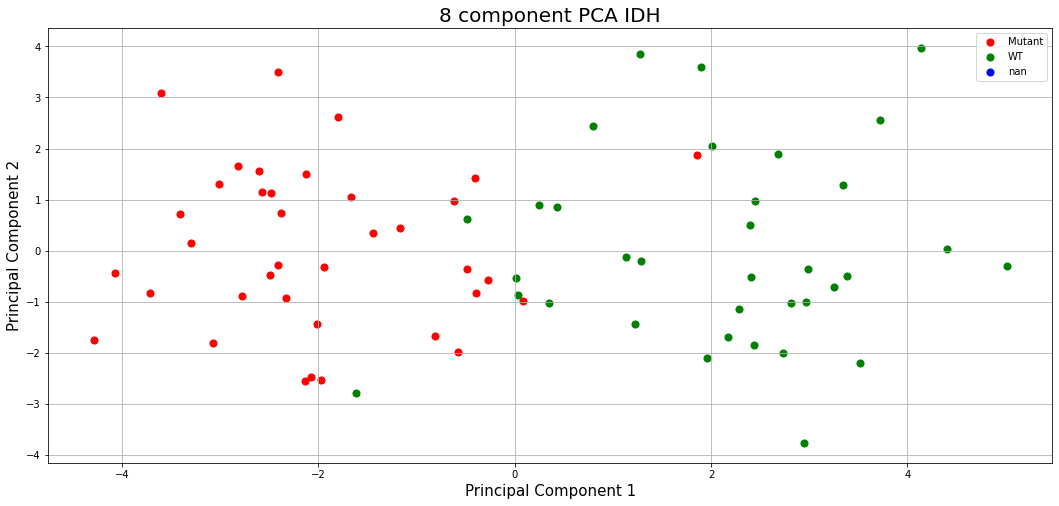

x1p19q
T-Testing
Boxplotting
 p : 9.427502449516441e-06  ( t : 4.773142909952126 ) :  chr19 36247000


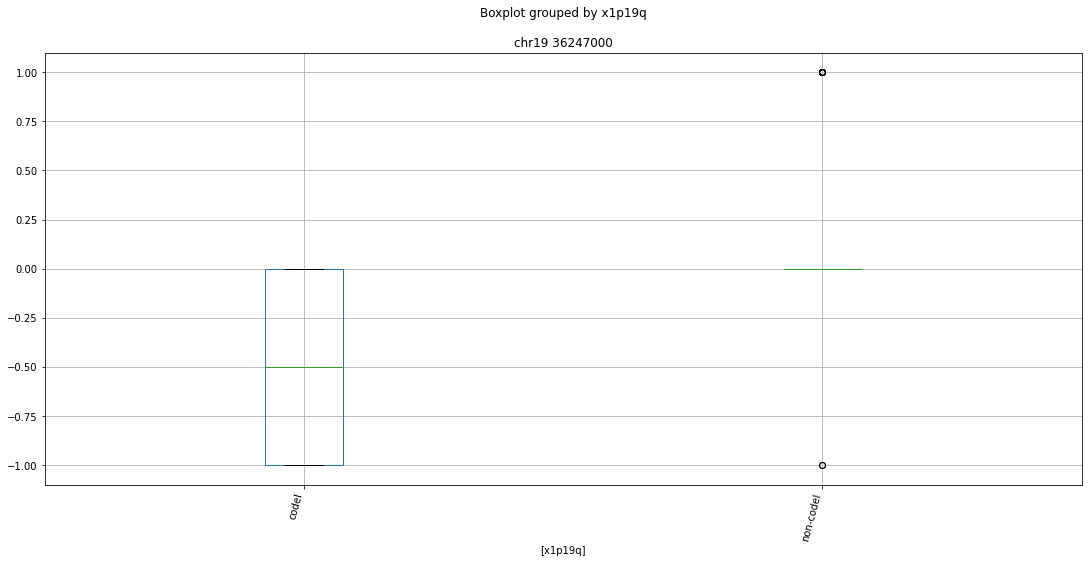

Clustermapping
['chr1 1409000' 'chr1 146948000' 'chr1 15136000' 'chr1 152455000'
 'chr1 27854000' 'chr1 29360000' 'chr1 45513000' 'chr1 46788000'
 'chr1 65139000' 'chr10 102391000' 'chr10 130627000' 'chr10 65409000'
 'chr10 6833000' 'chr10 68526000' 'chr10 73715000' 'chr10 90302000'
 'chr11 59137000' 'chr11 5934000' 'chr11 60451000' 'chr11 67757000'
 'chr11 72501000' 'chr12 34180000' 'chr12 34619000' 'chr12 37738000'
 'chr12 75445000' 'chr14 58588000' 'chr14 77795000' 'chr15 78222000'
 'chr15 78520000' 'chr16 24108000' 'chr16 35923000' 'chr16 75816000'
 'chr16 89806000' 'chr17 68604000' 'chr18 41183000' 'chr18 67077000'
 'chr19 20286000' 'chr19 28130000' 'chr19 28690000' 'chr19 36247000'
 'chr19 36799000' 'chr19 37252000' 'chr19 37320000' 'chr19 37867000'
 'chr19 38363000' 'chr19 39479000' 'chr19 39689000' 'chr19 47010000'
 'chr19 52520000' 'chr19 53460000' 'chr19 53497000' 'chr2 100684000'
 'chr2 129961000' 'chr2 177844000' 'chr2 207037000' 'chr2 228364000'
 'chr2 91852000' 'chr20 403

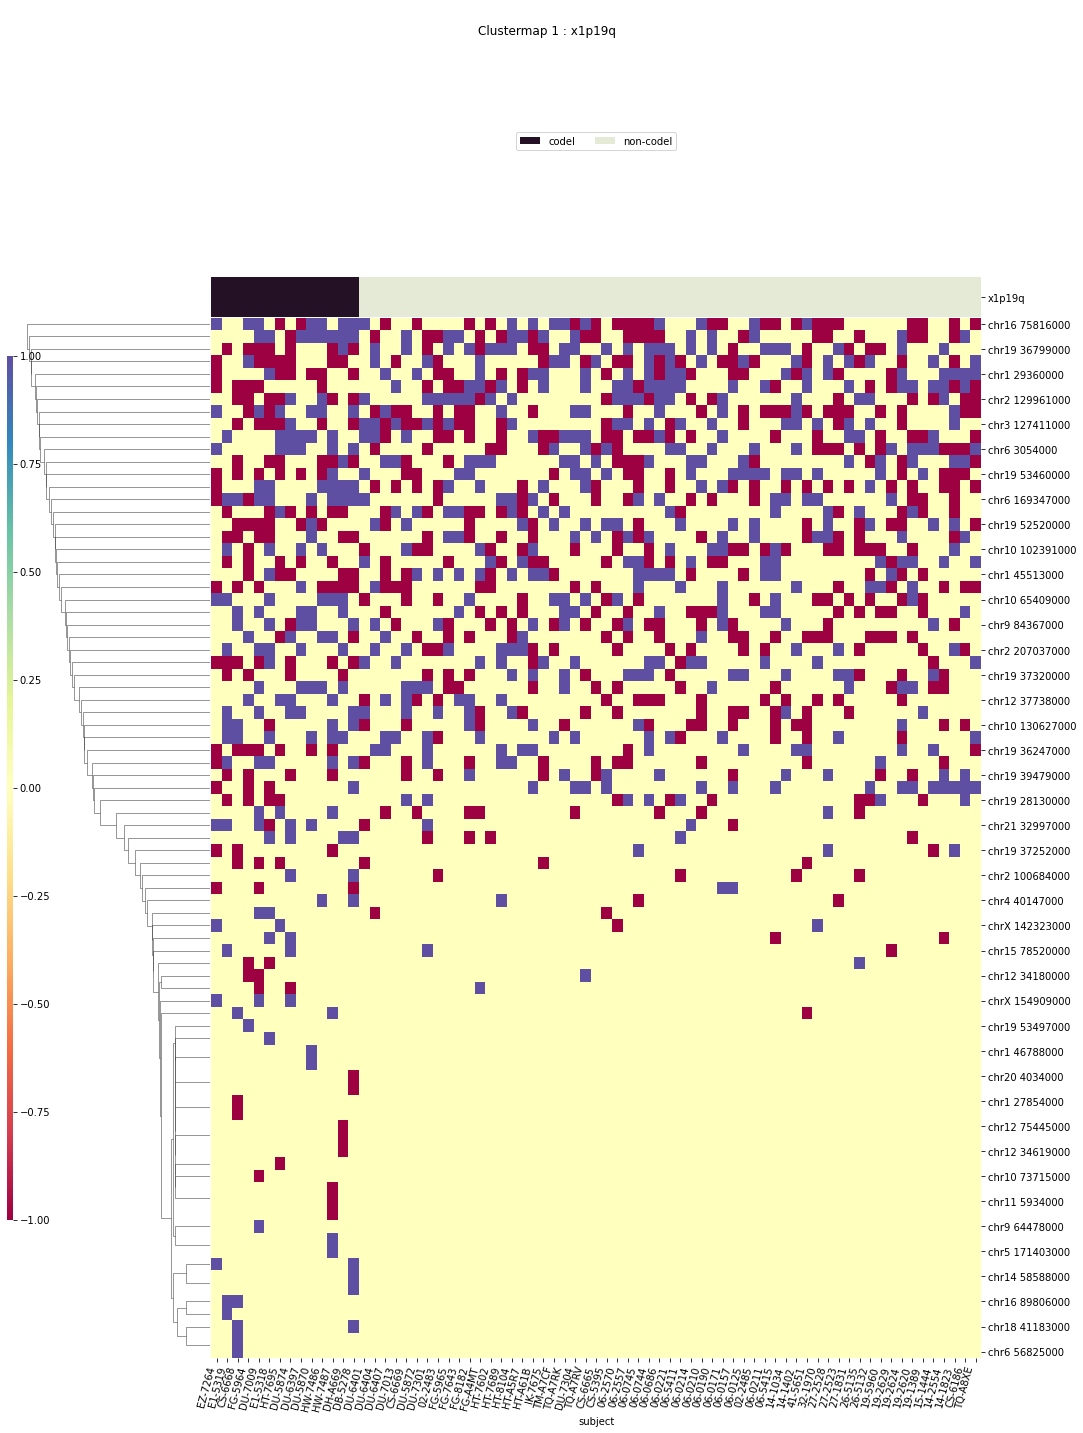

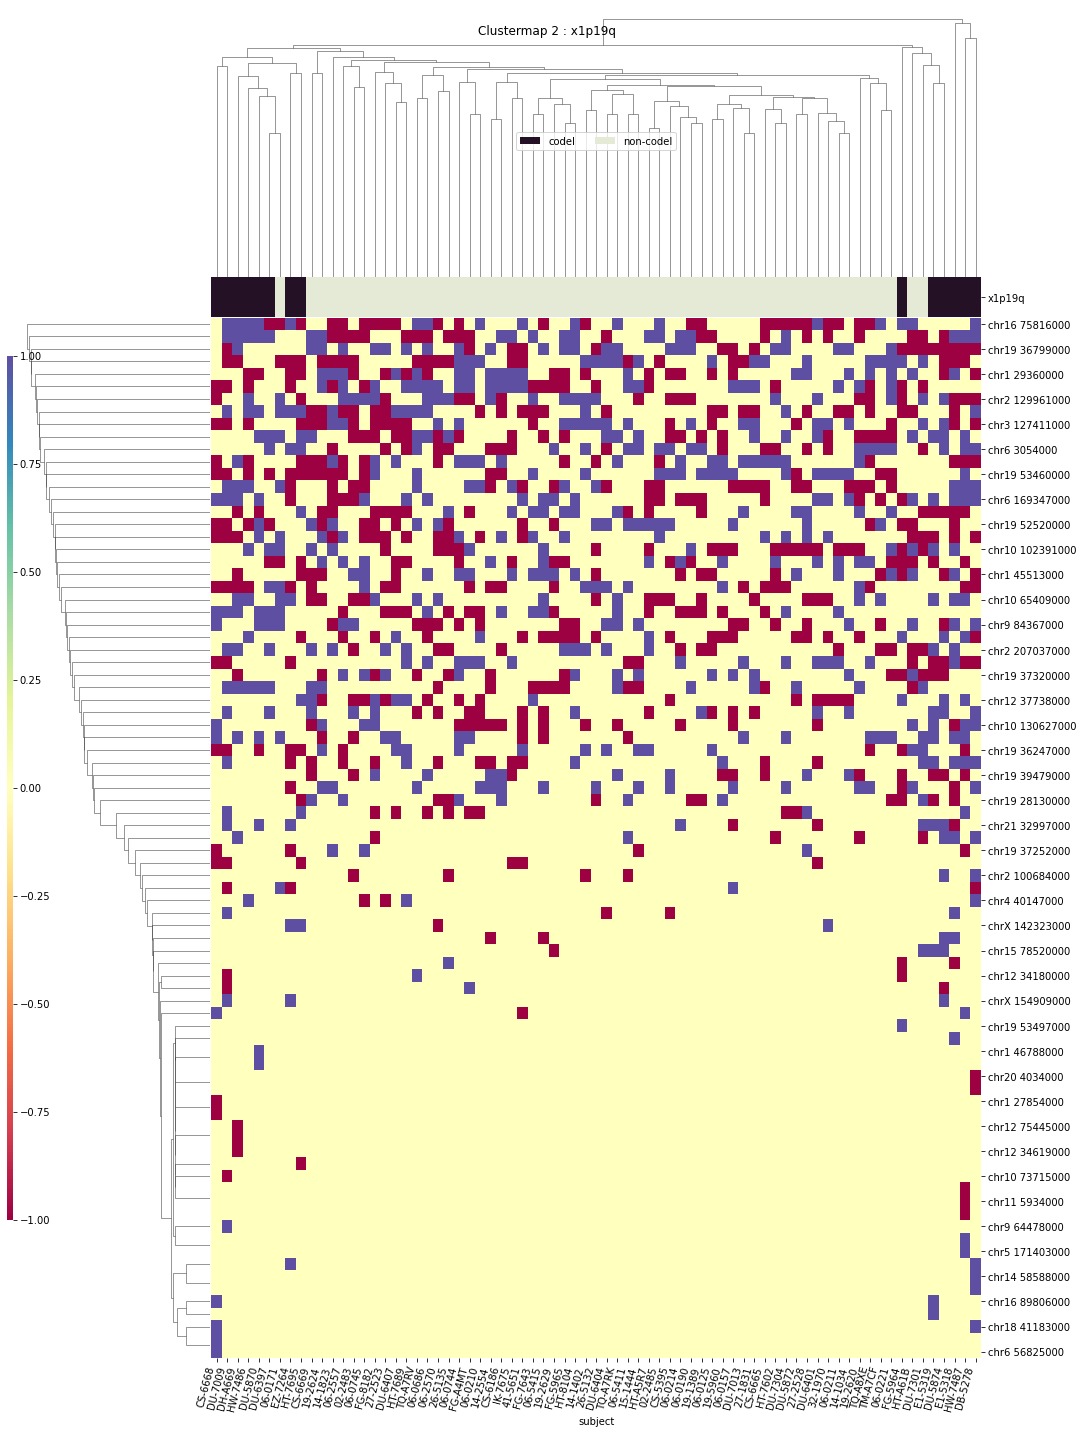

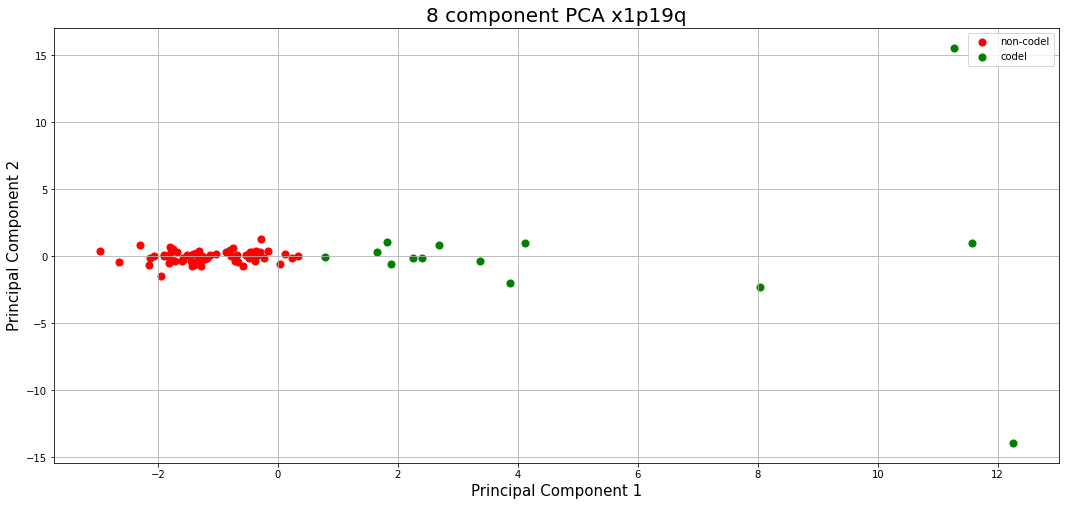

TERT
T-Testing
Boxplotting
Clustermapping
['TERT' 'chr1 209142000' 'chr1 73130000' 'chr10 26894000' 'chr10 68525000'
 'chr10 99256000' 'chr12 93075000' 'chr14 77795000' 'chr15 65227000'
 'chr16 5755000' 'chr17 30594000' 'chr17 5074000' 'chr17 67326000'
 'chr18 4918000' 'chr19 36234000' 'chr19 36247000' 'chr19 52697000'
 'chr19 52873000' 'chr2 214802000' 'chr2 234169000' 'chr2 26749000'
 'chr2 30613000' 'chr2 39322000' 'chr20 63659000' 'chr3 118539000'
 'chr3 125890000' 'chr3 186886000' 'chr4 174383000' 'chr4 66359000'
 'chr5 150991000' 'chr5 55572000' 'chr6 52761000' 'chr6 99429000'
 'chr7 6901000' 'chr8 90684000' 'chr9 134714000' 'chr9 31633000'
 'chrX 23659000' 'subject']


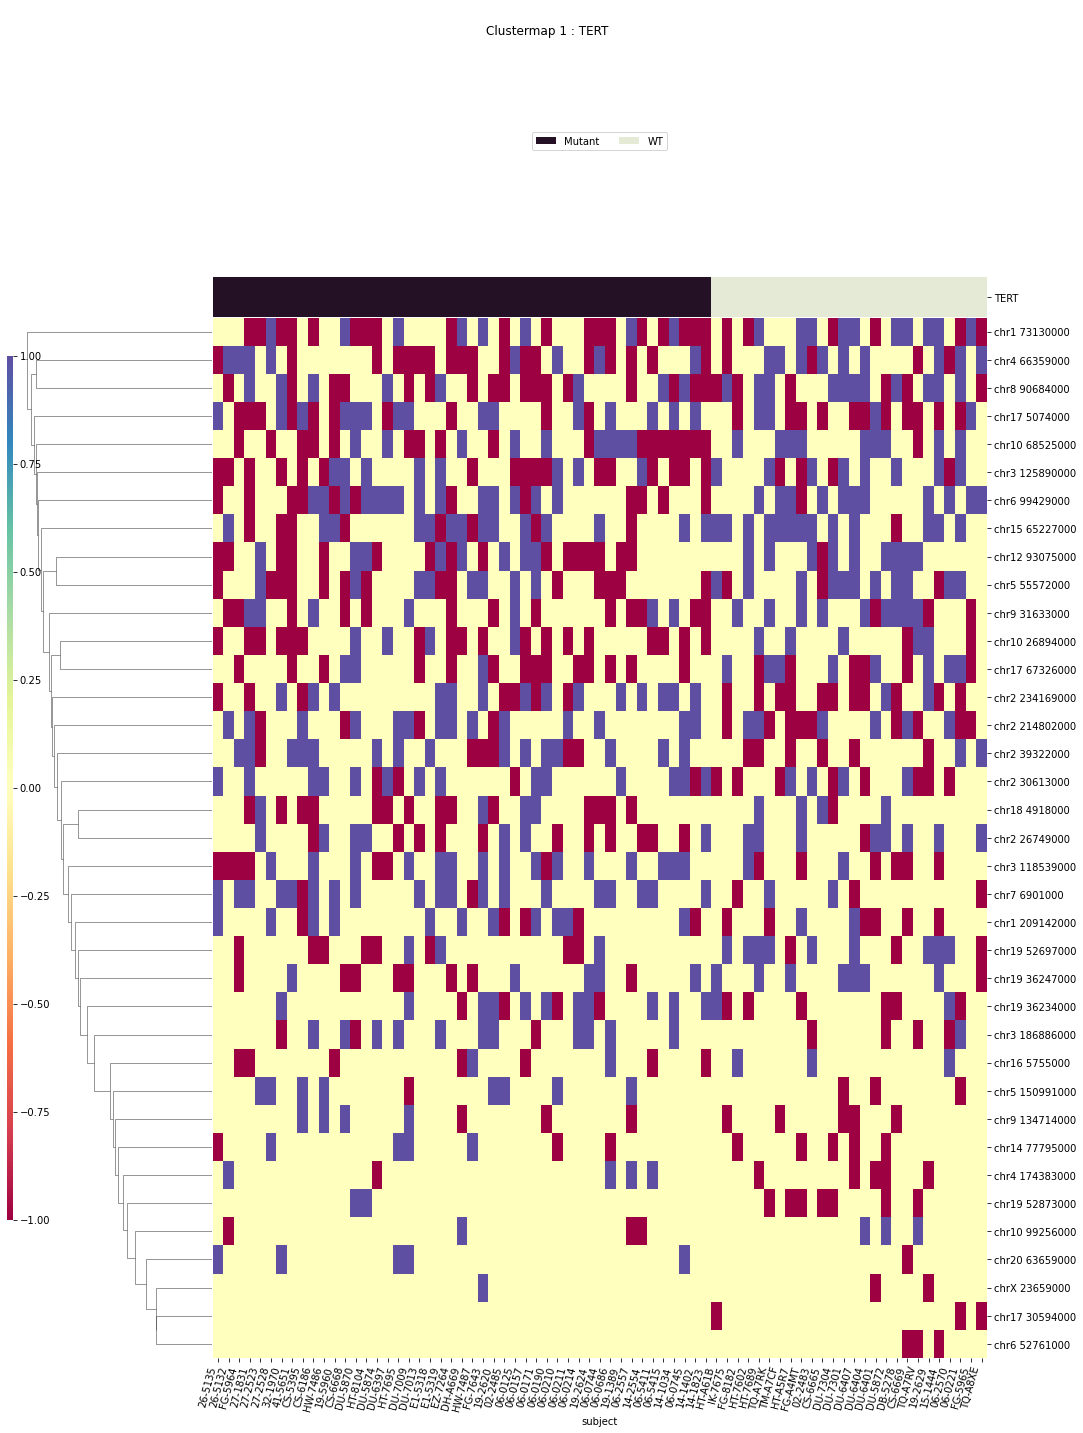

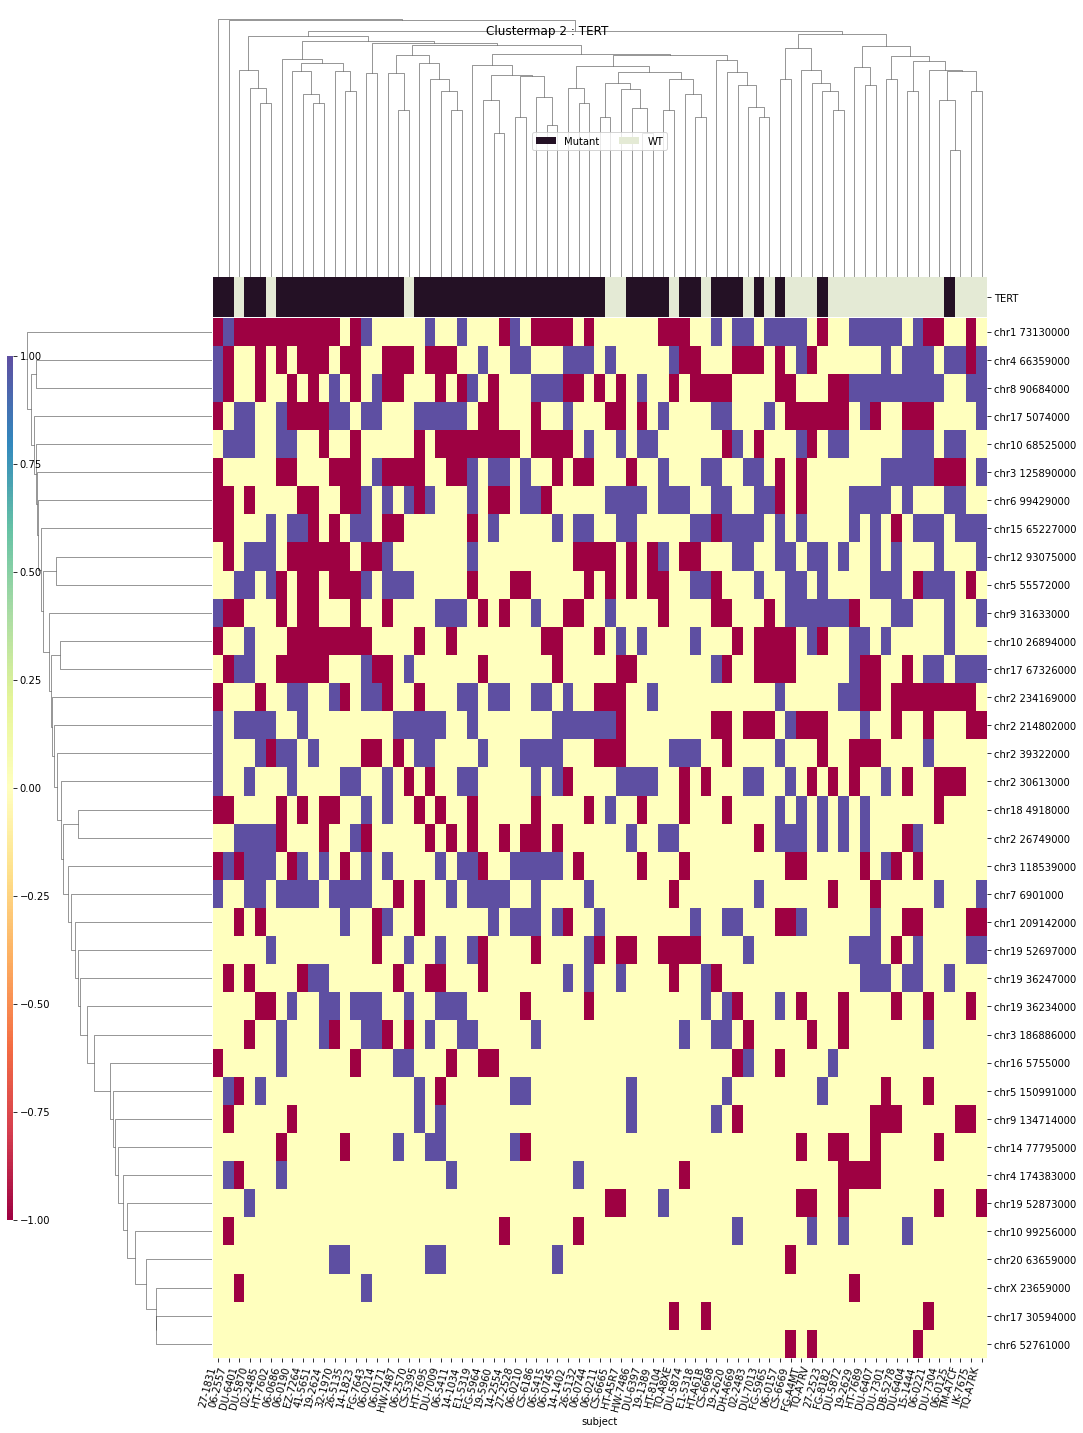

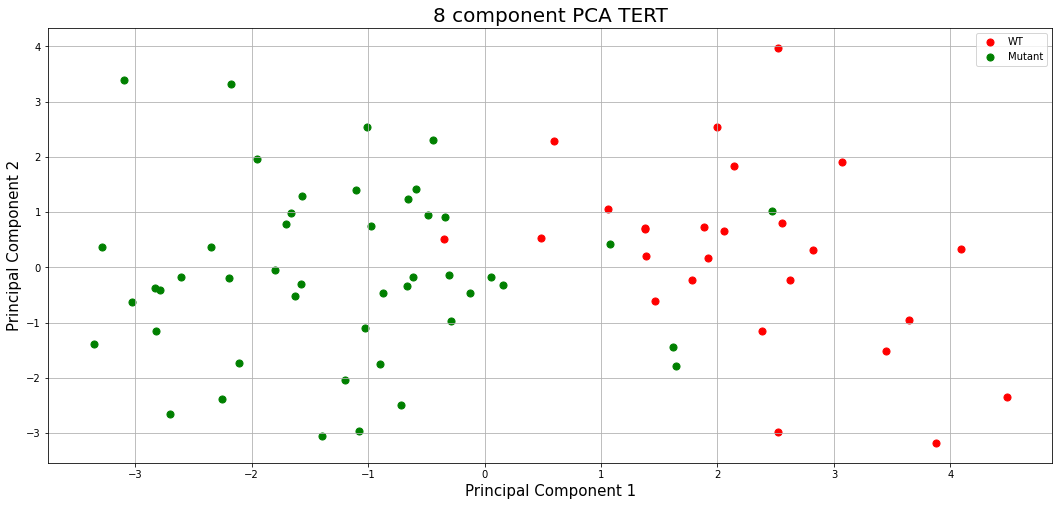

disease_type
T-Testing
Boxplotting
Clustermapping
['chr1 1409000' 'chr1 39234000' 'chr10 102455000' 'chr10 125940000'
 'chr10 26894000' 'chr10 65409000' 'chr10 6833000' 'chr10 99256000'
 'chr10 99827000' 'chr12 105478000' 'chr12 105479000' 'chr12 126958000'
 'chr12 37738000' 'chr12 56400000' 'chr12 93075000' 'chr14 64979000'
 'chr15 58834000' 'chr15 78222000' 'chr16 24108000' 'chr16 35923000'
 'chr16 75816000' 'chr17 54201000' 'chr17 68604000' 'chr19 21568000'
 'chr19 28690000' 'chr19 34920000' 'chr19 37320000' 'chr19 37629000'
 'chr19 39689000' 'chr19 48933000' 'chr19 51869000' 'chr19 52338000'
 'chr19 53838000' 'chr2 100684000' 'chr2 194505000' 'chr2 207037000'
 'chr2 228364000' 'chr21 36061000' 'chr21 39157000' 'chr3 127411000'
 'chr3 23545000' 'chr3 39419000' 'chr4 174383000' 'chr4 40147000'
 'chr5 115347000' 'chr5 30486000' 'chr5 55572000' 'chr6 134659000'
 'chr6 99429000' 'chr7 140552000' 'chr7 54675000' 'chr7 65261000'
 'chr7 99432000' 'chr8 142828000' 'chr8_KZ208915v1_fix 11630

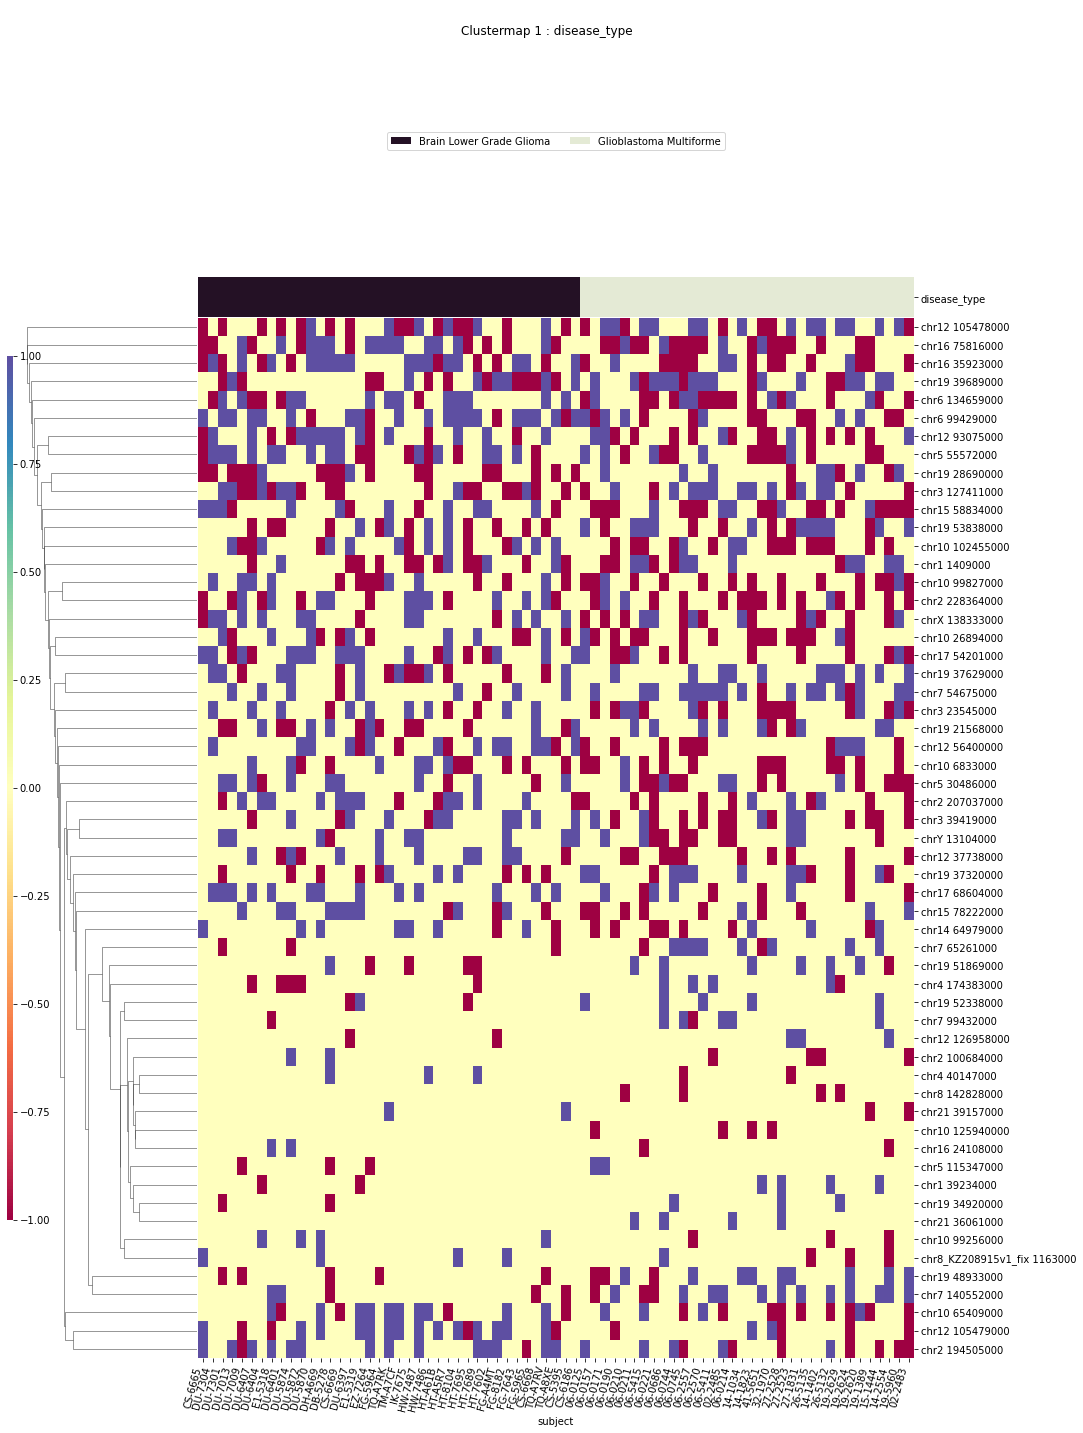

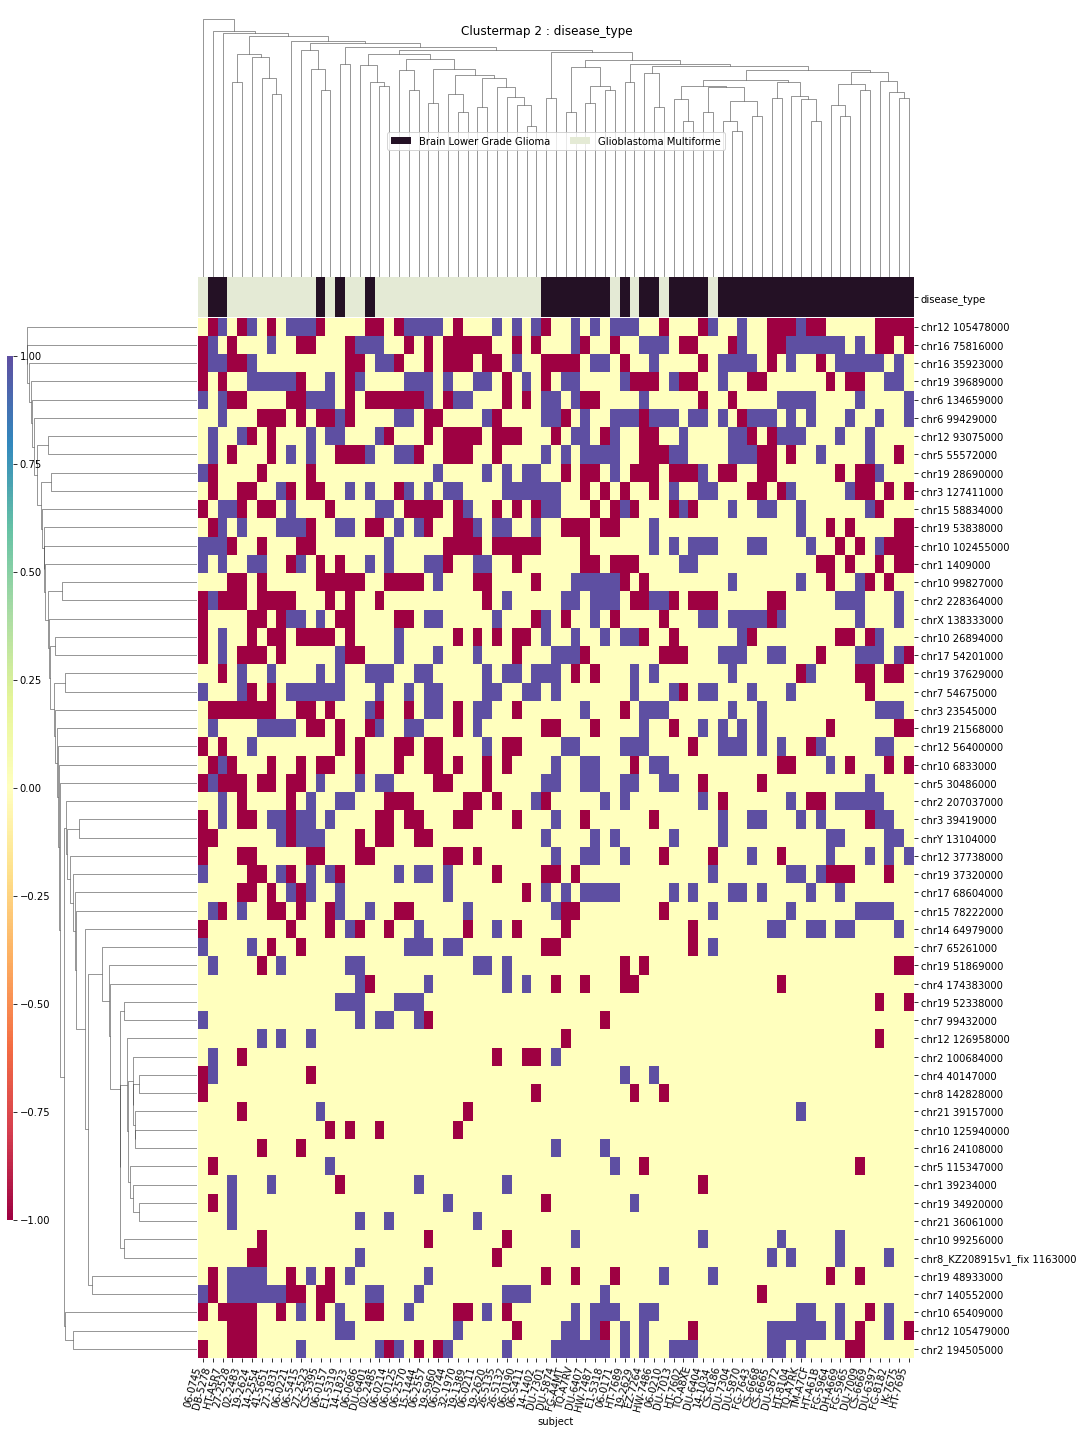

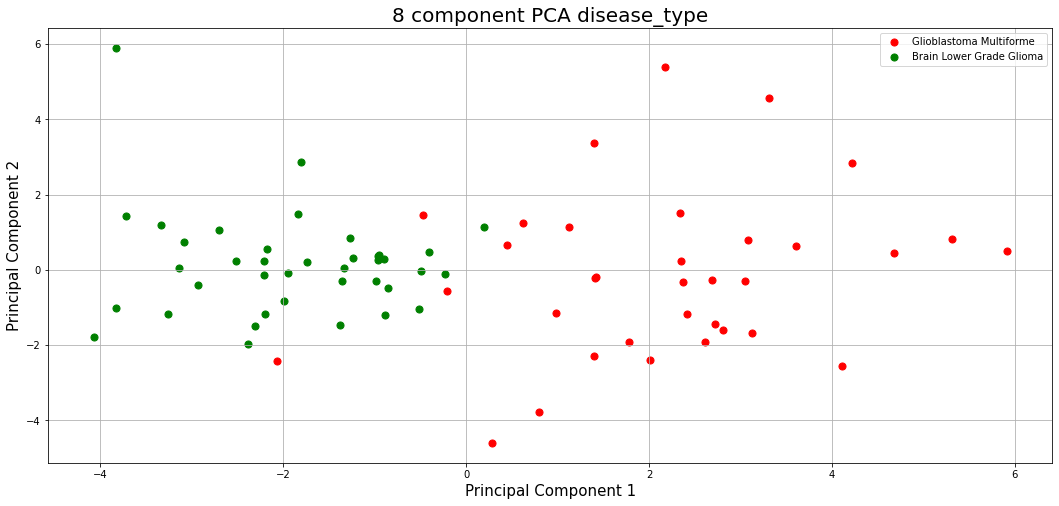

IDH_1p19q_status
T-Testing


/Users/jake/Library/Python/3.8/lib/python/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/jake/Library/Python/3.8/lib/python/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Boxplotting
Clustermapping
['IDH_1p19q_status' 'chr1 1409000' 'chr1 15136000' 'chr1 152455000'
 'chr1 227869000' 'chr1 247582000' 'chr1 29359000' 'chr1 29360000'
 'chr1 40572000' 'chr1 45513000' 'chr1 54637000' 'chr1 65139000'
 'chr1 75383000' 'chr10 130627000' 'chr10 26894000' 'chr10 41714000'
 'chr10 65409000' 'chr10 6833000' 'chr10 68525000' 'chr10 68526000'
 'chr11 59137000' 'chr11 60451000' 'chr11 62859000' 'chr11 67757000'
 'chr12 105479000' 'chr12 34180000' 'chr12 37738000' 'chr12 93075000'
 'chr14 77795000' 'chr15 65227000' 'chr15 78222000' 'chr15 78520000'
 'chr16 24108000' 'chr16 35923000' 'chr16 5755000' 'chr16 75816000'
 'chr16 89806000' 'chr17 30594000' 'chr17 54201000' 'chr17 67326000'
 'chr17 68604000' 'chr18 41183000' 'chr18 4918000' 'chr18 67077000'
 'chr19 20286000' 'chr19 28130000' 'chr19 28690000' 'chr19 36234000'
 'chr19 36247000' 'chr19 36799000' 'chr19 37252000' 'chr19 37320000'
 'chr19 37867000' 'chr19 39479000' 'chr19 39689000' 'chr19 48933000'
 'chr19 51869000

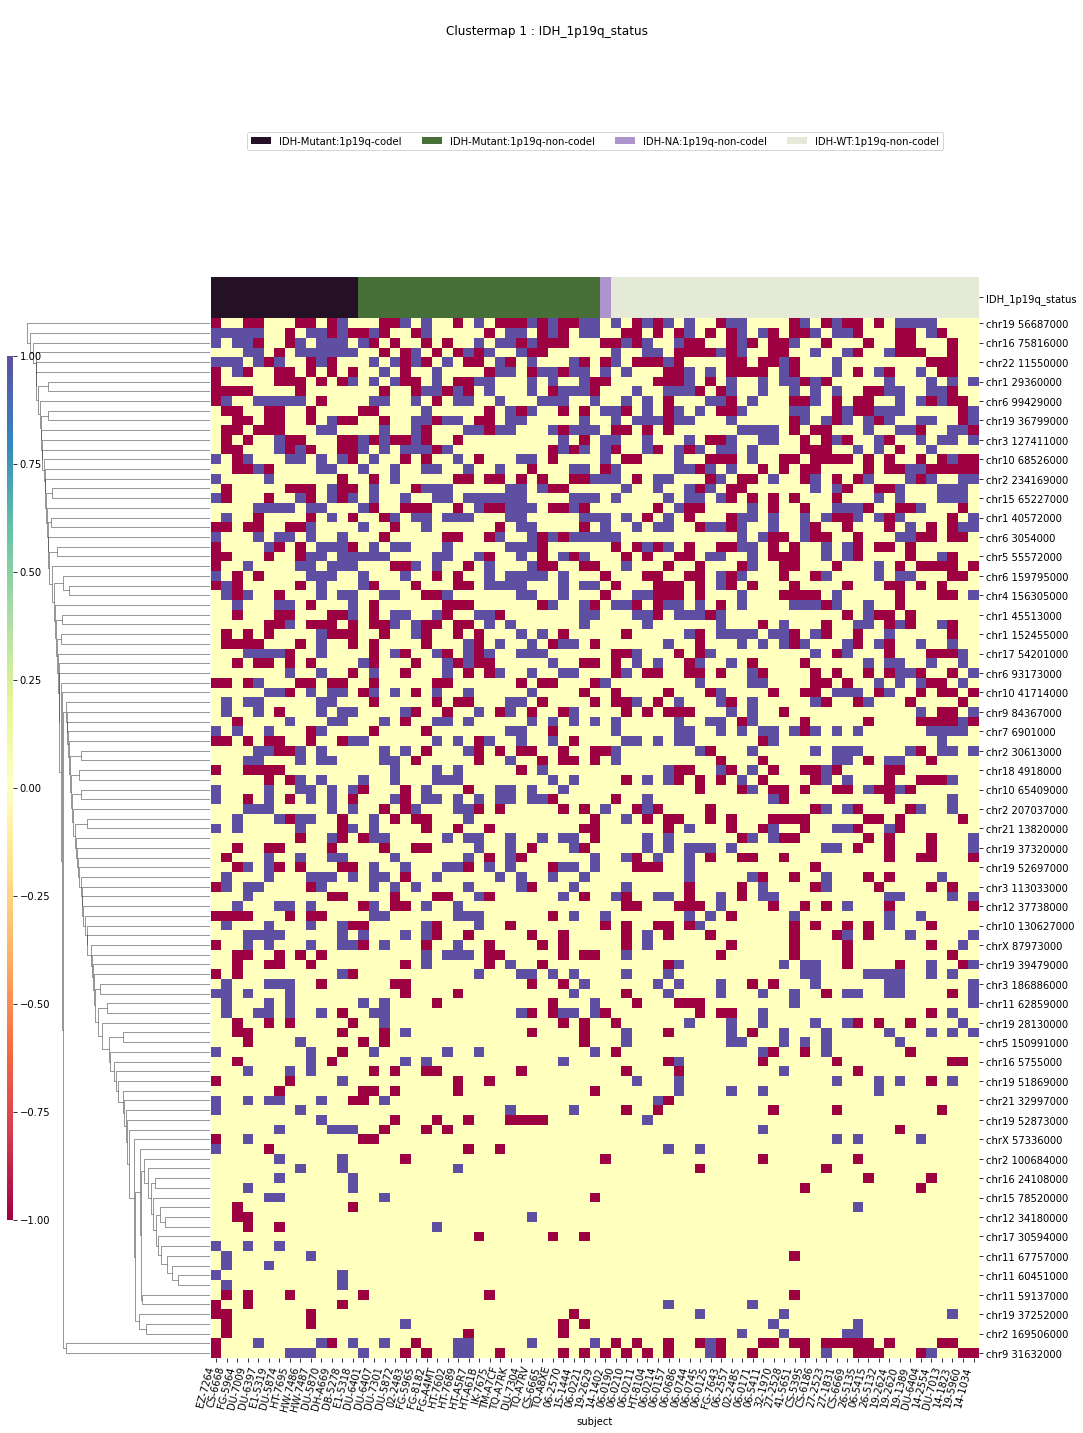

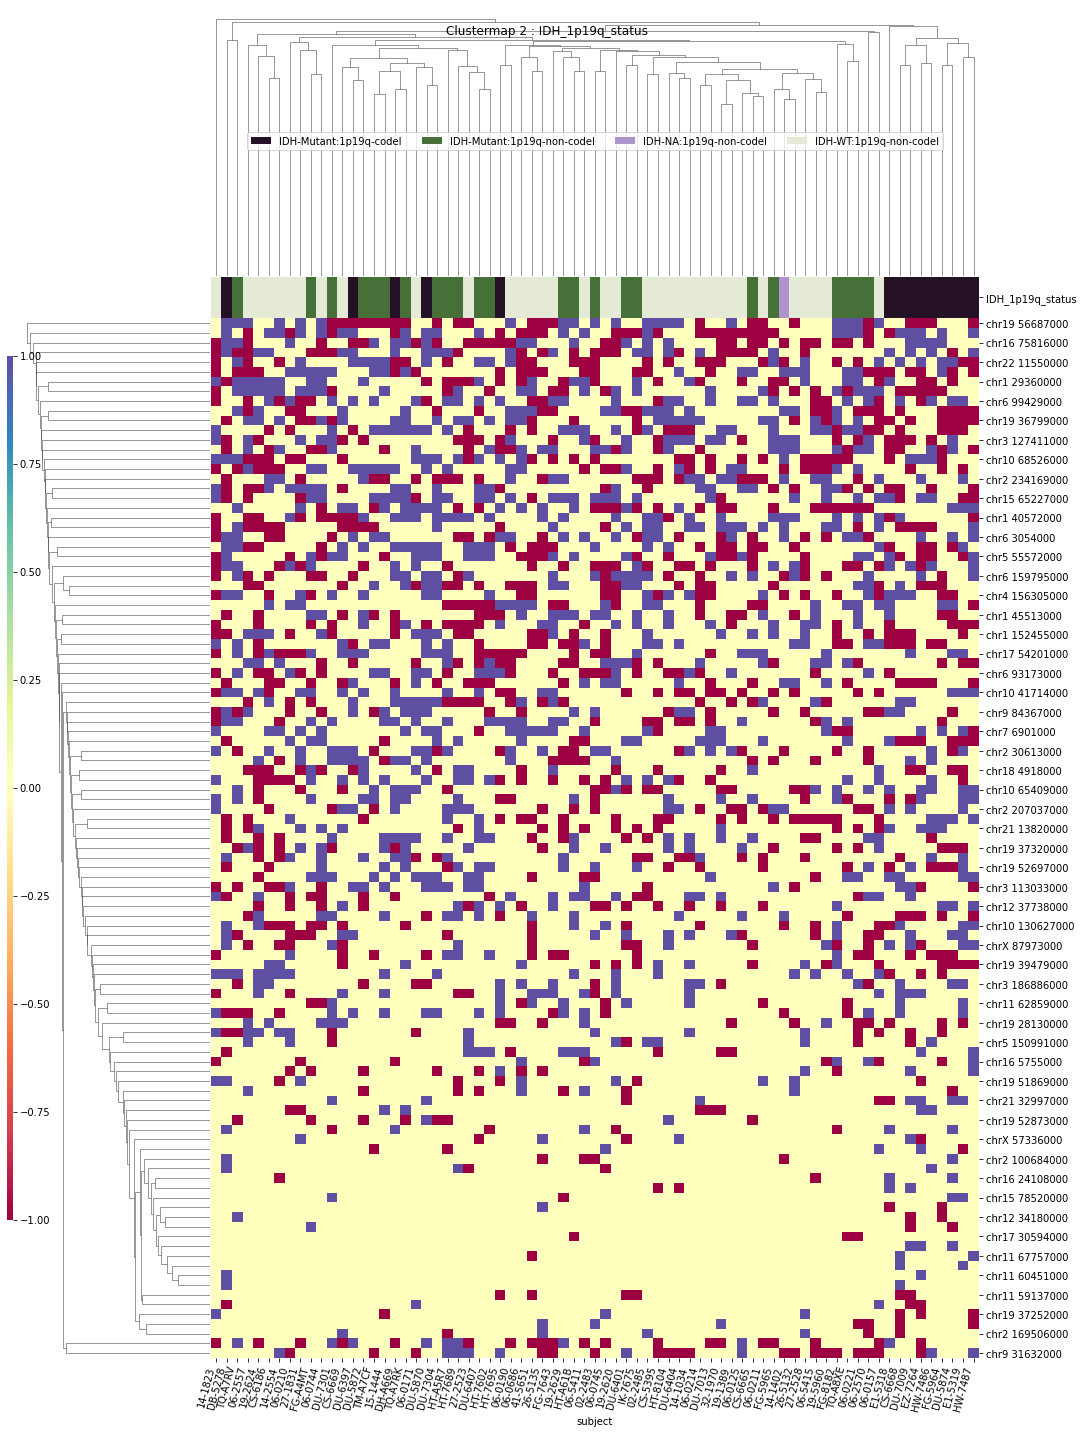

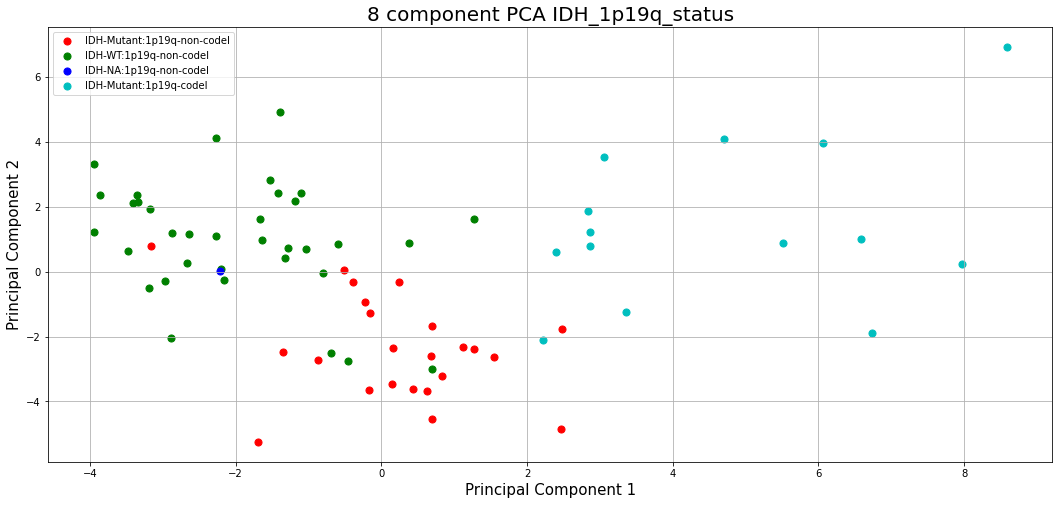

WHO_groups
T-Testing
Boxplotting
 p : 5.7137637292686887e-08  ( t : 7.237893117074439 ) :  chr9 110826000


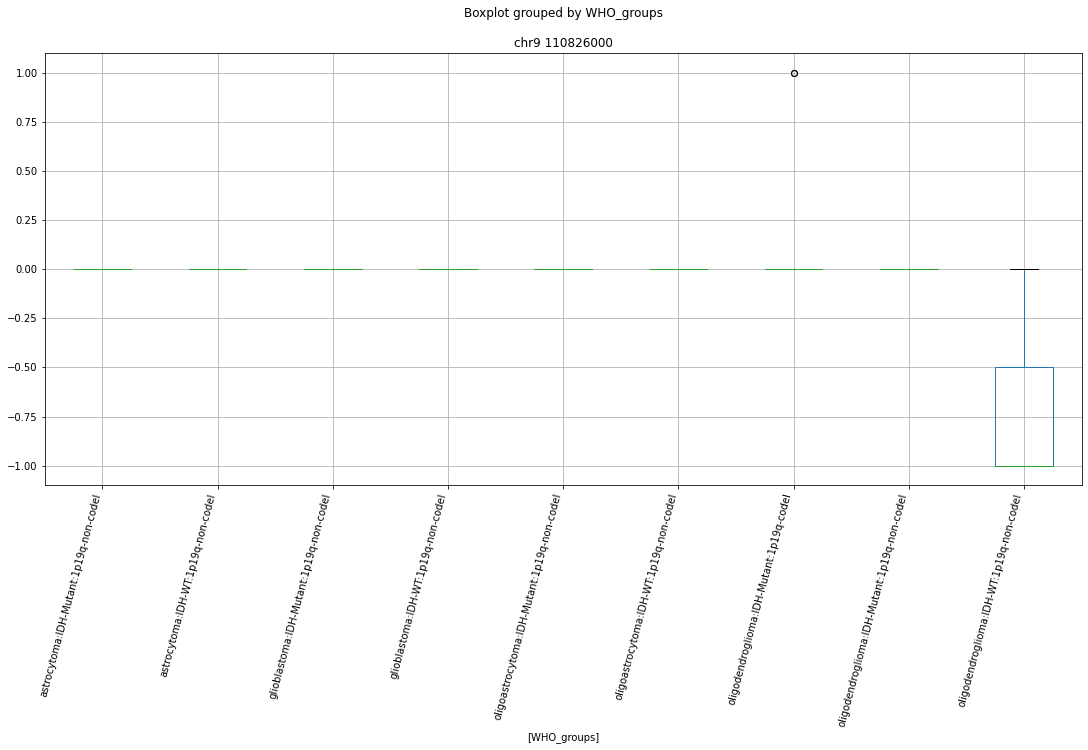

 p : 5.7137637292686887e-08  ( t : 7.237893117074439 ) :  chr19 52873000


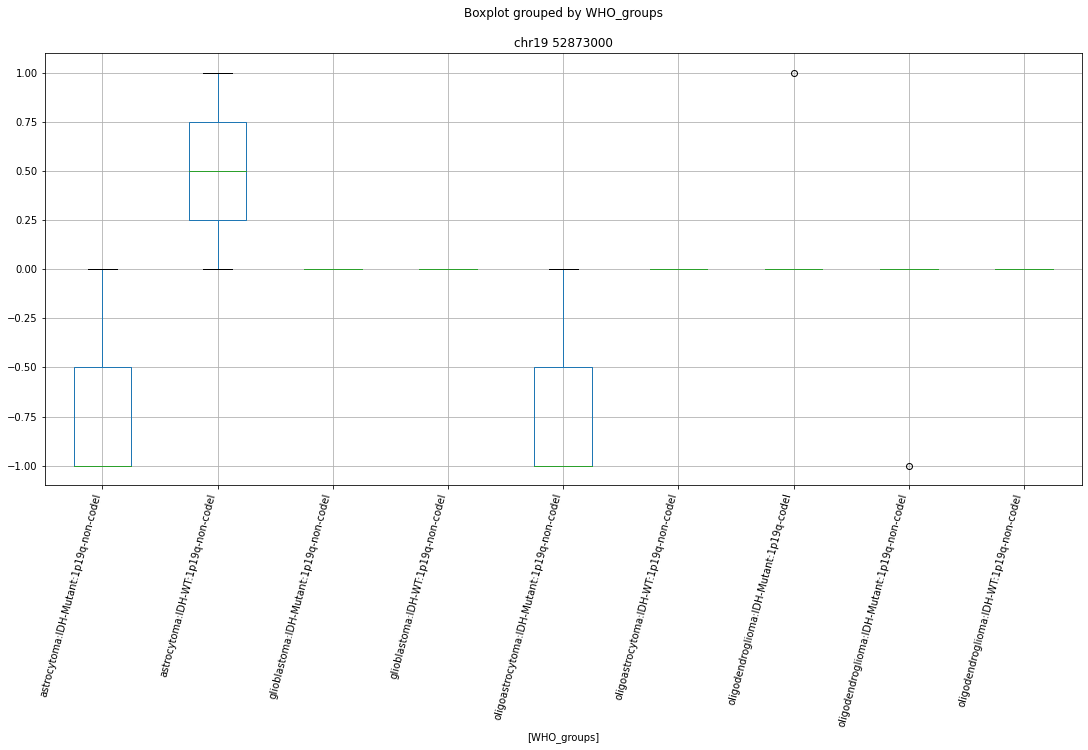

Clustermapping
['WHO_groups' 'chr1 10425000' 'chr1 105473000' 'chr1 109767000'
 'chr1 111800000' 'chr1 114058000' 'chr1 120424000' 'chr1 1409000'
 'chr1 145415000' 'chr1 147240000' 'chr1 15136000' 'chr1 152455000'
 'chr1 15379000' 'chr1 155626000' 'chr1 1580000' 'chr1 159767000'
 'chr1 159768000' 'chr1 160914000' 'chr1 165092000' 'chr1 165093000'
 'chr1 166605000' 'chr1 209142000' 'chr1 213150000' 'chr1 224339000'
 'chr1 224340000' 'chr1 227606000' 'chr1 227868000' 'chr1 227869000'
 'chr1 247016000' 'chr1 25587000' 'chr1 29339000' 'chr1 29359000'
 'chr1 29360000' 'chr1 39234000' 'chr1 40572000' 'chr1 45513000'
 'chr1 45529000' 'chr1 46395000' 'chr1 52006000' 'chr1 65139000'
 'chr1 65140000' 'chr1 66425000' 'chr1 70461000' 'chr1 75383000'
 'chr1 77983000' 'chr1 89066000' 'chr1 89067000' 'chr10 102391000'
 'chr10 102455000' 'chr10 130627000' 'chr10 133542000' 'chr10 26894000'
 'chr10 37493000' 'chr10 37494000' 'chr10 41714000' 'chr10 6165000'
 'chr10 65409000' 'chr10 65410000' 'chr10 683

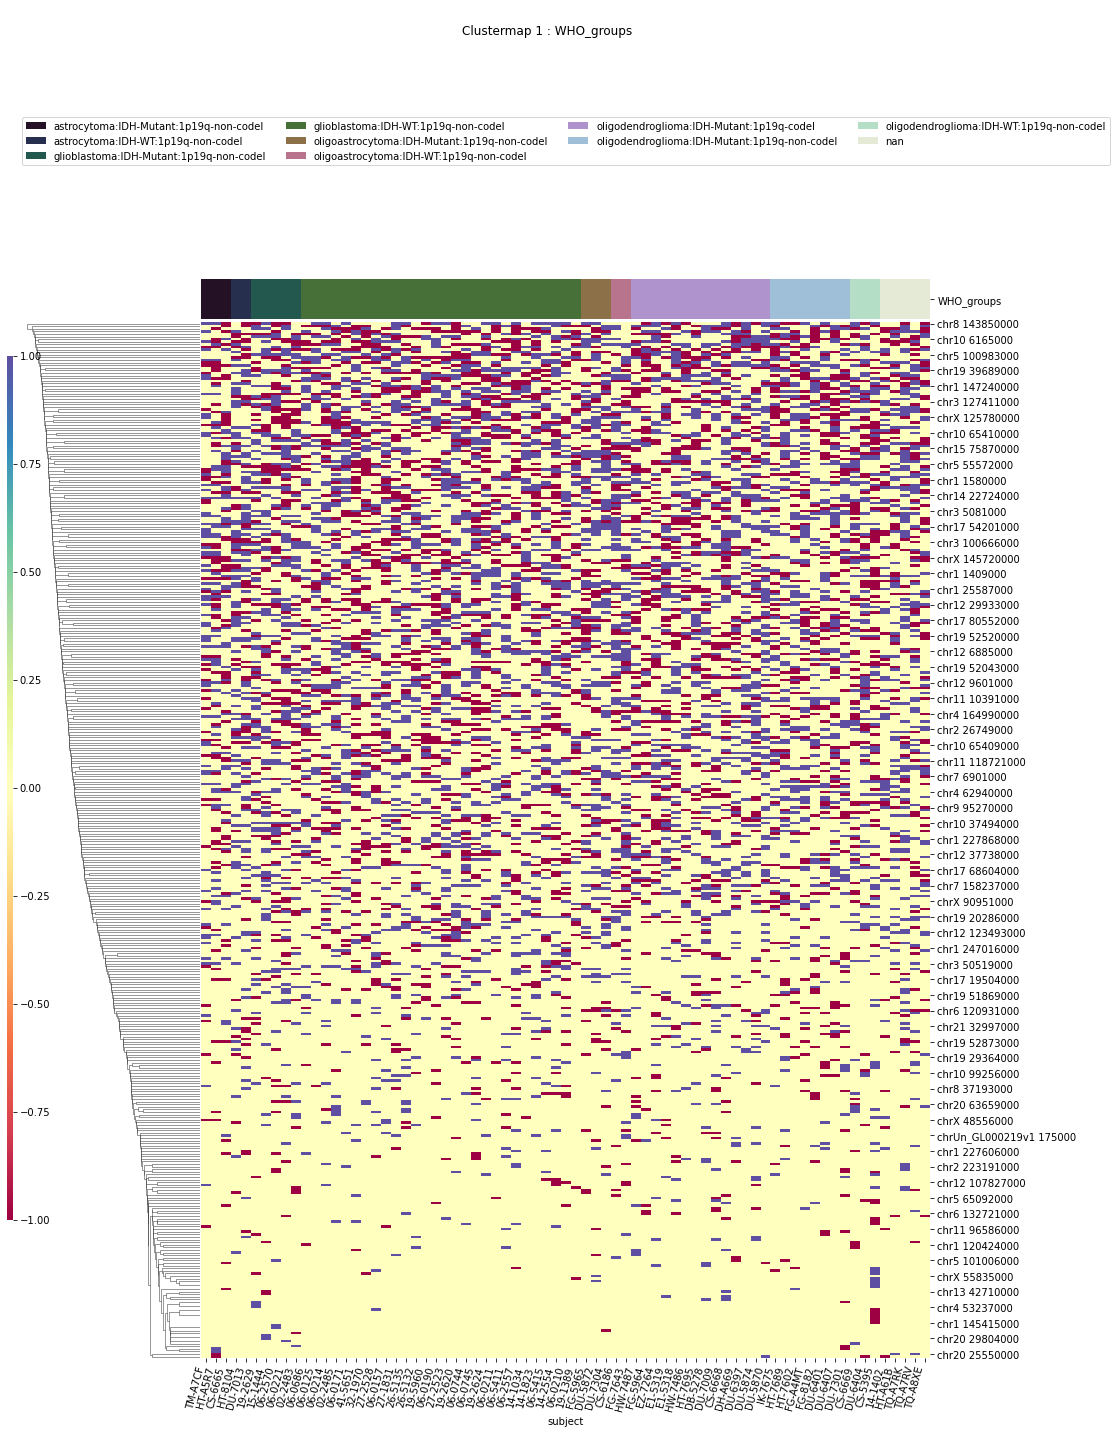

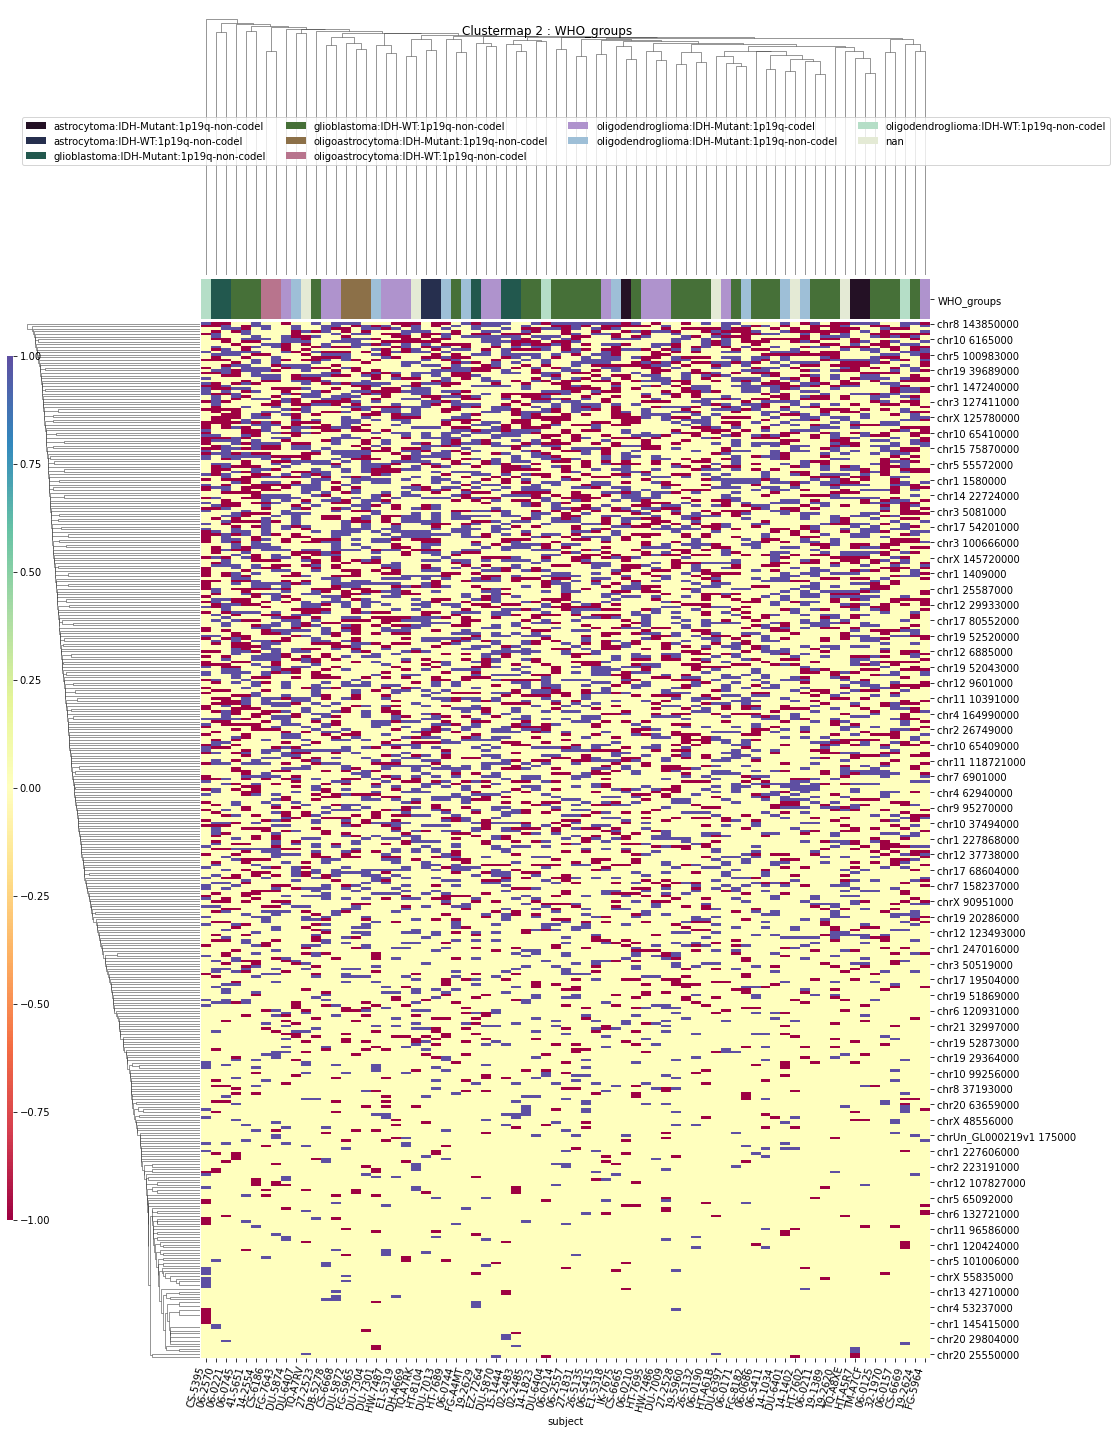

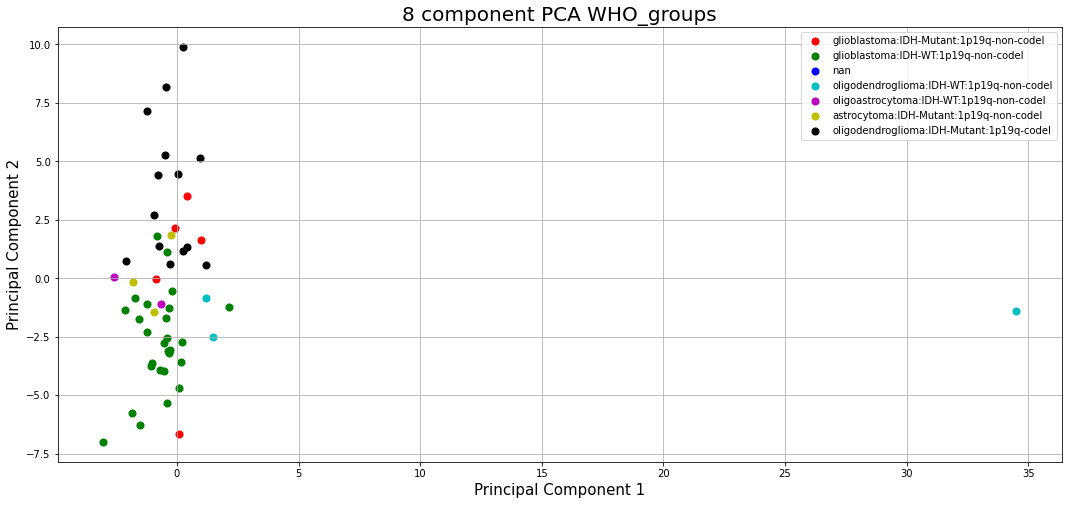

Triple_group
T-Testing


/Users/jake/Library/Python/3.8/lib/python/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/jake/Library/Python/3.8/lib/python/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Boxplotting
 p : 3.3479850017401667e-06  ( t : 5.57801808120821 ) :  chr6 52761000


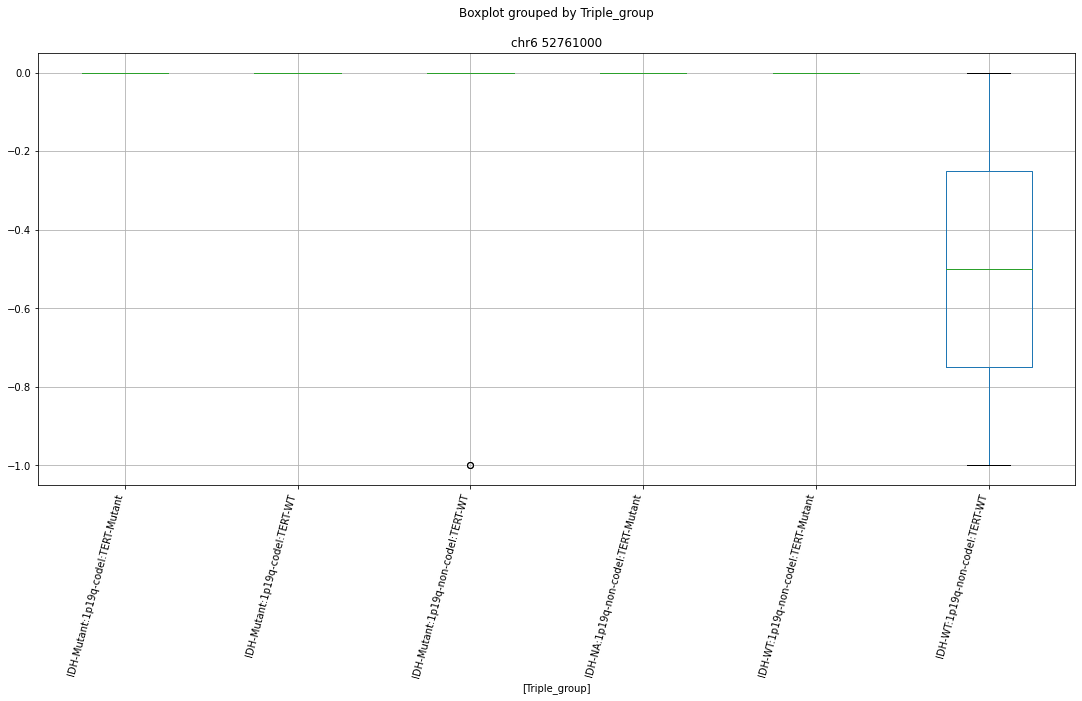

 p : 3.3479850017401667e-06  ( t : 5.57801808120821 ) :  chrX 135406000


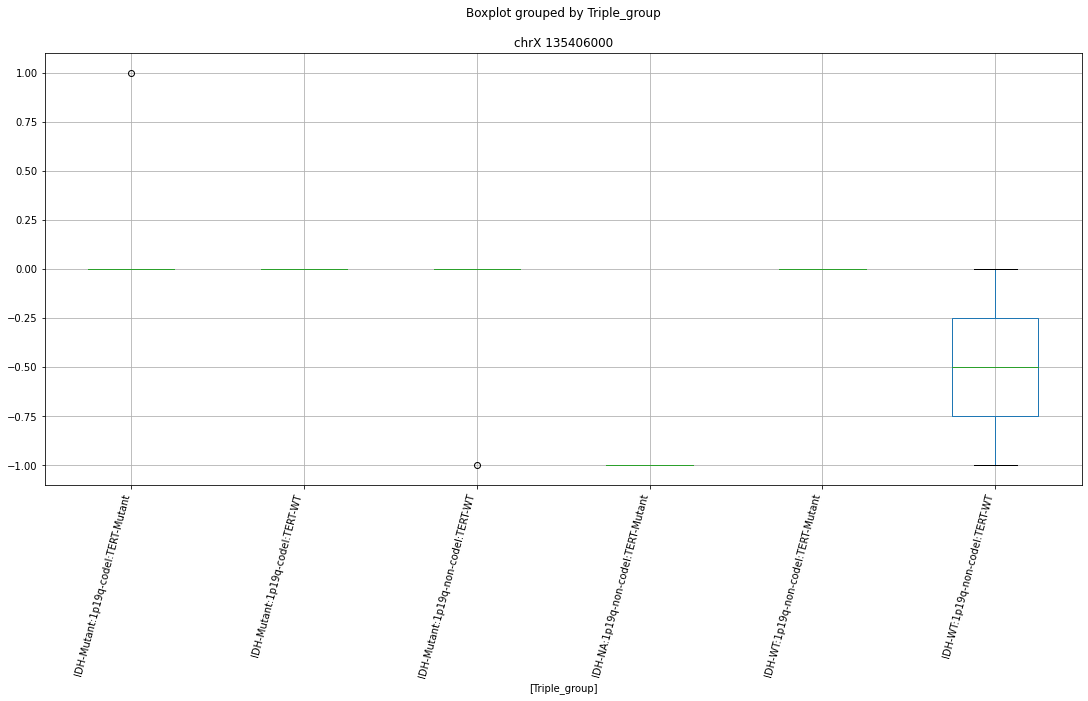

 p : 3.3479850017401667e-06  ( t : 5.57801808120821 ) :  chr3 132649000


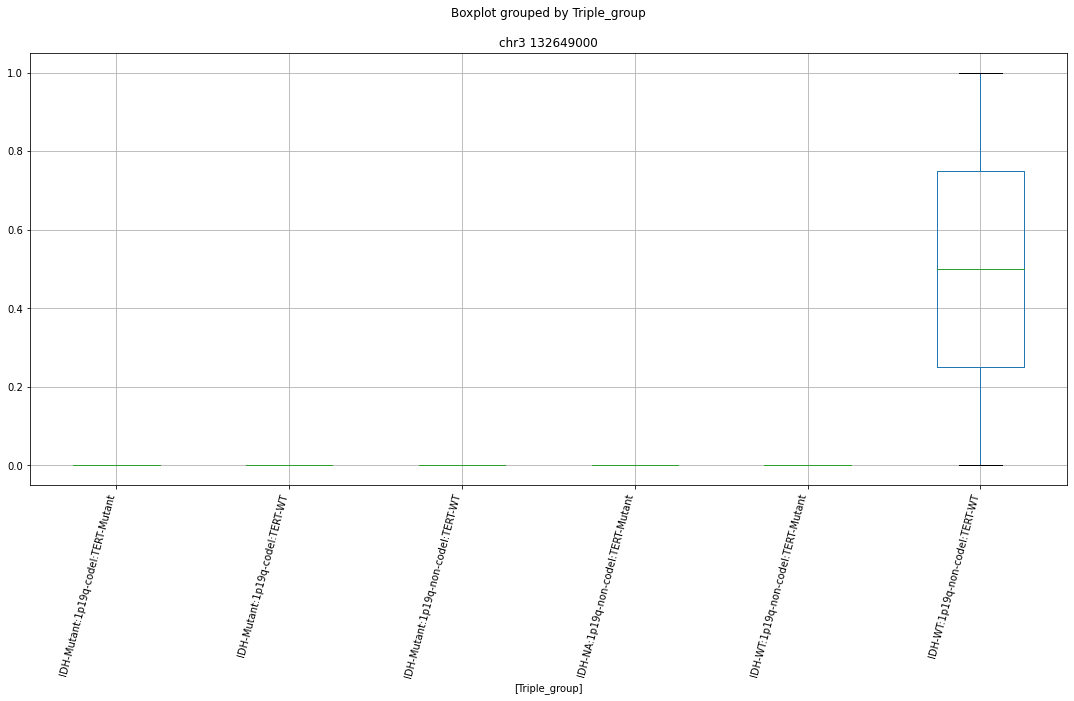

Clustermapping
['Triple_group' 'chr1 120424000' 'chr1 1409000' 'chr1 147734000'
 'chr1 15136000' 'chr1 159767000' 'chr1 209142000' 'chr1 227606000'
 'chr1 227868000' 'chr1 227869000' 'chr1 29359000' 'chr1 39234000'
 'chr1 40572000' 'chr1 46395000' 'chr1 54637000' 'chr1 65139000'
 'chr1 75383000' 'chr1 9002000' 'chr10 102391000' 'chr10 133542000'
 'chr10 26894000' 'chr10 65409000' 'chr10 6833000' 'chr10 68525000'
 'chr10 68526000' 'chr10 97416000' 'chr10 99256000' 'chr11 59137000'
 'chr11 62859000' 'chr11 67757000' 'chr12 105479000' 'chr12 110570000'
 'chr12 118106000' 'chr12 123581000' 'chr12 34180000' 'chr12 37738000'
 'chr12 43919000' 'chr12 93075000' 'chr14 20084000' 'chr14 77795000'
 'chr15 63082000' 'chr15 65227000' 'chr15 75870000' 'chr15 78222000'
 'chr15 78520000' 'chr16 24108000' 'chr16 35923000' 'chr16 35955000'
 'chr16 5755000' 'chr16 75816000' 'chr16 89806000' 'chr17 30594000'
 'chr17 43354000' 'chr17 5074000' 'chr17 54201000' 'chr17 67326000'
 'chr17 68604000' 'chr17 80552

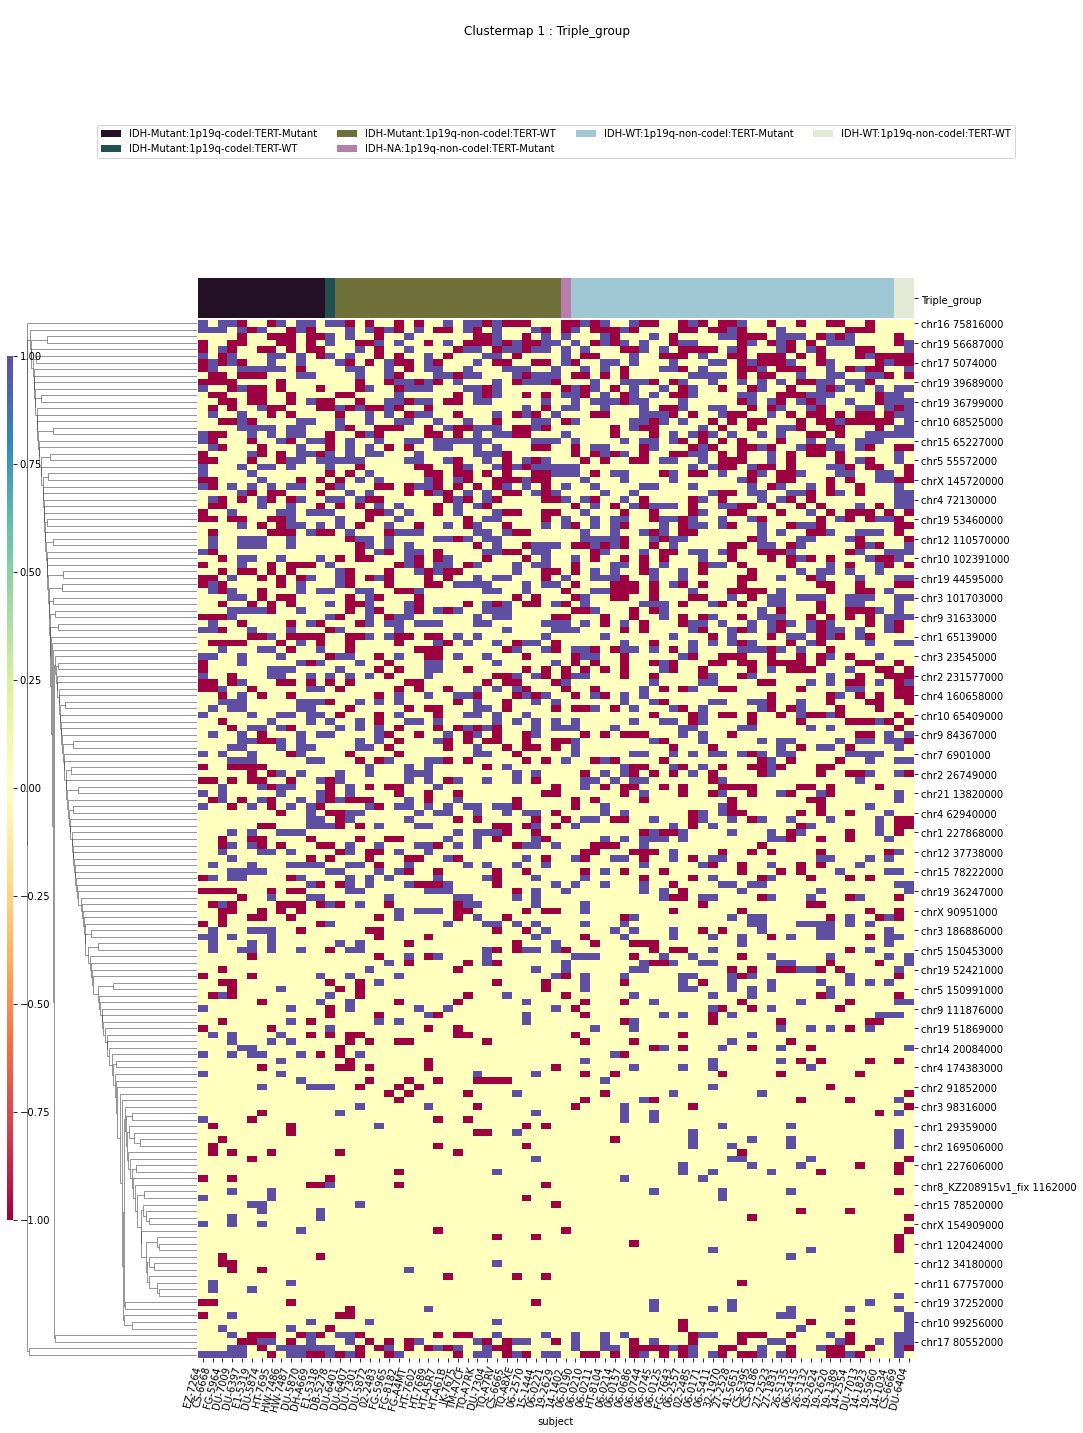

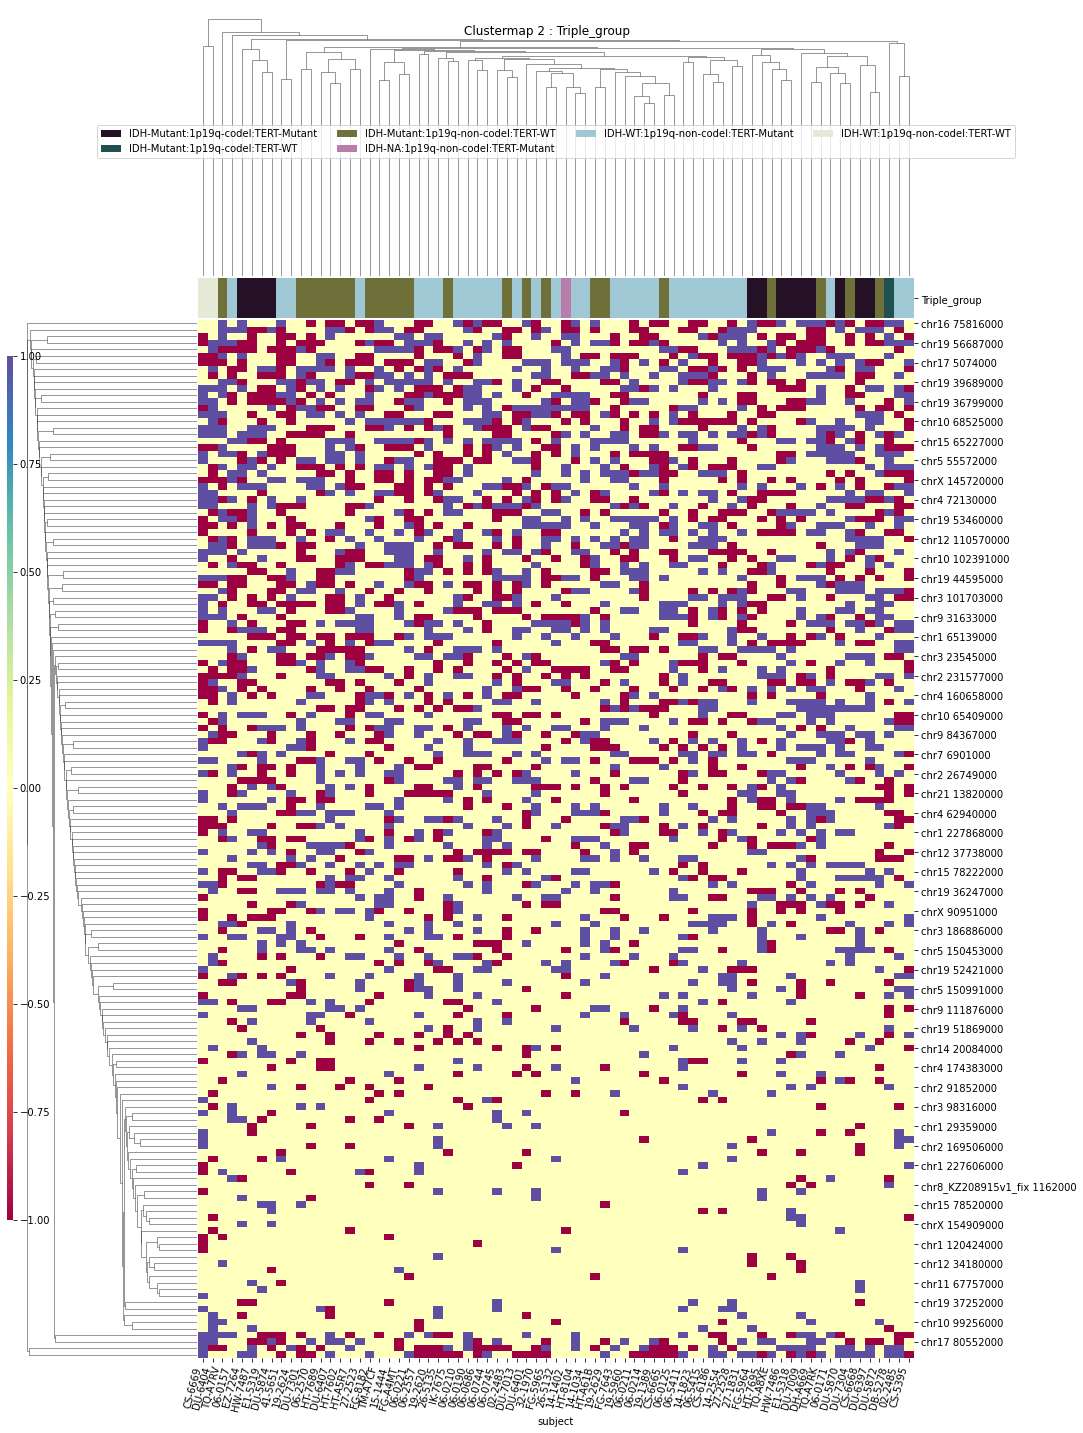

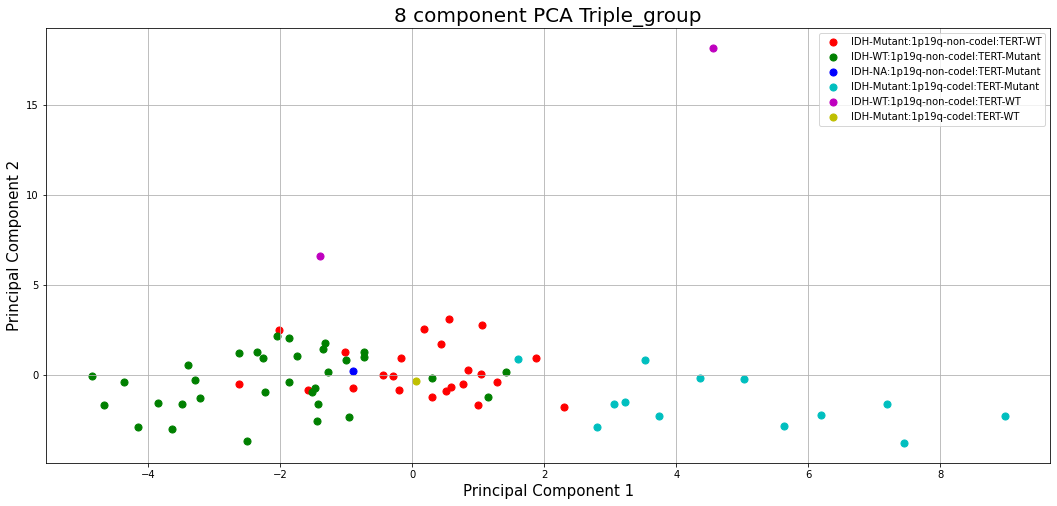

MGMT
T-Testing
Boxplotting
Clustermapping
['MGMT' 'chr1 13353000' 'chr1 147733000' 'chr1 152455000' 'chr1 227869000'
 'chr10 26894000' 'chr10 65409000' 'chr10 6833000' 'chr10 68526000'
 'chr10 97418000' 'chr11 18900000' 'chr11 55431000' 'chr11 62195000'
 'chr11 63528000' 'chr12 118106000' 'chr12 123581000' 'chr12 32100000'
 'chr12 55334000' 'chr16 24108000' 'chr17 68604000' 'chr17 7159000'
 'chr18 4918000' 'chr19 23078000' 'chr19 28130000' 'chr19 36799000'
 'chr19 44595000' 'chr19 44640000' 'chr19 56687000' 'chr2 232422000'
 'chr2 26749000' 'chr2 32275000' 'chr22 11550000' 'chr22 24211000'
 'chr3 100666000' 'chr3 195928000' 'chr3 23544000' 'chr3 47260000'
 'chr4 179553000' 'chr5 18579000' 'chr5 43580000' 'chr6 26000000'
 'chr6 93173000' 'chr7 16197000' 'chr7 27742000' 'chr8 112772000'
 'chr9 110826000' 'chr9 134093000' 'chr9 63682000' 'chrX 135303000'
 'subject']


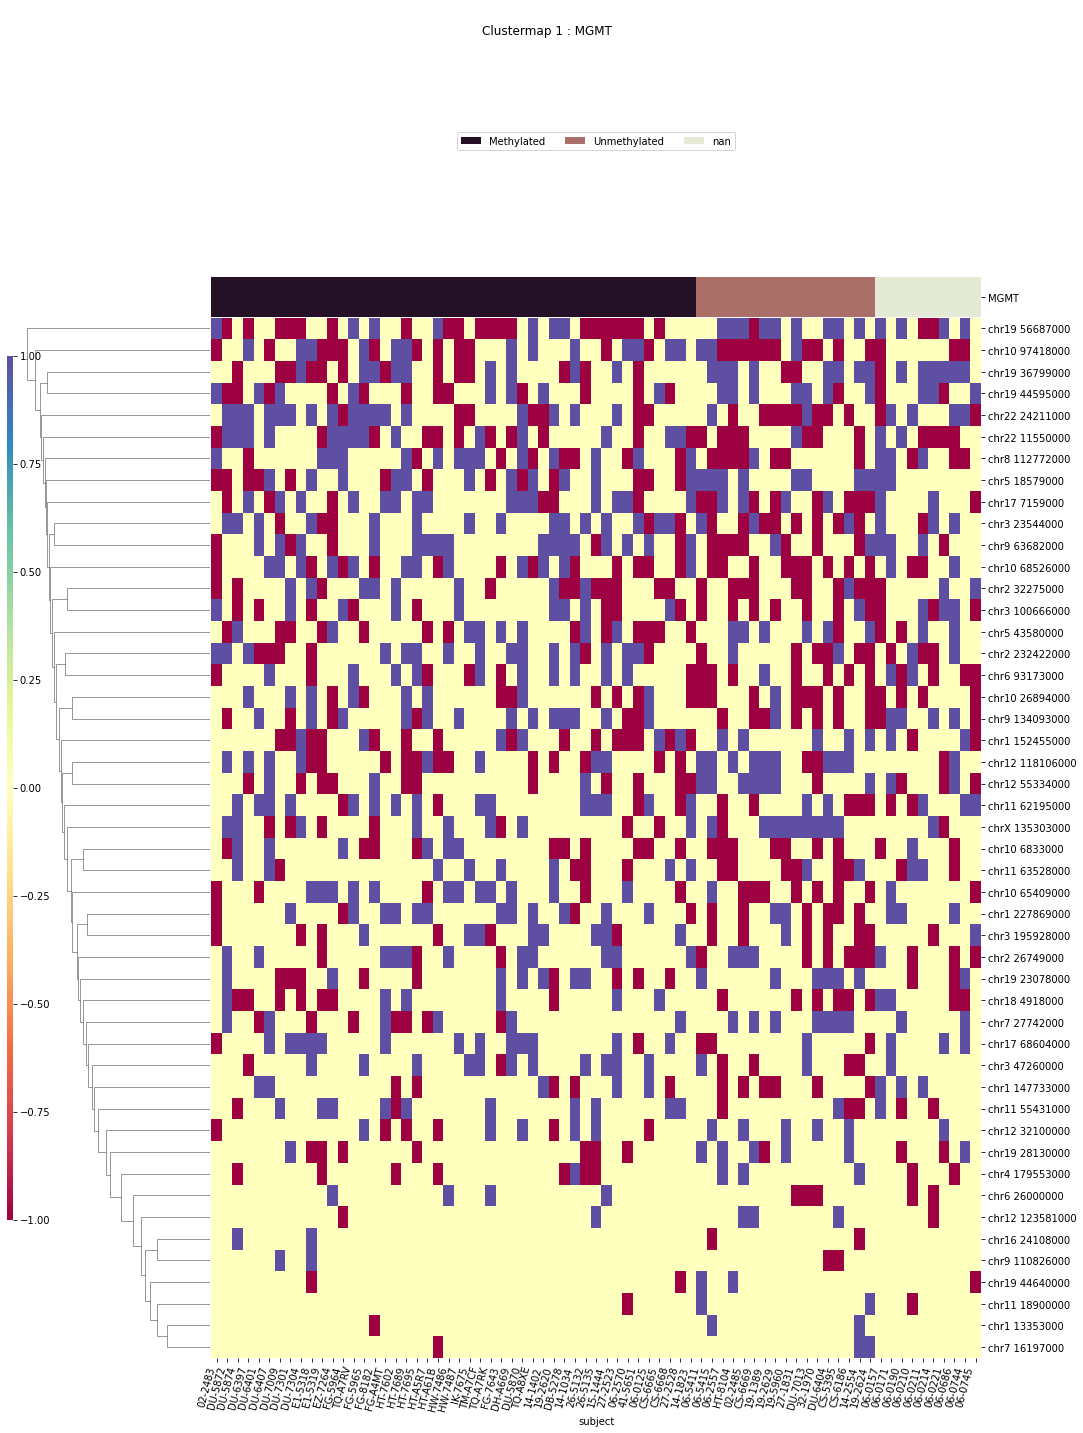

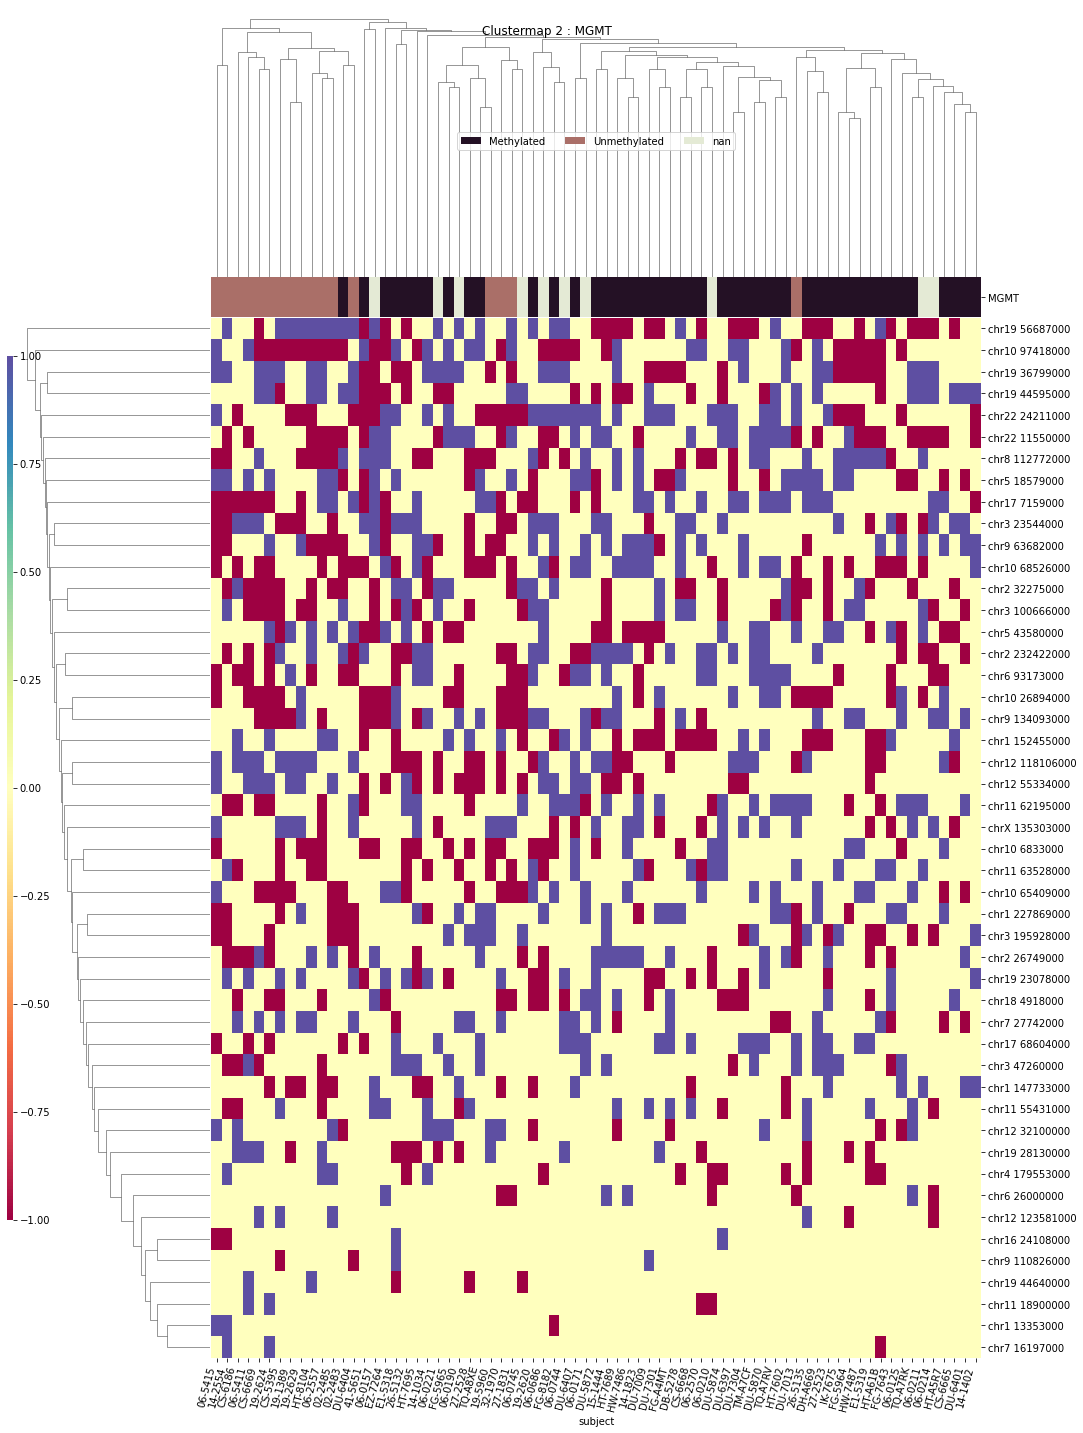

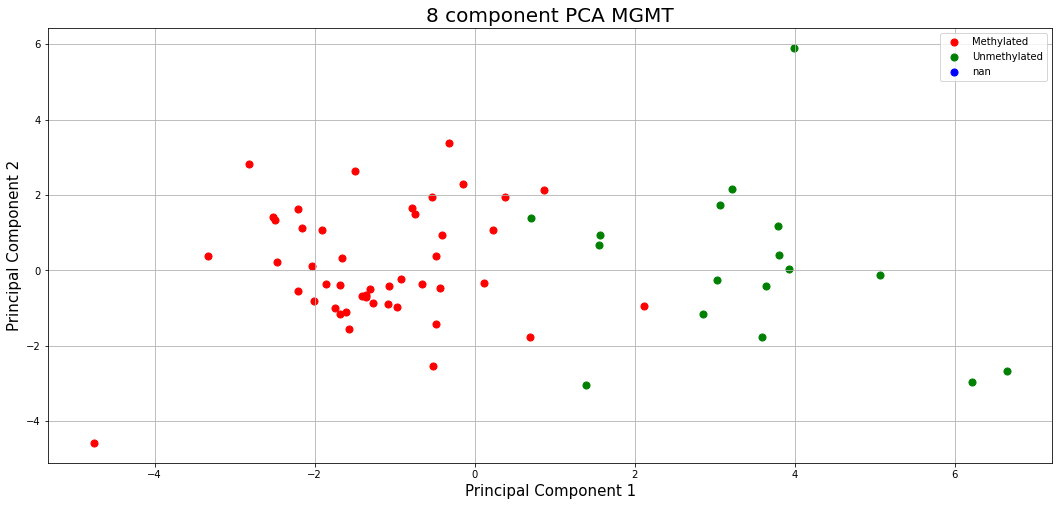

gender1
T-Testing
Boxplotting
Clustermapping
['chr1 1580000' 'chr1 227868000' 'chr1 46320000' 'chr11 18900000'
 'chr11 55431000' 'chr11 59137000' 'chr12 10572000' 'chr12 107827000'
 'chr12 21644000' 'chr13 19600000' 'chr16 47864000' 'chr17 30701000'
 'chr17 68603000' 'chr18 4918000' 'chr18 67076000' 'chr19 23723000'
 'chr19 28131000' 'chr19 48890000' 'chr19 51869000' 'chr2 207037000'
 'chr3 110368000' 'chr3 196945000' 'chr4 174383000' 'chr4 22597000'
 'chr4 48286000' 'chr5 150454000' 'chr5 35177000' 'chr6 93174000'
 'chr7 113342000' 'chr7 125222000' 'chr8 119917000' 'chrX 154909000'
 'chrX 72733000' 'gender1' 'subject']


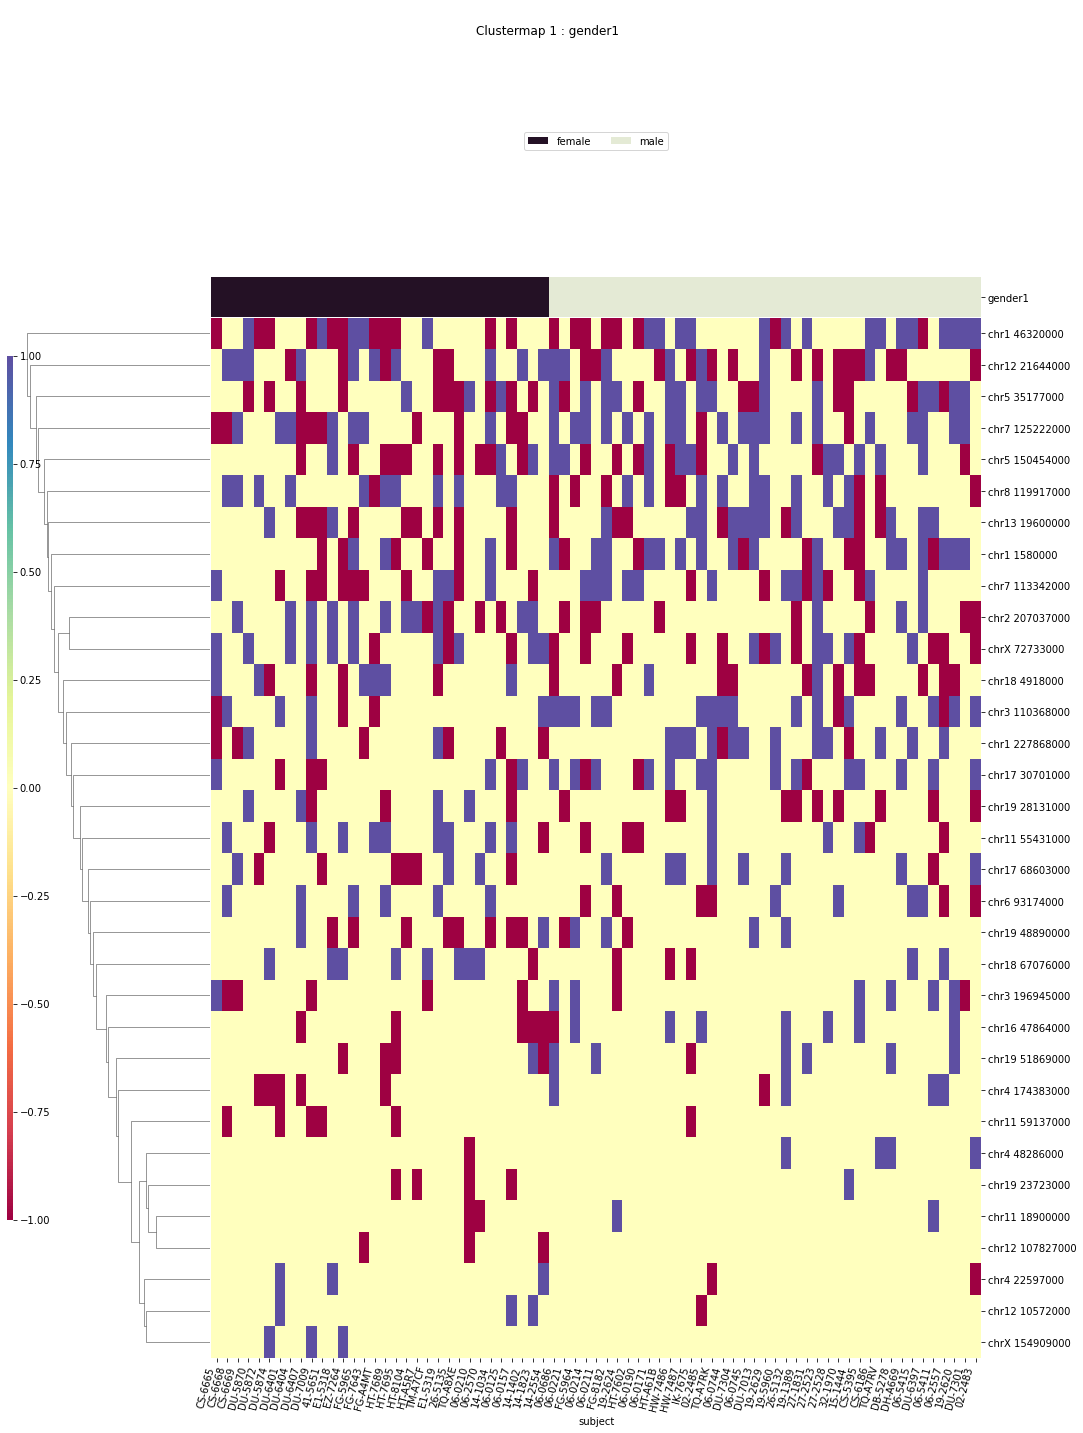

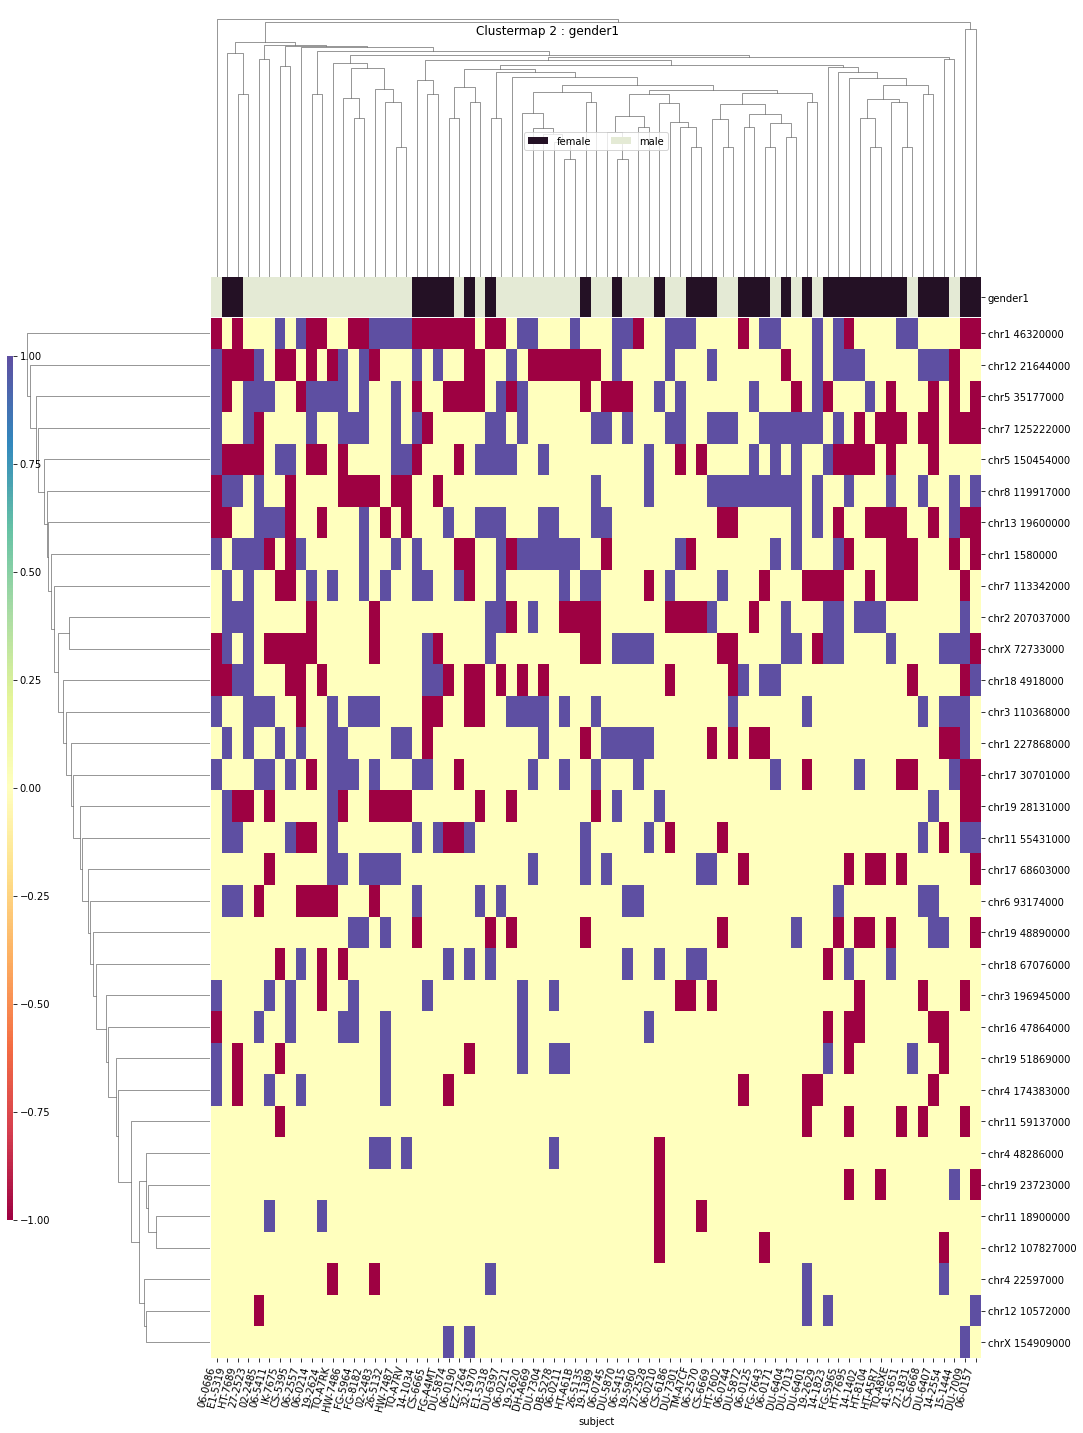

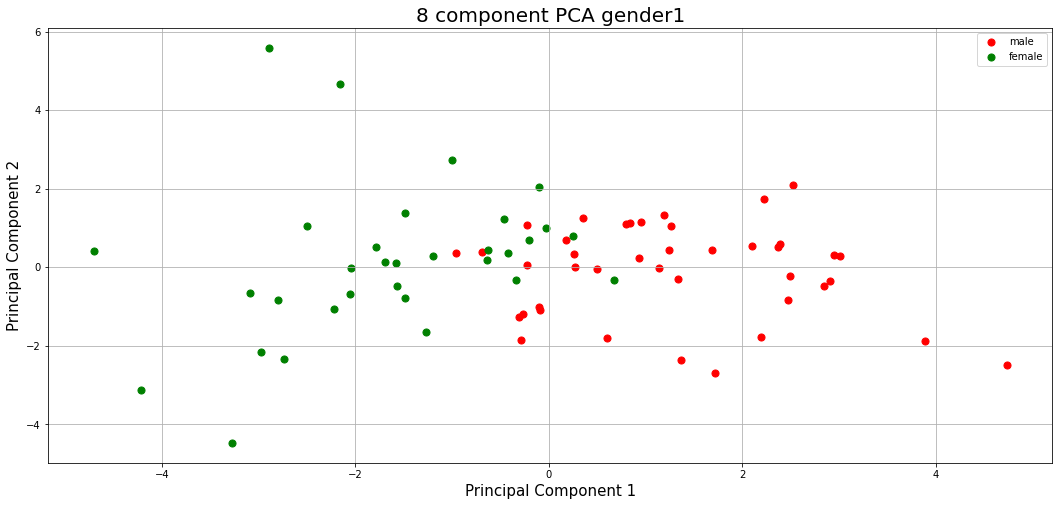

In [111]:
for column in 'primary_diagnosis','IDH','x1p19q','TERT','disease_type','IDH_1p19q_status','WHO_groups','Triple_group','MGMT','gender1':
    print(column)
    ttests_boxplots_and_heatmaps(compdf,
        compdf.columns[compdf.columns.str.contains("^chr")],column,box_p=1e-5,heat_p=0.05)

In [112]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

'20210621 12:47:46'

primary_diagnosis
T-Testing
Boxplotting
Clustermapping
['chr1 104135000' 'chr1 10425000' 'chr1 10427000' 'chr1 105473000'
 'chr1 109767000' 'chr1 111259000' 'chr1 111800000' 'chr1 114058000'
 'chr1 114059000' 'chr1 12784000' 'chr1 13353000' 'chr1 1409000'
 'chr1 1410000' 'chr1 144451000' 'chr1 145415000' 'chr1 145932000'
 'chr1 146948000' 'chr1 147106000' 'chr1 147240000' 'chr1 147734000'
 'chr1 150632000' 'chr1 15135000' 'chr1 15136000' 'chr1 151873000'
 'chr1 152455000' 'chr1 15379000' 'chr1 155600000' 'chr1 155626000'
 'chr1 155635000' 'chr1 156179000' 'chr1 156181000' 'chr1 156182000'
 'chr1 1580000' 'chr1 159767000' 'chr1 159768000' 'chr1 160690000'
 'chr1 160913000' 'chr1 160914000' 'chr1 160946000' 'chr1 160947000'
 'chr1 160949000' 'chr1 161016000' 'chr1 161017000' 'chr1 161315000'
 'chr1 161411000' 'chr1 161413000' 'chr1 165092000' 'chr1 165093000'
 'chr1 166605000' 'chr1 197406000' 'chr1 198129000' 'chr1 209141000'
 'chr1 209142000' 'chr1 211222000' 'chr1 213150000' 'chr1 224

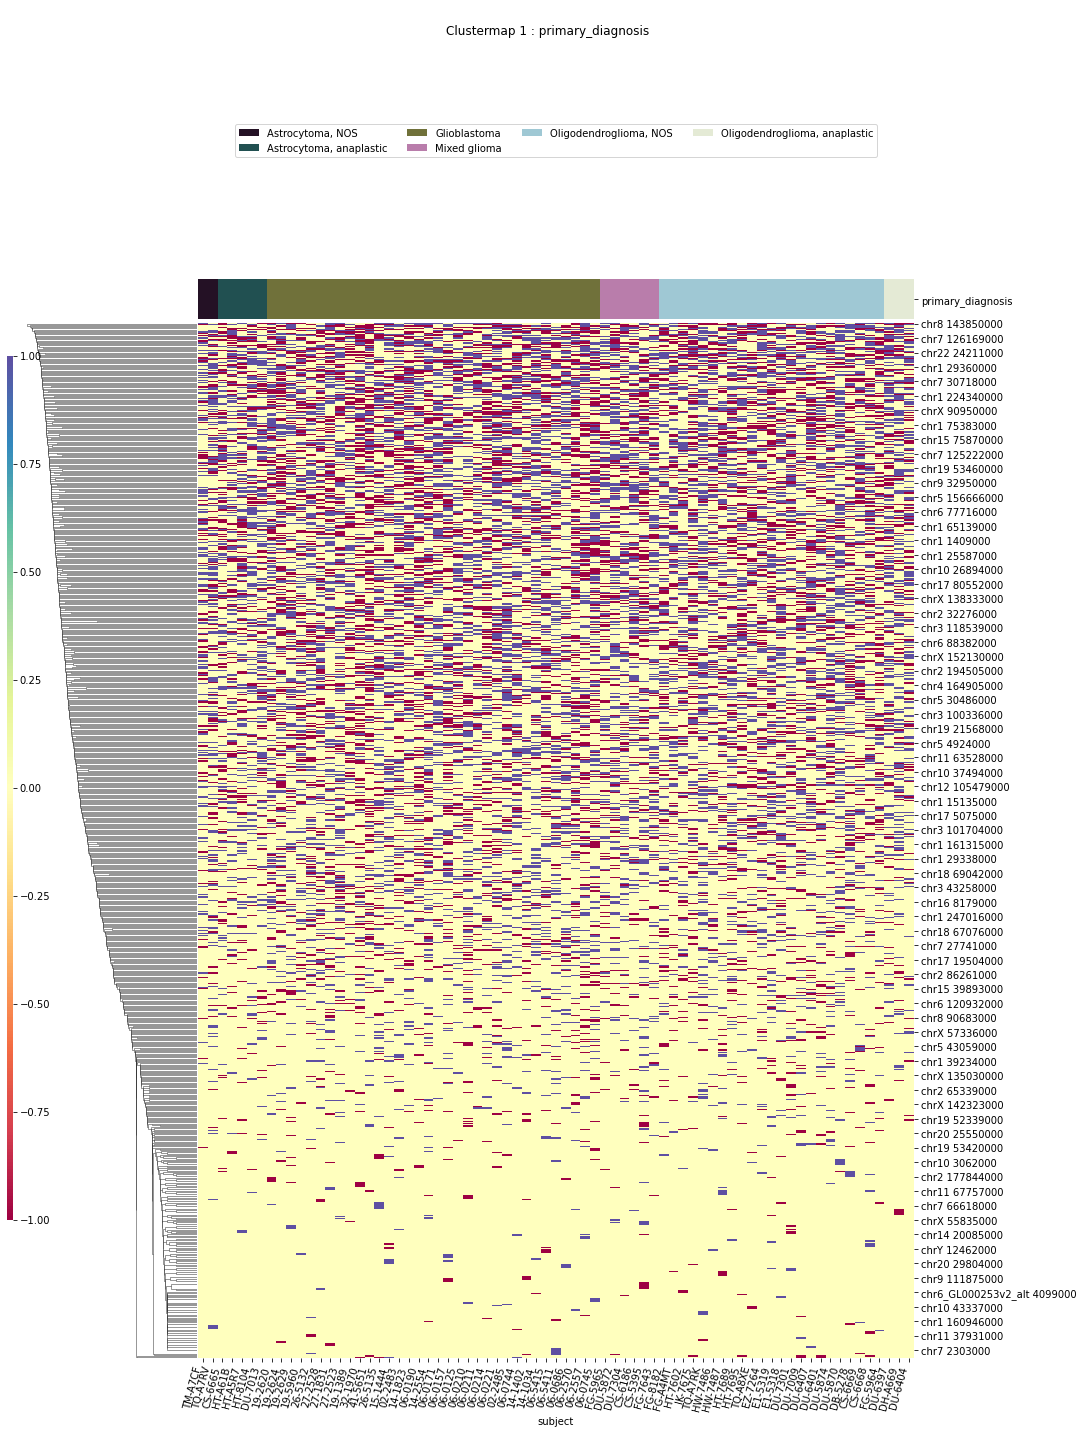

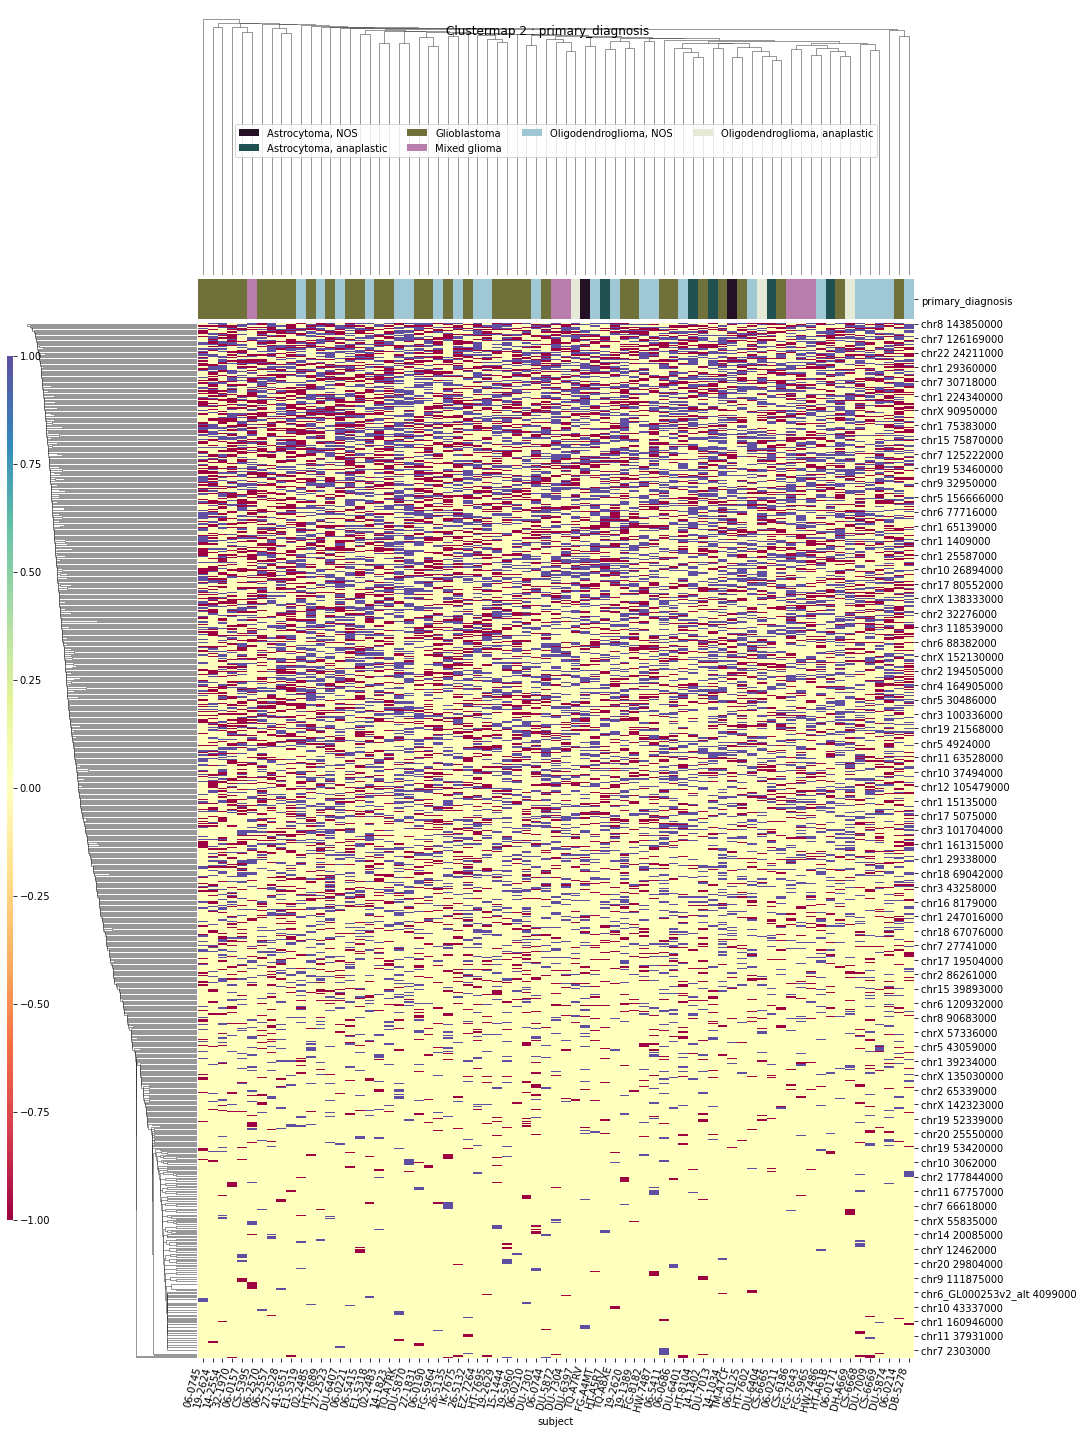

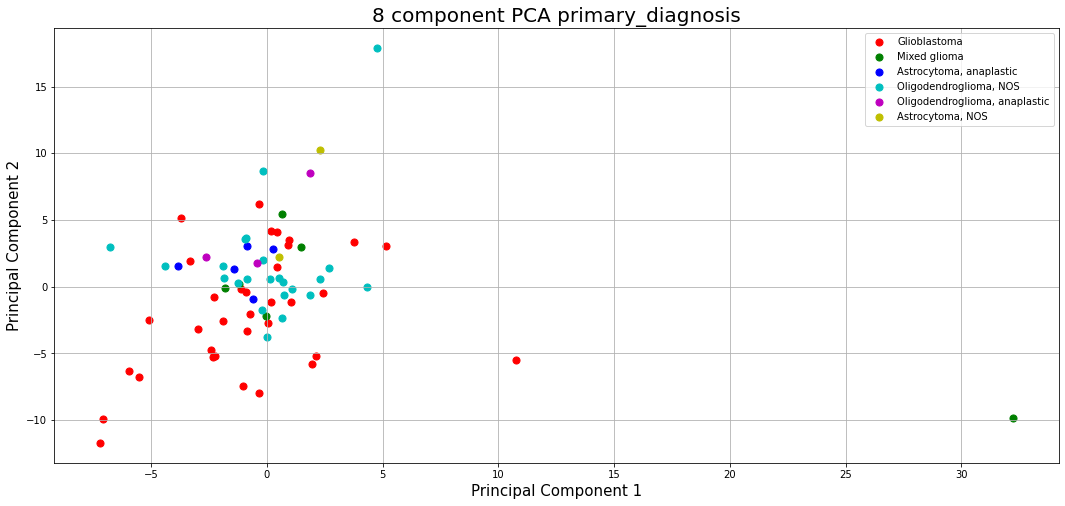

IDH
T-Testing
Boxplotting
Clustermapping
['IDH' 'chr1 111800000' 'chr1 114058000' 'chr1 120424000' 'chr1 12784000'
 'chr1 13353000' 'chr1 1409000' 'chr1 1410000' 'chr1 144451000'
 'chr1 145415000' 'chr1 145932000' 'chr1 146948000' 'chr1 147106000'
 'chr1 147734000' 'chr1 150632000' 'chr1 15136000' 'chr1 151873000'
 'chr1 152455000' 'chr1 155626000' 'chr1 155635000' 'chr1 156181000'
 'chr1 159768000' 'chr1 160946000' 'chr1 160949000' 'chr1 161017000'
 'chr1 161315000' 'chr1 161411000' 'chr1 161413000' 'chr1 165092000'
 'chr1 166605000' 'chr1 197406000' 'chr1 211222000' 'chr1 213150000'
 'chr1 224339000' 'chr1 224340000' 'chr1 227607000' 'chr1 227868000'
 'chr1 227869000' 'chr1 236428000' 'chr1 247582000' 'chr1 27854000'
 'chr1 29338000' 'chr1 29359000' 'chr1 29360000' 'chr1 39234000'
 'chr1 45528000' 'chr1 46788000' 'chr1 65139000' 'chr1 66592000'
 'chr1 73129000' 'chr1 73130000' 'chr1 75383000' 'chr1 77983000'
 'chr1 93277000' 'chr10 102391000' 'chr10 102392000' 'chr10 102455000'
 'chr

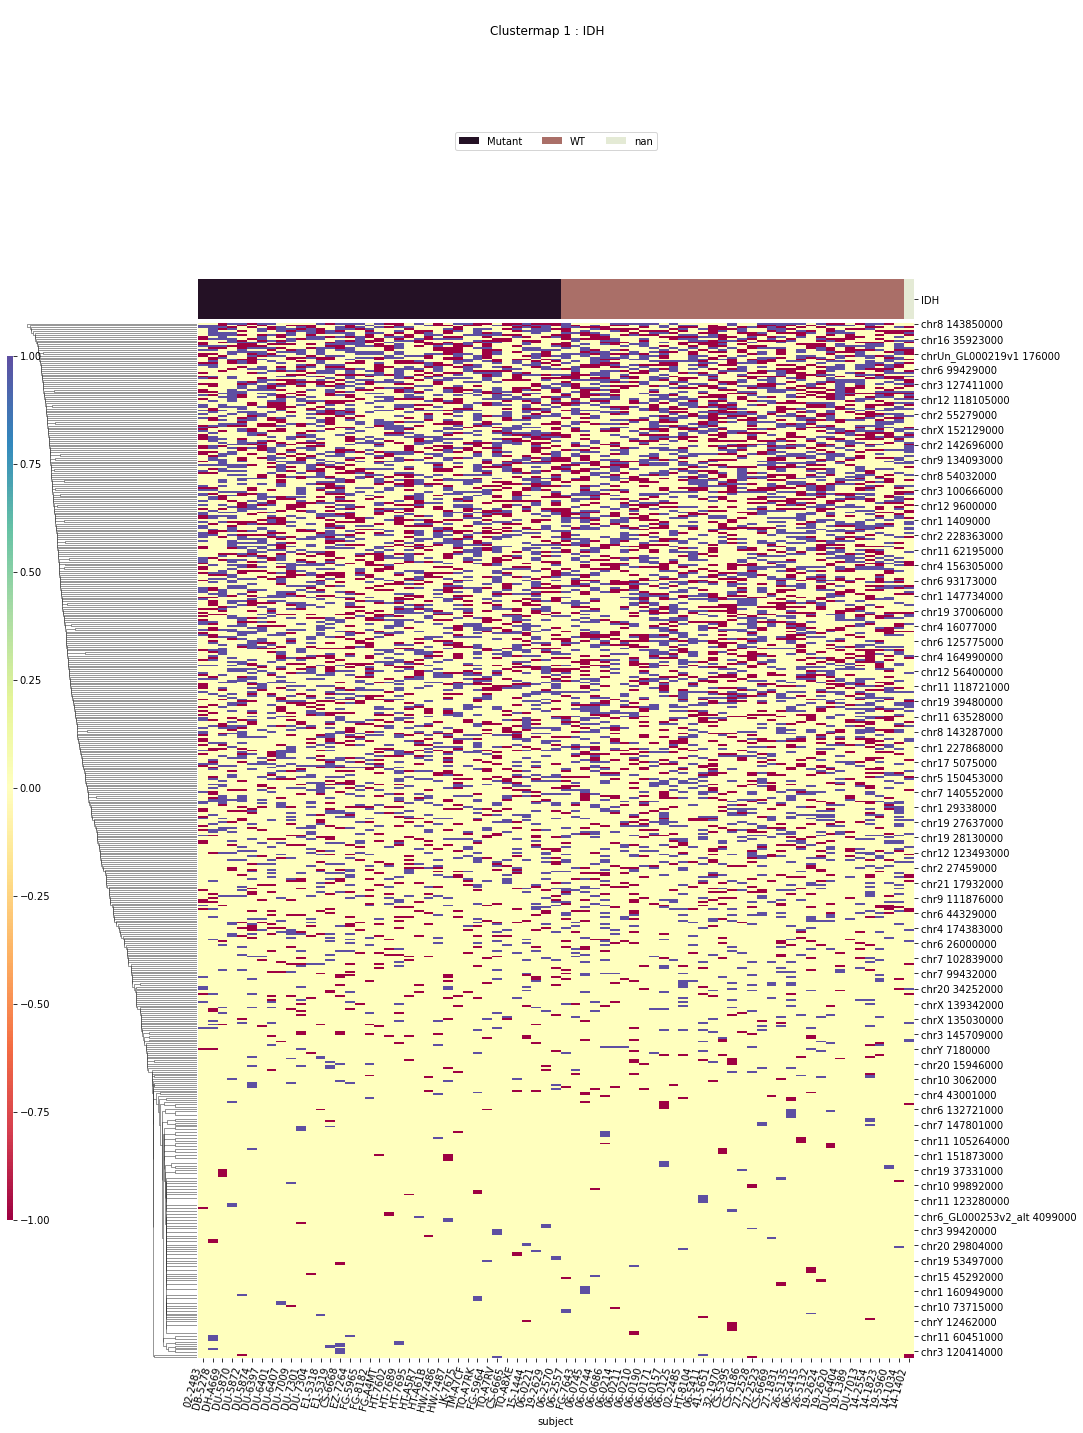

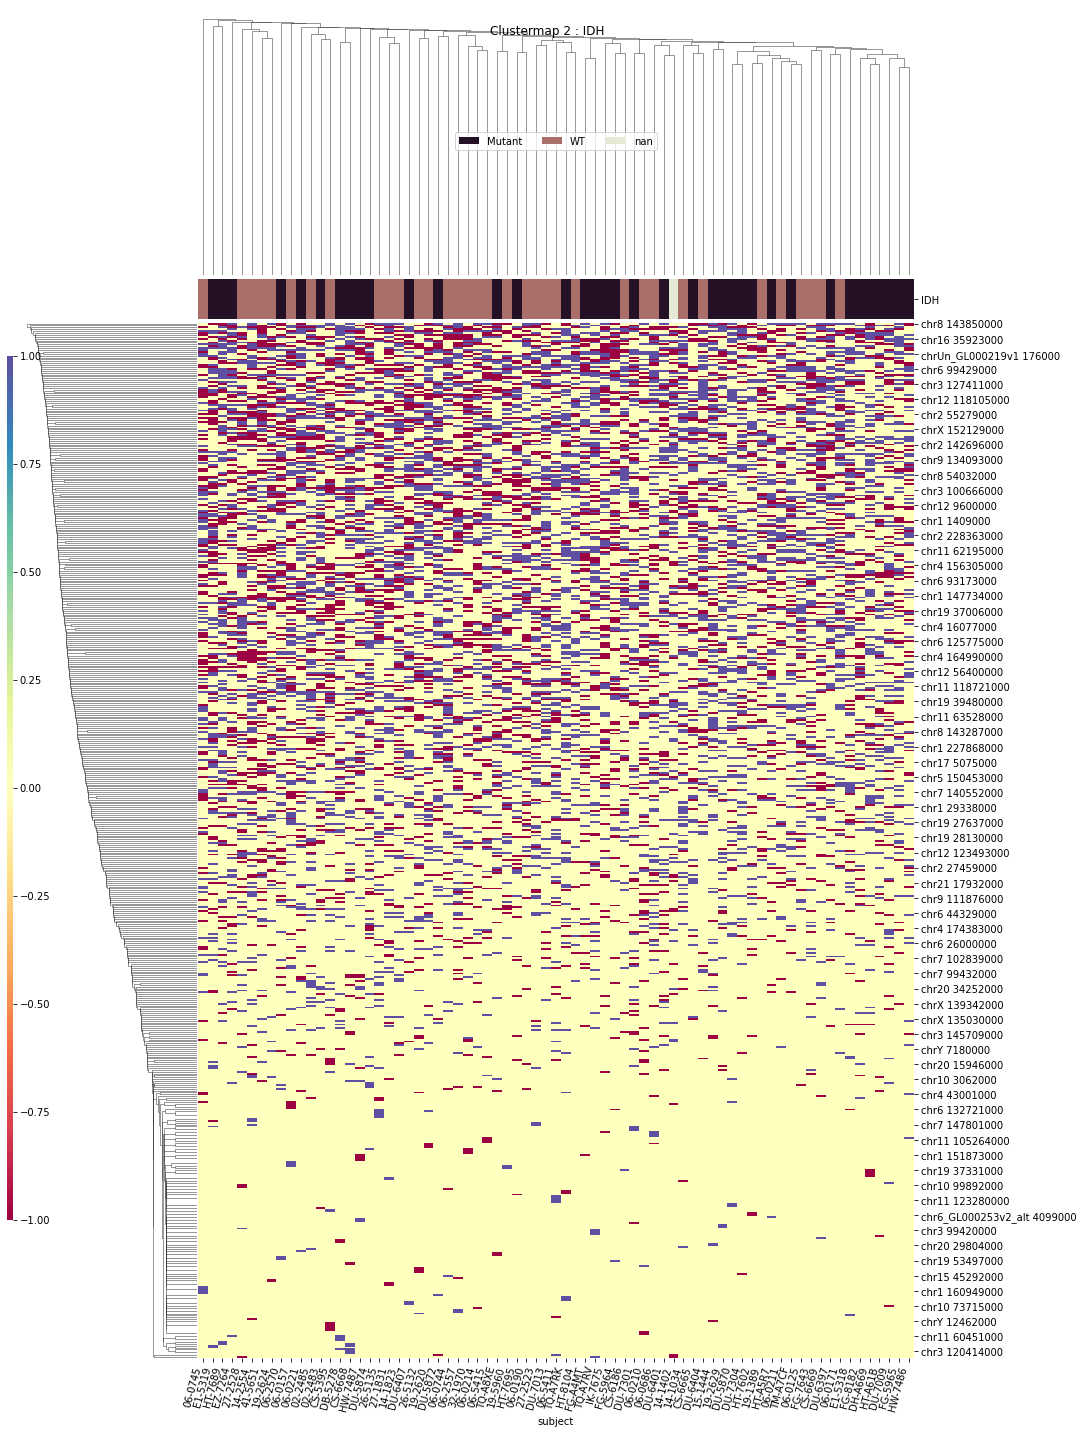

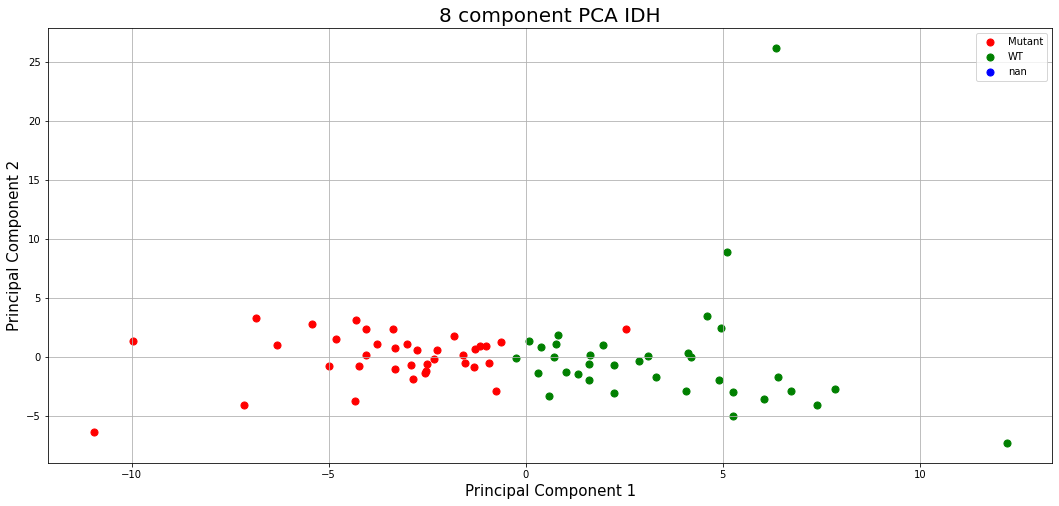

x1p19q
T-Testing
Boxplotting
Clustermapping
['chr1 104135000' 'chr1 10427000' 'chr1 111259000' 'chr1 114058000'
 'chr1 114059000' 'chr1 120424000' 'chr1 1409000' 'chr1 1410000'
 'chr1 145932000' 'chr1 146948000' 'chr1 147106000' 'chr1 147240000'
 'chr1 147733000' 'chr1 147734000' 'chr1 149093000' 'chr1 150632000'
 'chr1 15136000' 'chr1 151873000' 'chr1 152455000' 'chr1 152456000'
 'chr1 15379000' 'chr1 155626000' 'chr1 155635000' 'chr1 156179000'
 'chr1 156181000' 'chr1 156182000' 'chr1 160947000' 'chr1 161016000'
 'chr1 161017000' 'chr1 161315000' 'chr1 166605000' 'chr1 198129000'
 'chr1 209142000' 'chr1 213150000' 'chr1 224340000' 'chr1 227607000'
 'chr1 227868000' 'chr1 236428000' 'chr1 247015000' 'chr1 247016000'
 'chr1 247582000' 'chr1 25587000' 'chr1 27854000' 'chr1 29338000'
 'chr1 29339000' 'chr1 29359000' 'chr1 29360000' 'chr1 33068000'
 'chr1 39234000' 'chr1 40572000' 'chr1 45513000' 'chr1 45528000'
 'chr1 46320000' 'chr1 46788000' 'chr1 52006000' 'chr1 52007000'
 'chr1 54637

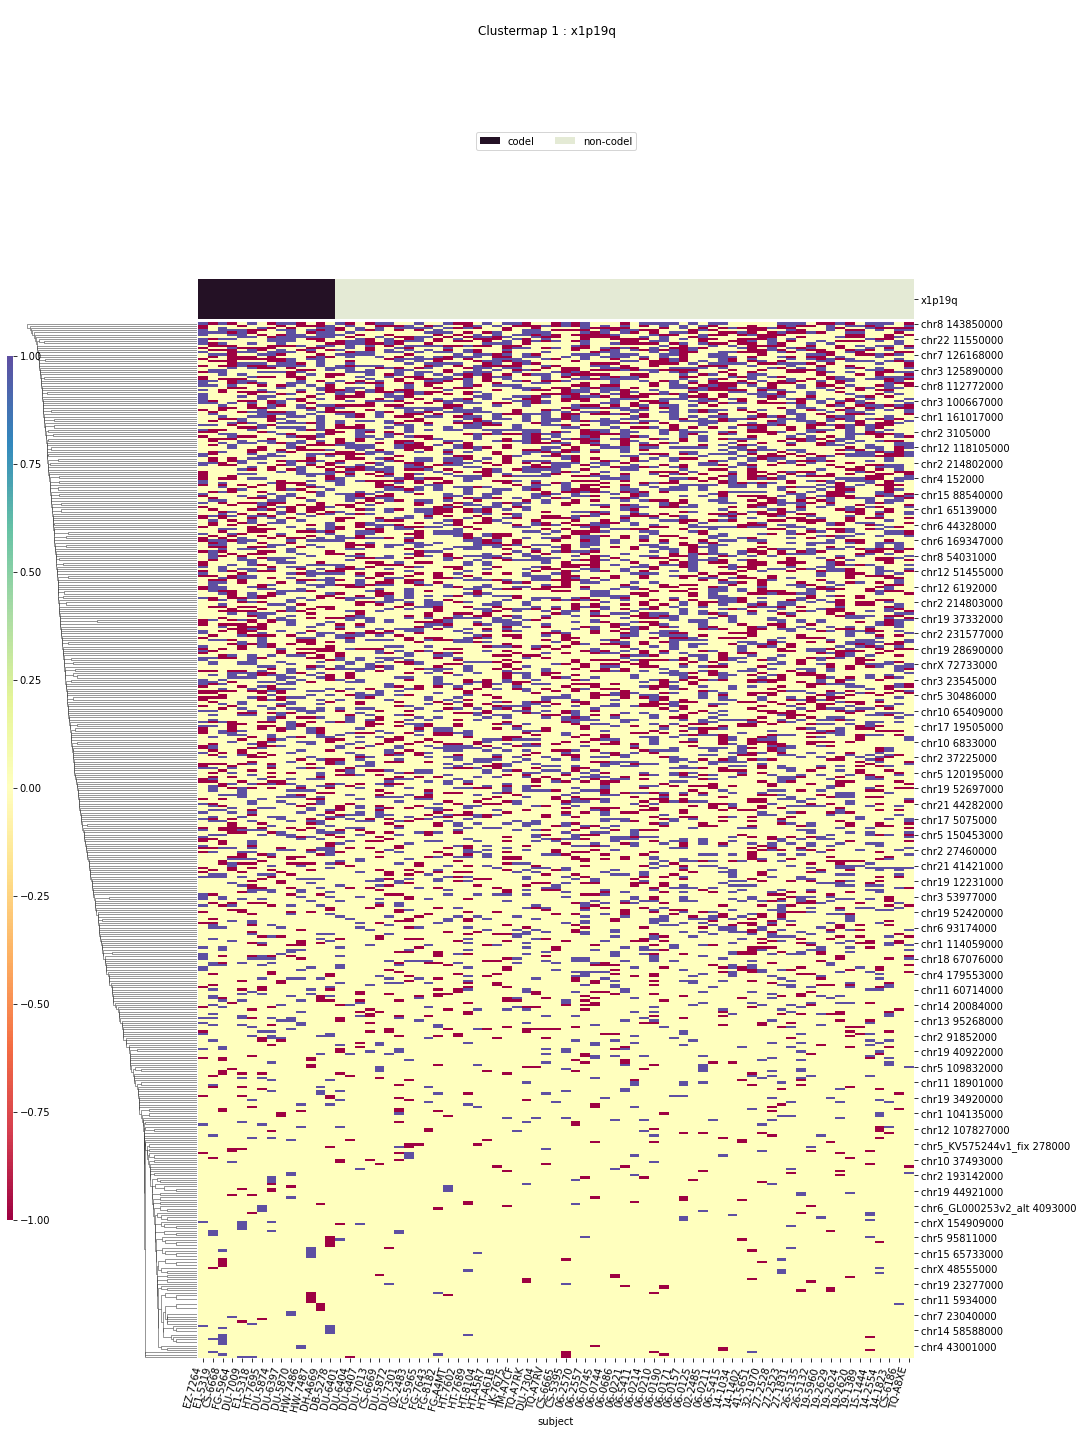

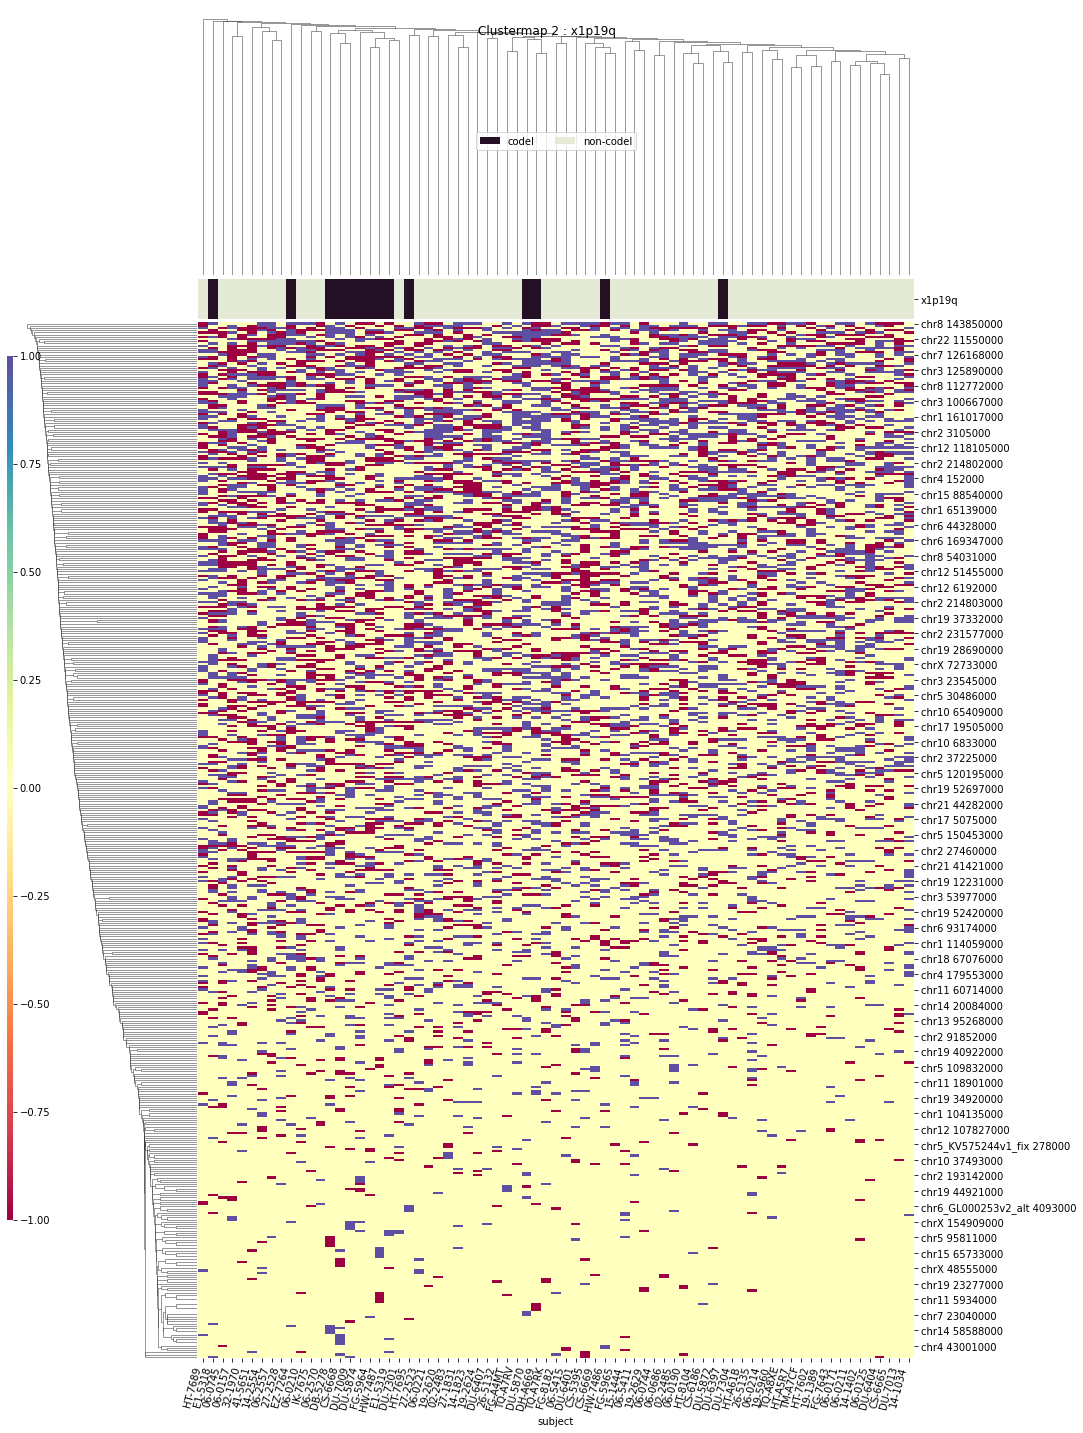

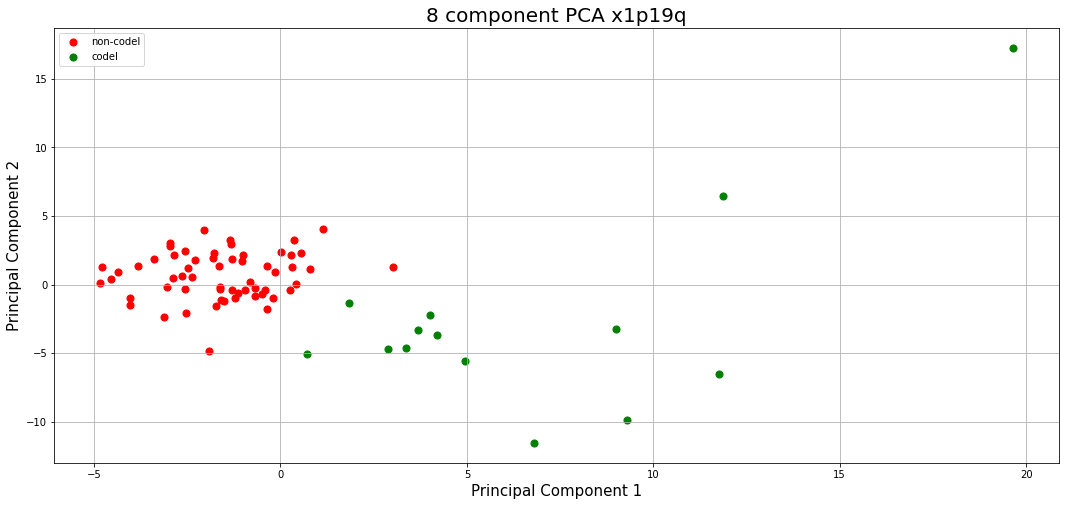

TERT
T-Testing
Boxplotting
Clustermapping
['TERT' 'chr1 104135000' 'chr1 109767000' 'chr1 111259000'
 'chr1 111800000' 'chr1 114058000' 'chr1 114059000' 'chr1 12784000'
 'chr1 13353000' 'chr1 1409000' 'chr1 1410000' 'chr1 144451000'
 'chr1 145415000' 'chr1 145932000' 'chr1 146948000' 'chr1 147734000'
 'chr1 149093000' 'chr1 155635000' 'chr1 156179000' 'chr1 159767000'
 'chr1 159768000' 'chr1 160946000' 'chr1 160947000' 'chr1 160949000'
 'chr1 161017000' 'chr1 161411000' 'chr1 161413000' 'chr1 165092000'
 'chr1 197406000' 'chr1 198129000' 'chr1 209142000' 'chr1 211222000'
 'chr1 224340000' 'chr1 227606000' 'chr1 227869000' 'chr1 236428000'
 'chr1 247016000' 'chr1 247582000' 'chr1 27854000' 'chr1 29339000'
 'chr1 40572000' 'chr1 46320000' 'chr1 46395000' 'chr1 46788000'
 'chr1 52006000' 'chr1 52007000' 'chr1 54637000' 'chr1 66592000'
 'chr1 73129000' 'chr1 73130000' 'chr1 77983000' 'chr1 89066000'
 'chr1 89067000' 'chr1 9002000' 'chr1 93276000' 'chr1 93277000'
 'chr10 102455000' 'chr10 1

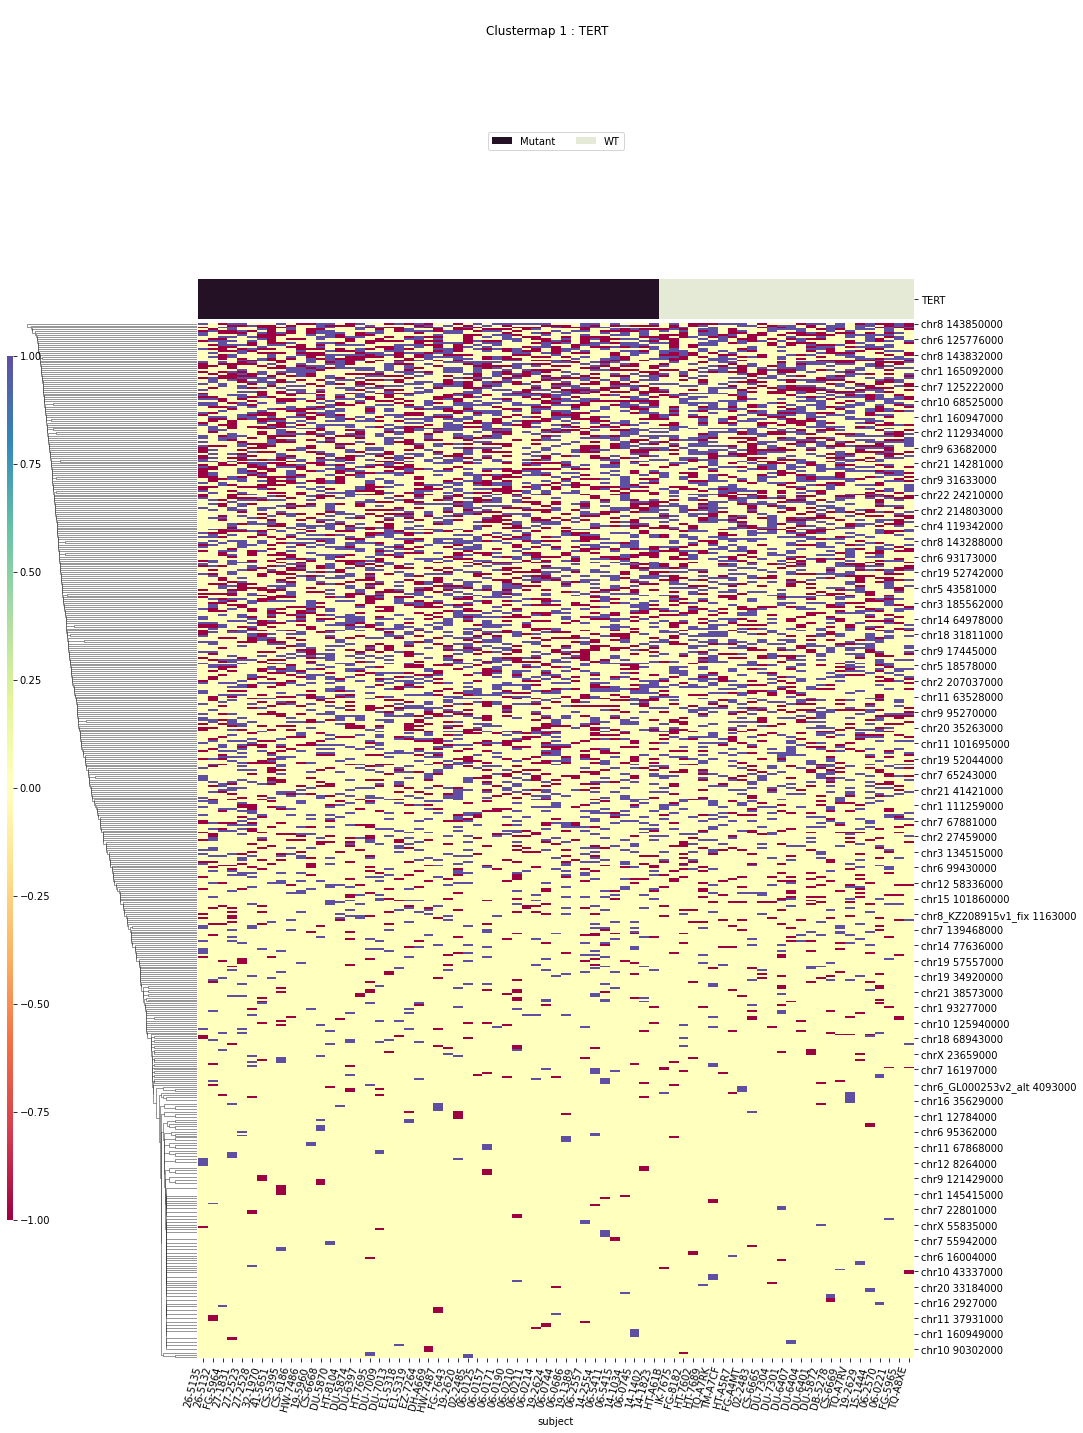

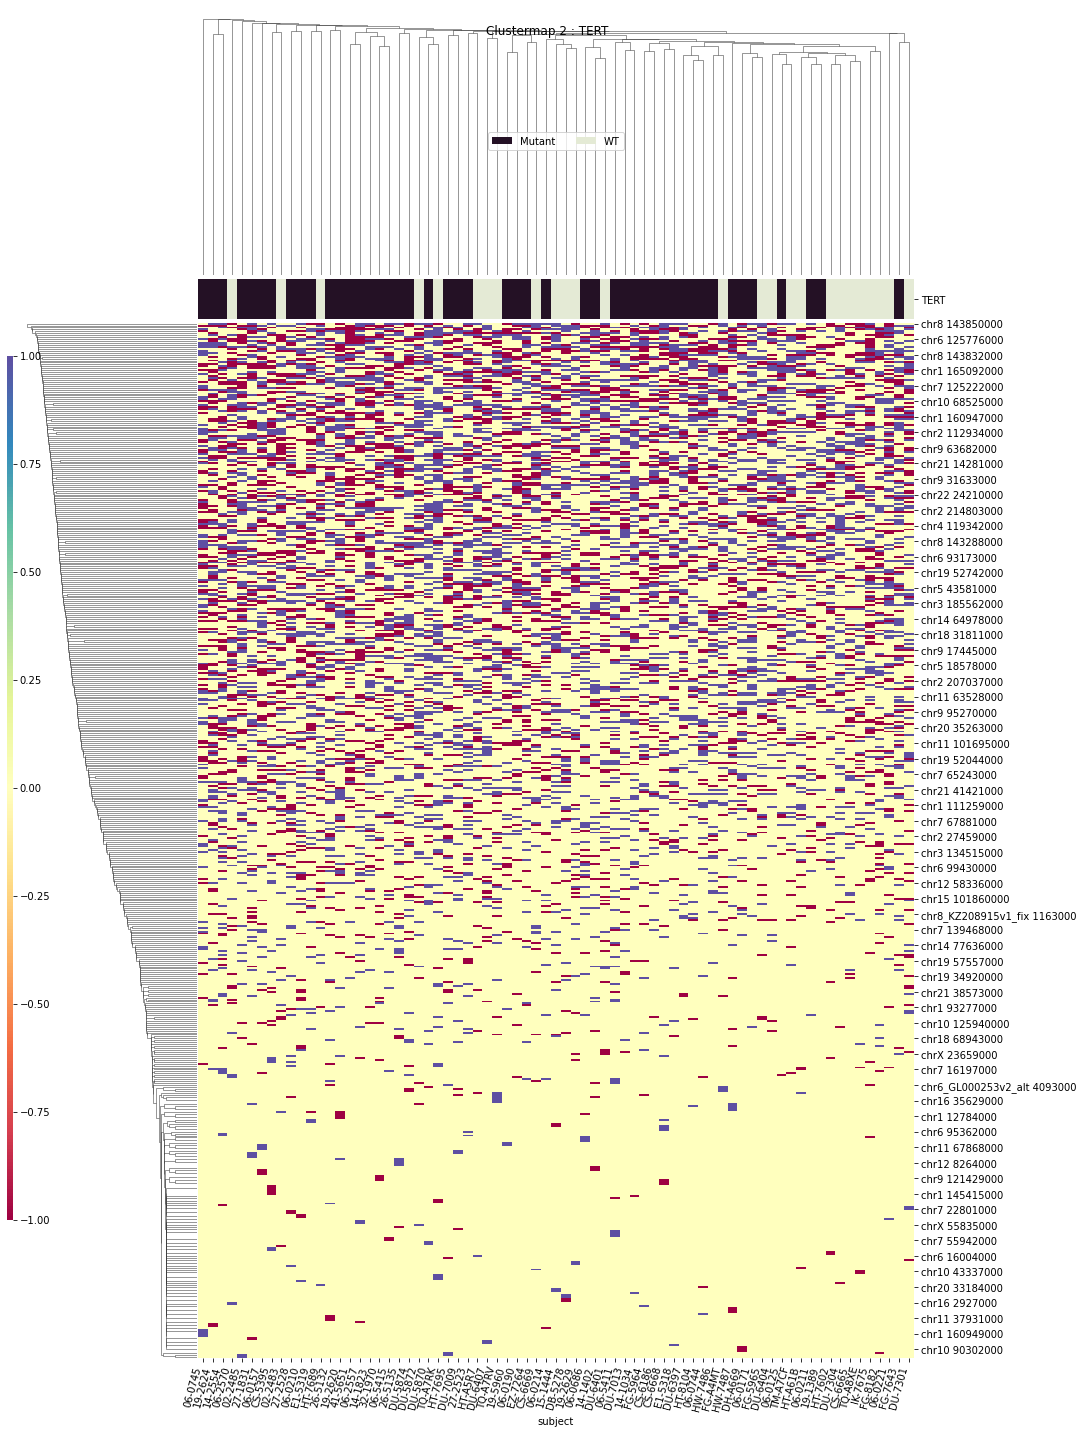

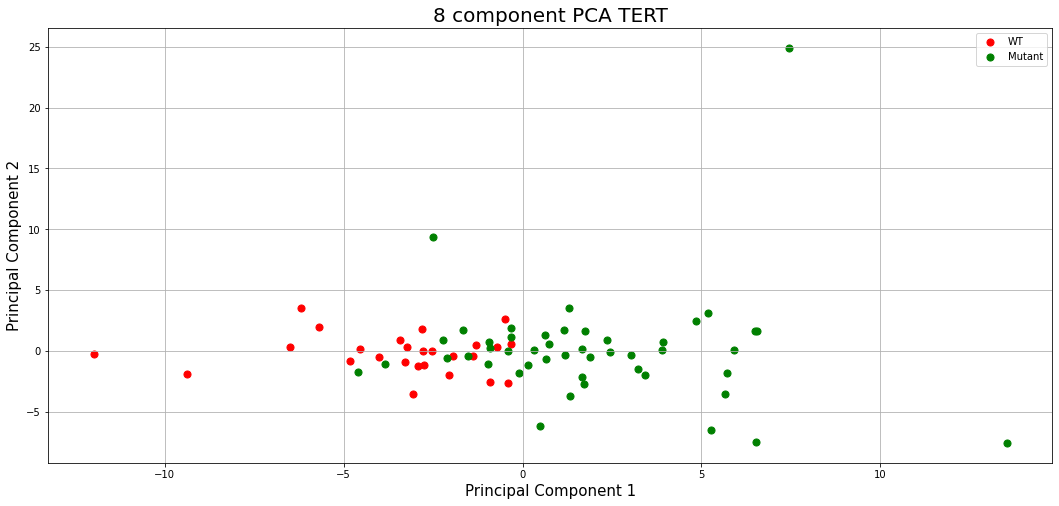

disease_type
T-Testing
Boxplotting
Clustermapping
['chr1 10427000' 'chr1 105473000' 'chr1 109767000' 'chr1 111259000'
 'chr1 111800000' 'chr1 114058000' 'chr1 12784000' 'chr1 13353000'
 'chr1 1409000' 'chr1 1410000' 'chr1 144451000' 'chr1 145415000'
 'chr1 145932000' 'chr1 146948000' 'chr1 147106000' 'chr1 147734000'
 'chr1 150632000' 'chr1 15135000' 'chr1 151873000' 'chr1 155600000'
 'chr1 155635000' 'chr1 156181000' 'chr1 156182000' 'chr1 1580000'
 'chr1 159768000' 'chr1 160914000' 'chr1 160946000' 'chr1 160949000'
 'chr1 161016000' 'chr1 161315000' 'chr1 161411000' 'chr1 161413000'
 'chr1 166605000' 'chr1 197406000' 'chr1 209141000' 'chr1 209142000'
 'chr1 211222000' 'chr1 213150000' 'chr1 224339000' 'chr1 224340000'
 'chr1 227606000' 'chr1 227607000' 'chr1 227868000' 'chr1 227869000'
 'chr1 236428000' 'chr1 247016000' 'chr1 247582000' 'chr1 27854000'
 'chr1 29338000' 'chr1 29359000' 'chr1 39234000' 'chr1 45513000'
 'chr1 45528000' 'chr1 46395000' 'chr1 46788000' 'chr1 52007000'
 'c

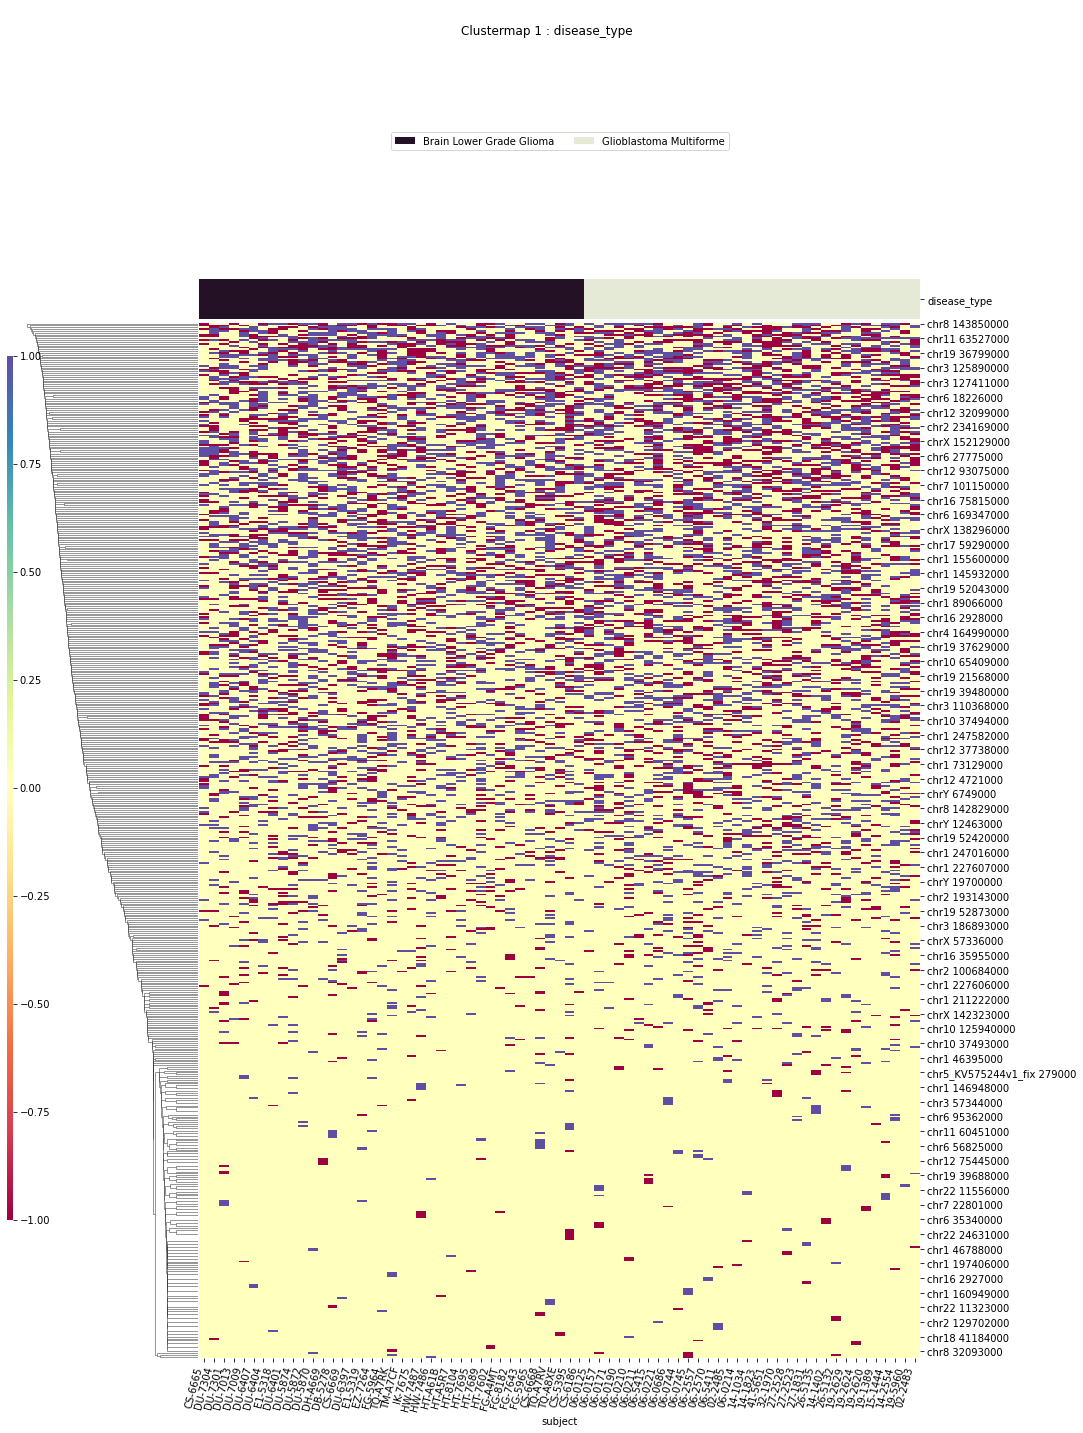

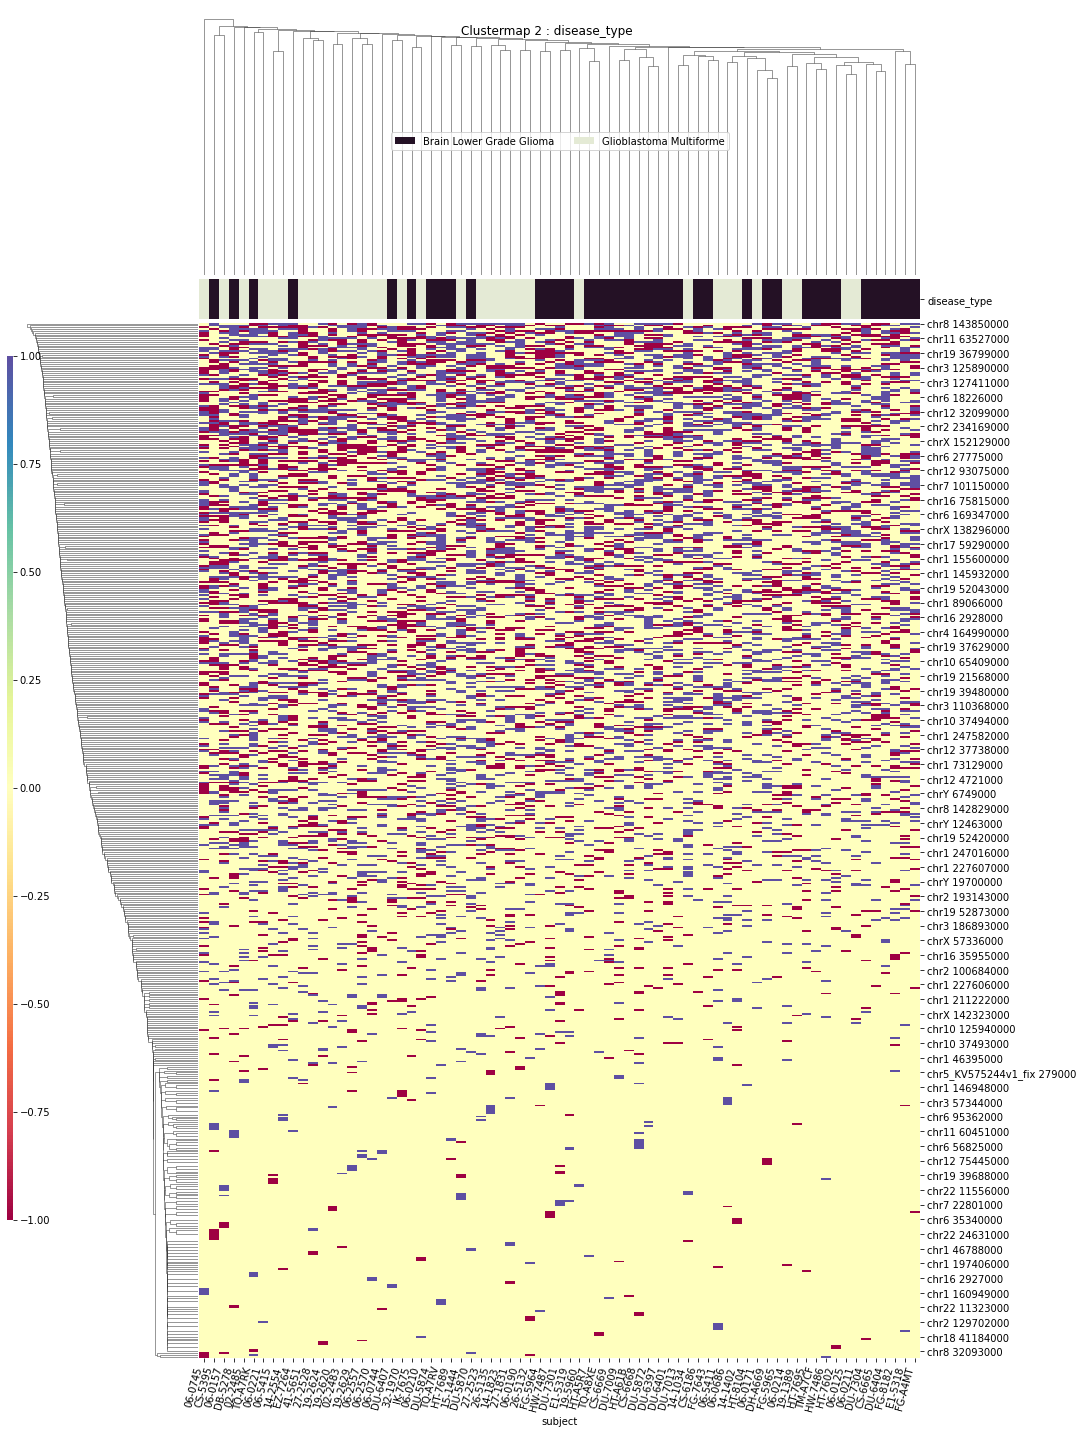

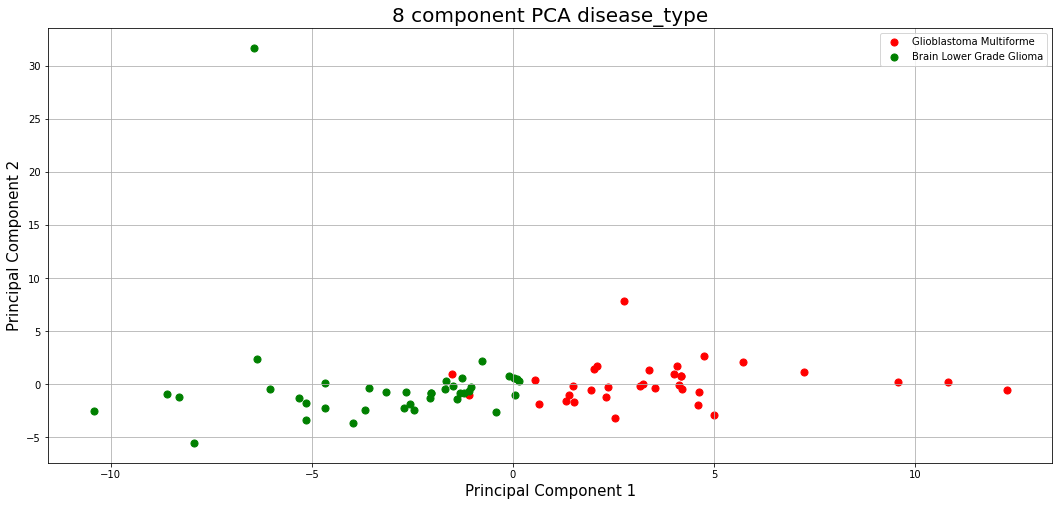

IDH_1p19q_status
T-Testing


/Users/jake/Library/Python/3.8/lib/python/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/jake/Library/Python/3.8/lib/python/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Boxplotting
Clustermapping
['IDH_1p19q_status' 'chr1 104135000' 'chr1 10427000' 'chr1 109767000'
 'chr1 111259000' 'chr1 111800000' 'chr1 114058000' 'chr1 114059000'
 'chr1 11891000' 'chr1 120424000' 'chr1 12784000' 'chr1 13353000'
 'chr1 1409000' 'chr1 1410000' 'chr1 144451000' 'chr1 145415000'
 'chr1 145932000' 'chr1 146948000' 'chr1 147106000' 'chr1 147240000'
 'chr1 147733000' 'chr1 147734000' 'chr1 149093000' 'chr1 150632000'
 'chr1 15136000' 'chr1 151873000' 'chr1 152455000' 'chr1 152456000'
 'chr1 15379000' 'chr1 155626000' 'chr1 155635000' 'chr1 156179000'
 'chr1 156181000' 'chr1 156182000' 'chr1 159768000' 'chr1 160914000'
 'chr1 160946000' 'chr1 160947000' 'chr1 160949000' 'chr1 161016000'
 'chr1 161017000' 'chr1 161315000' 'chr1 161411000' 'chr1 161413000'
 'chr1 165092000' 'chr1 165093000' 'chr1 166605000' 'chr1 197406000'
 'chr1 198129000' 'chr1 209142000' 'chr1 211222000' 'chr1 213150000'
 'chr1 224339000' 'chr1 224340000' 'chr1 227607000' 'chr1 227868000'
 'chr1 22786900

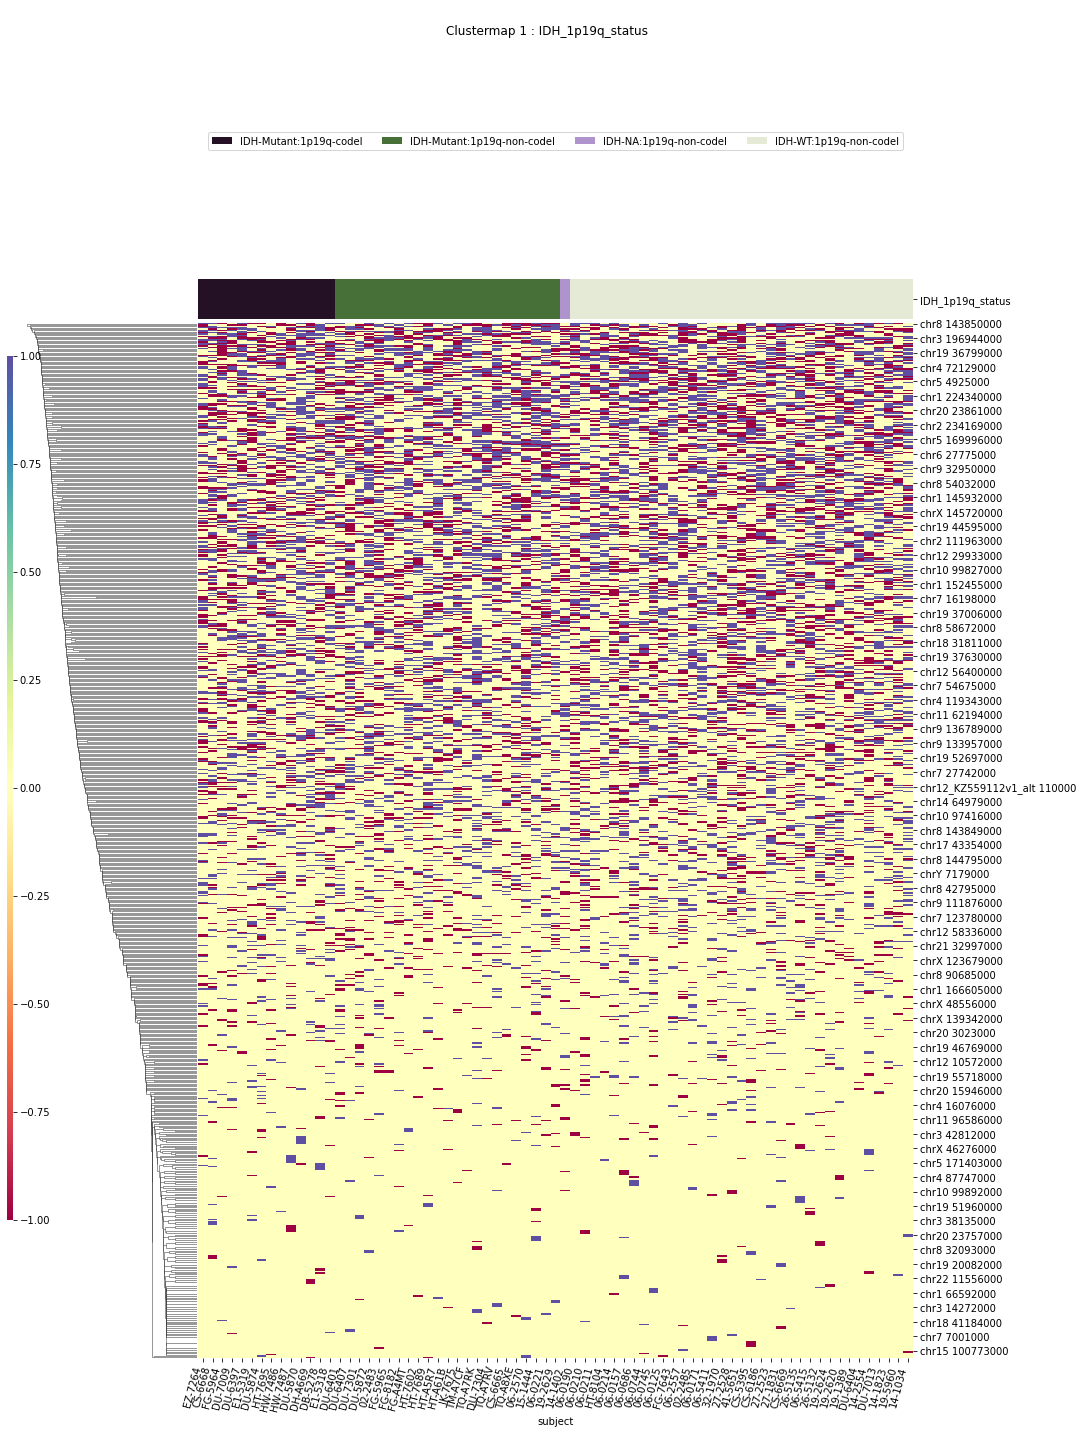

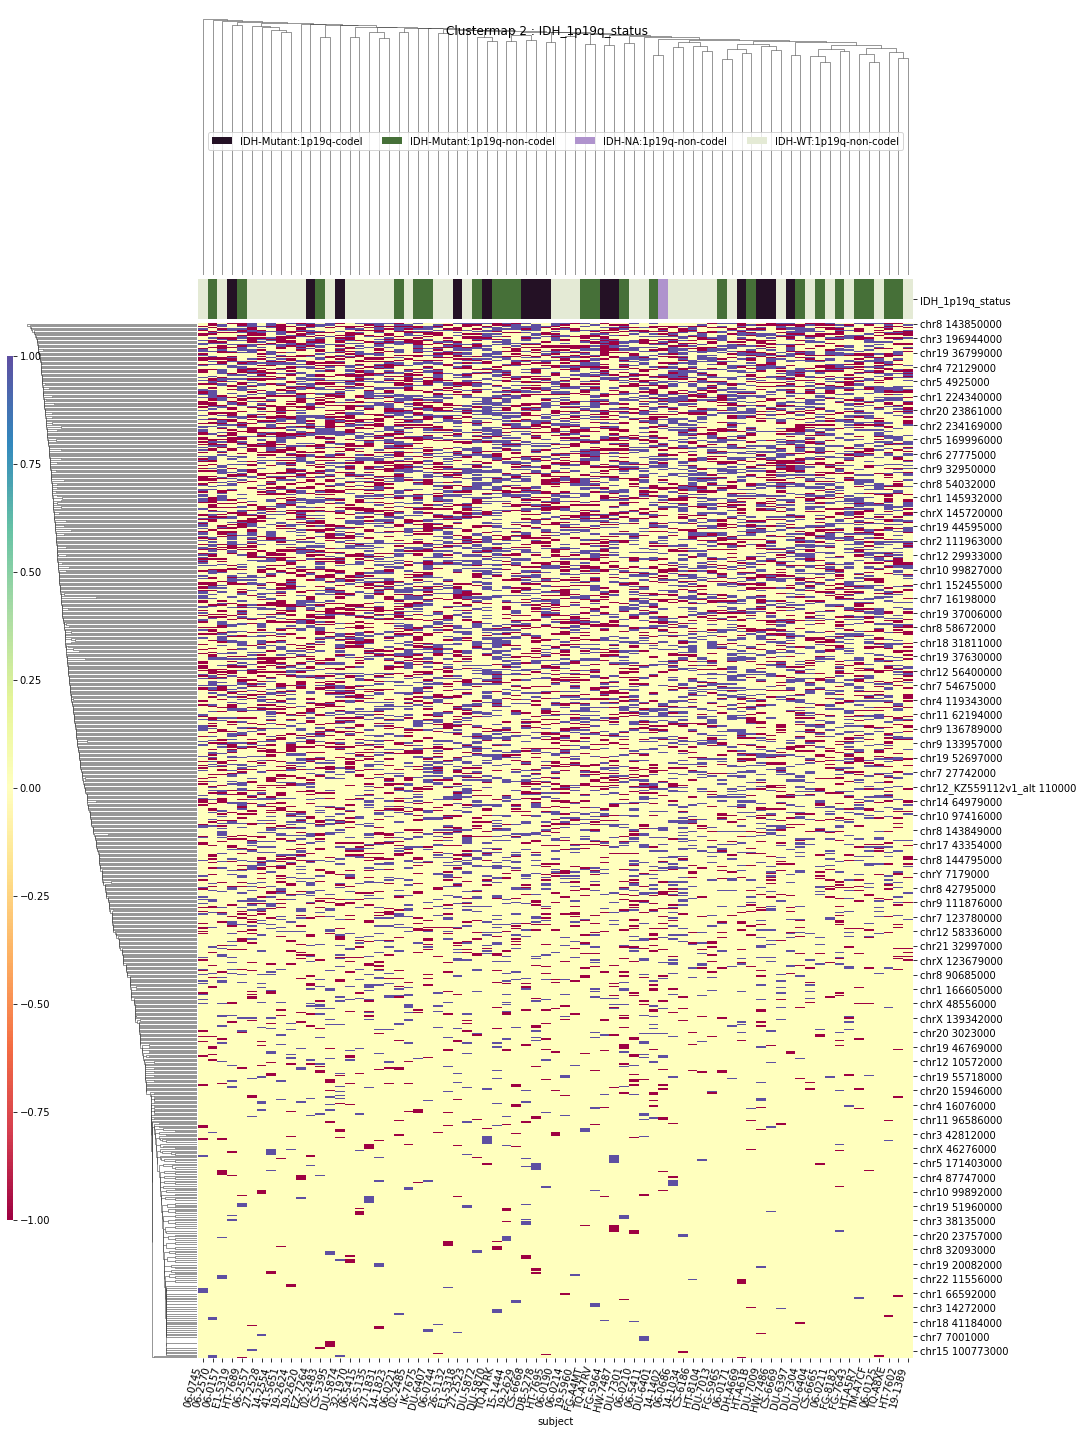

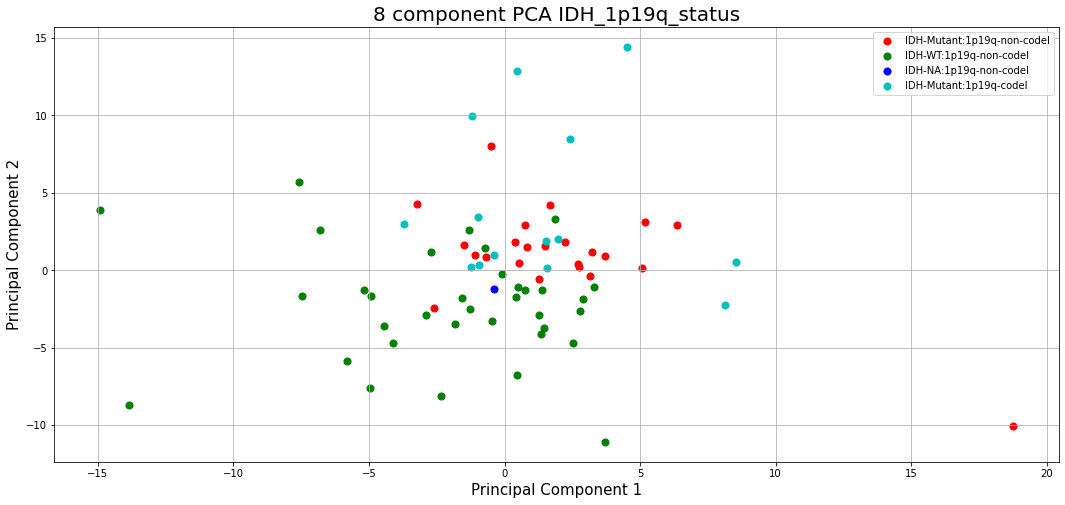

WHO_groups
T-Testing
Boxplotting
Clustermapping
['WHO_groups' 'chr1 104135000' 'chr1 10425000' 'chr1 10427000'
 'chr1 105473000' 'chr1 109767000' 'chr1 111259000' 'chr1 111800000'
 'chr1 114058000' 'chr1 114059000' 'chr1 120424000' 'chr1 12784000'
 'chr1 13353000' 'chr1 1409000' 'chr1 1410000' 'chr1 144451000'
 'chr1 145415000' 'chr1 145932000' 'chr1 146948000' 'chr1 147106000'
 'chr1 147240000' 'chr1 147733000' 'chr1 147734000' 'chr1 149093000'
 'chr1 150632000' 'chr1 15135000' 'chr1 15136000' 'chr1 151873000'
 'chr1 152455000' 'chr1 152456000' 'chr1 15379000' 'chr1 155600000'
 'chr1 155626000' 'chr1 155635000' 'chr1 156179000' 'chr1 156181000'
 'chr1 156182000' 'chr1 1580000' 'chr1 159767000' 'chr1 159768000'
 'chr1 160690000' 'chr1 160913000' 'chr1 160914000' 'chr1 160946000'
 'chr1 160947000' 'chr1 160949000' 'chr1 161016000' 'chr1 161017000'
 'chr1 161315000' 'chr1 161411000' 'chr1 161413000' 'chr1 165092000'
 'chr1 165093000' 'chr1 166605000' 'chr1 197406000' 'chr1 198129000'
 'c

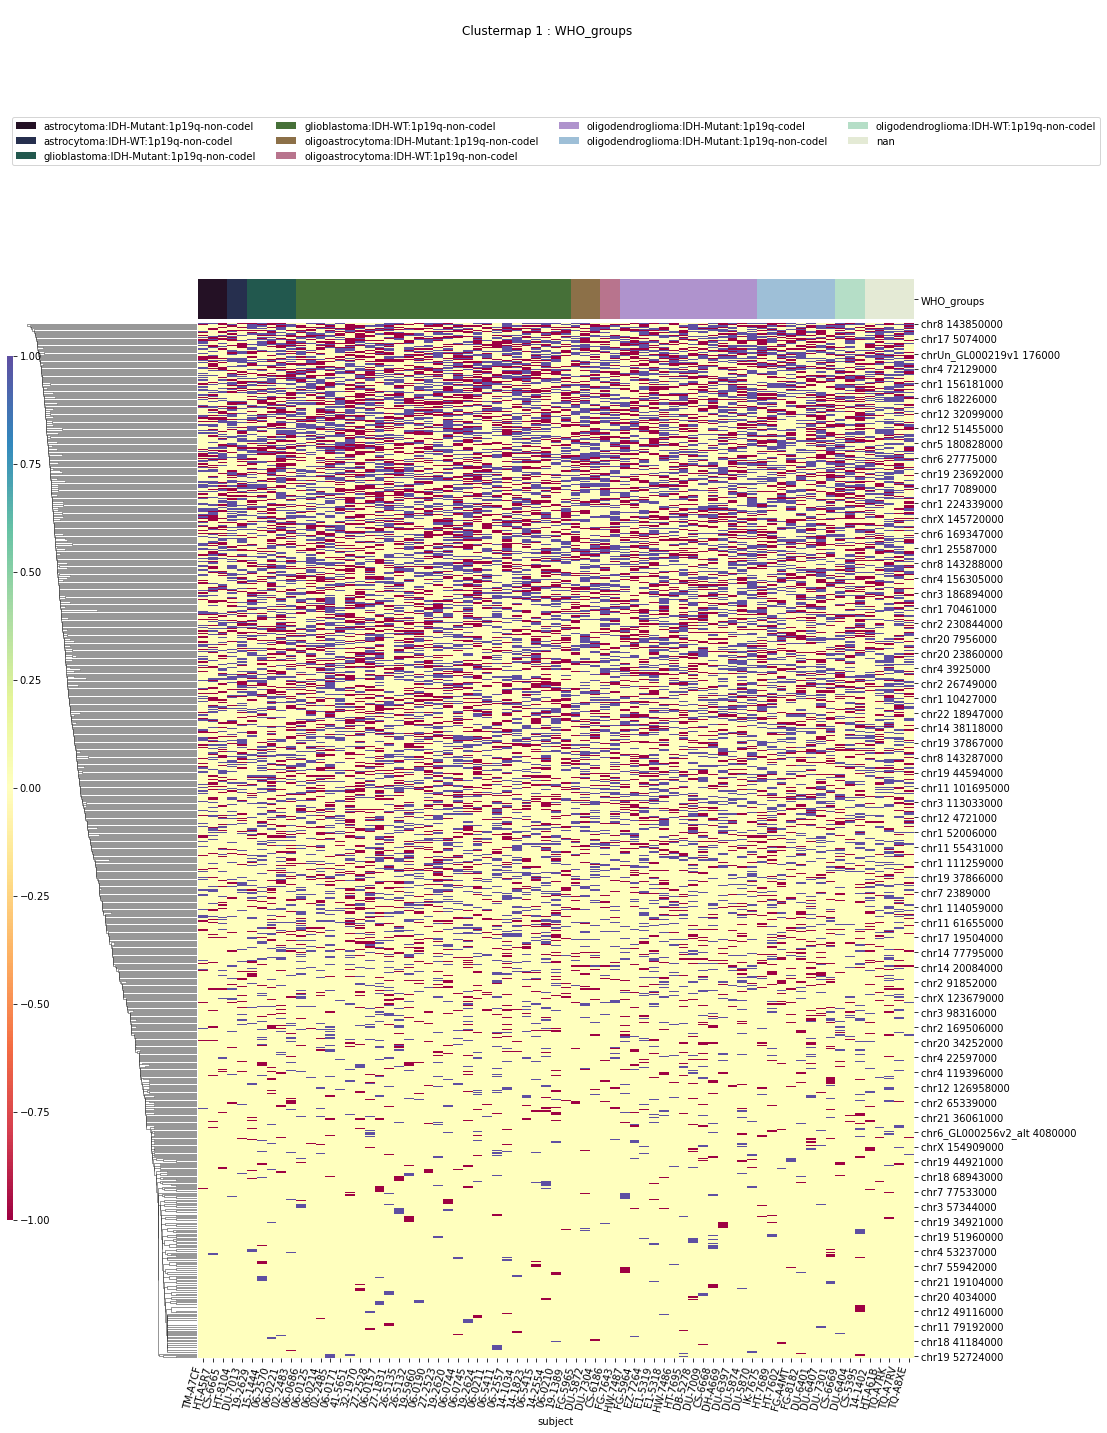

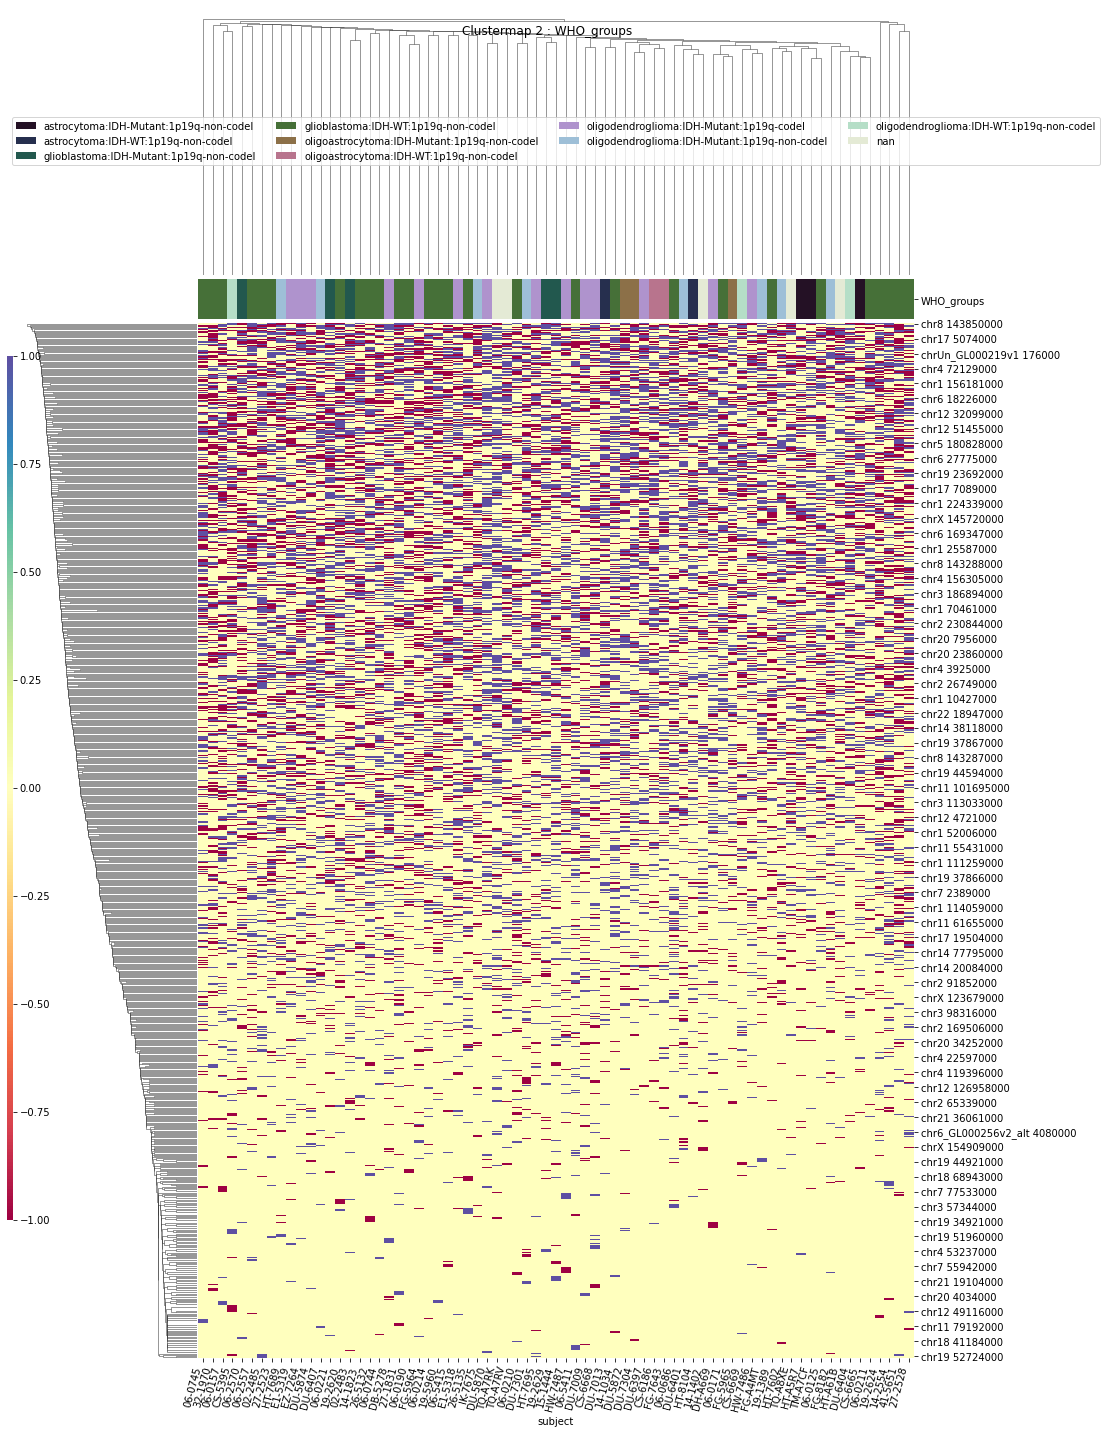

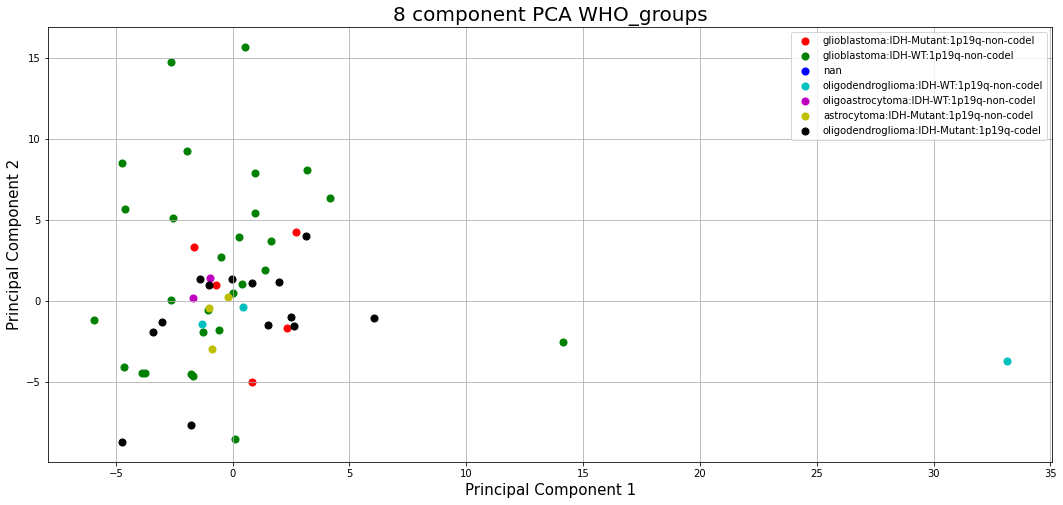

Triple_group
T-Testing


/Users/jake/Library/Python/3.8/lib/python/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/jake/Library/Python/3.8/lib/python/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Boxplotting
Clustermapping
['Triple_group' 'chr1 104135000' 'chr1 10427000' 'chr1 109767000'
 'chr1 111259000' 'chr1 111800000' 'chr1 114058000' 'chr1 114059000'
 'chr1 11891000' 'chr1 120424000' 'chr1 12784000' 'chr1 13353000'
 'chr1 1409000' 'chr1 1410000' 'chr1 144451000' 'chr1 145415000'
 'chr1 145932000' 'chr1 146948000' 'chr1 147106000' 'chr1 147240000'
 'chr1 147733000' 'chr1 147734000' 'chr1 149093000' 'chr1 150632000'
 'chr1 15135000' 'chr1 15136000' 'chr1 151873000' 'chr1 152455000'
 'chr1 152456000' 'chr1 15379000' 'chr1 155626000' 'chr1 155635000'
 'chr1 156179000' 'chr1 156181000' 'chr1 156182000' 'chr1 159767000'
 'chr1 159768000' 'chr1 160690000' 'chr1 160913000' 'chr1 160914000'
 'chr1 160946000' 'chr1 160947000' 'chr1 160949000' 'chr1 161016000'
 'chr1 161017000' 'chr1 161315000' 'chr1 161411000' 'chr1 161413000'
 'chr1 165092000' 'chr1 165093000' 'chr1 166605000' 'chr1 197406000'
 'chr1 198129000' 'chr1 209142000' 'chr1 211222000' 'chr1 213150000'
 'chr1 224339000' 'c

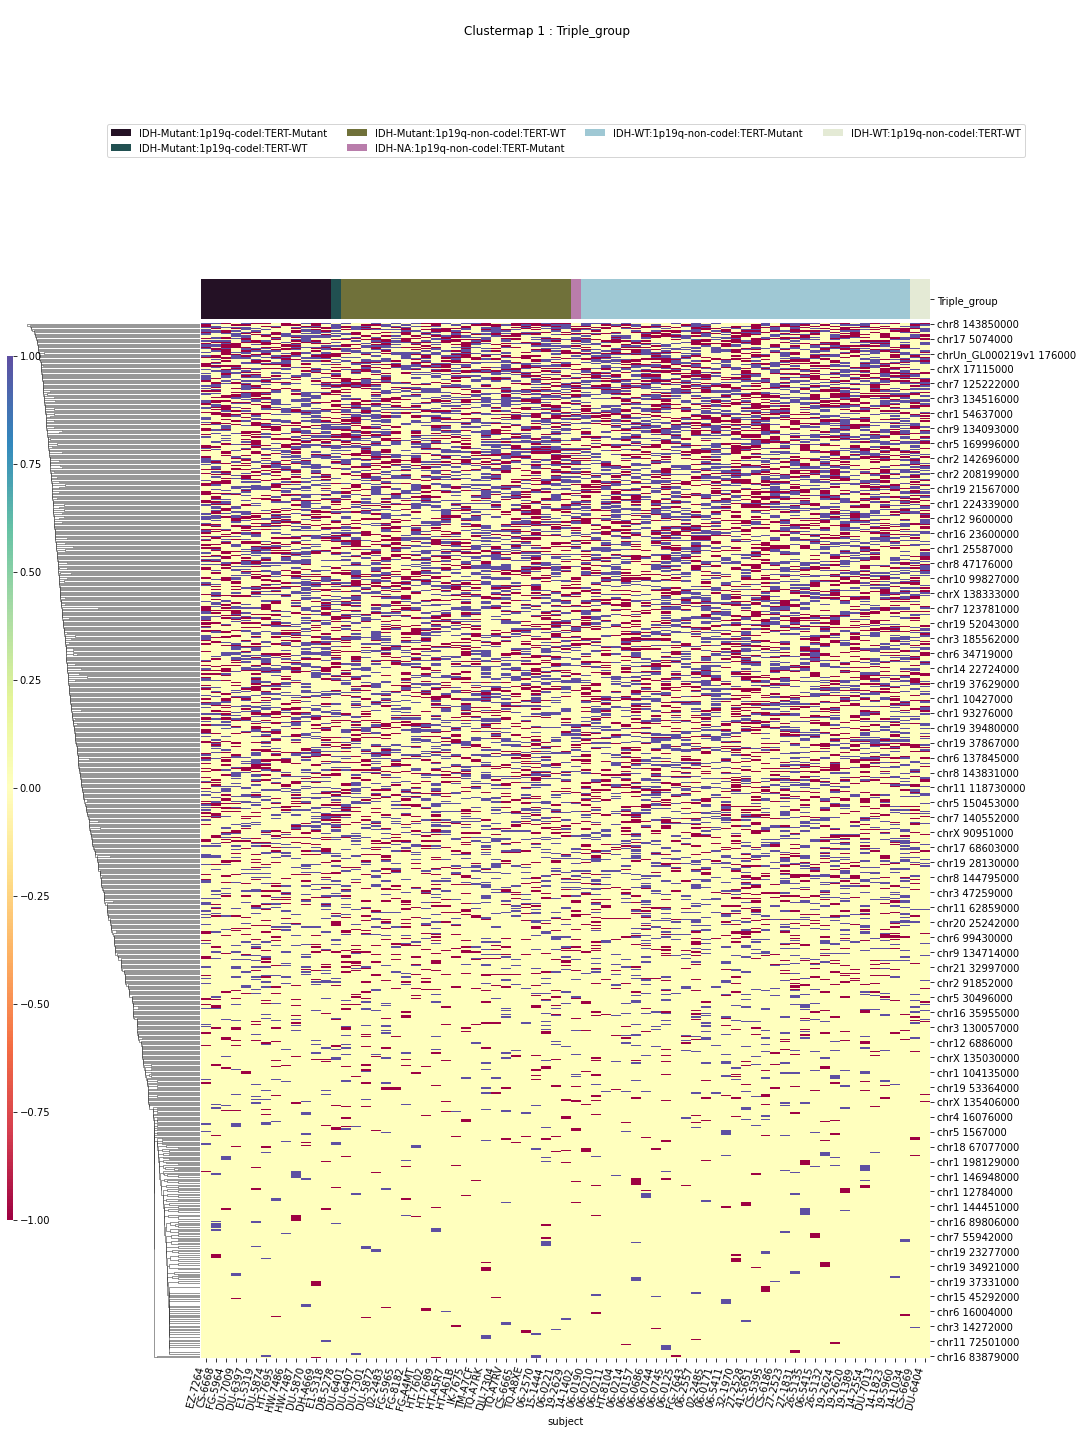

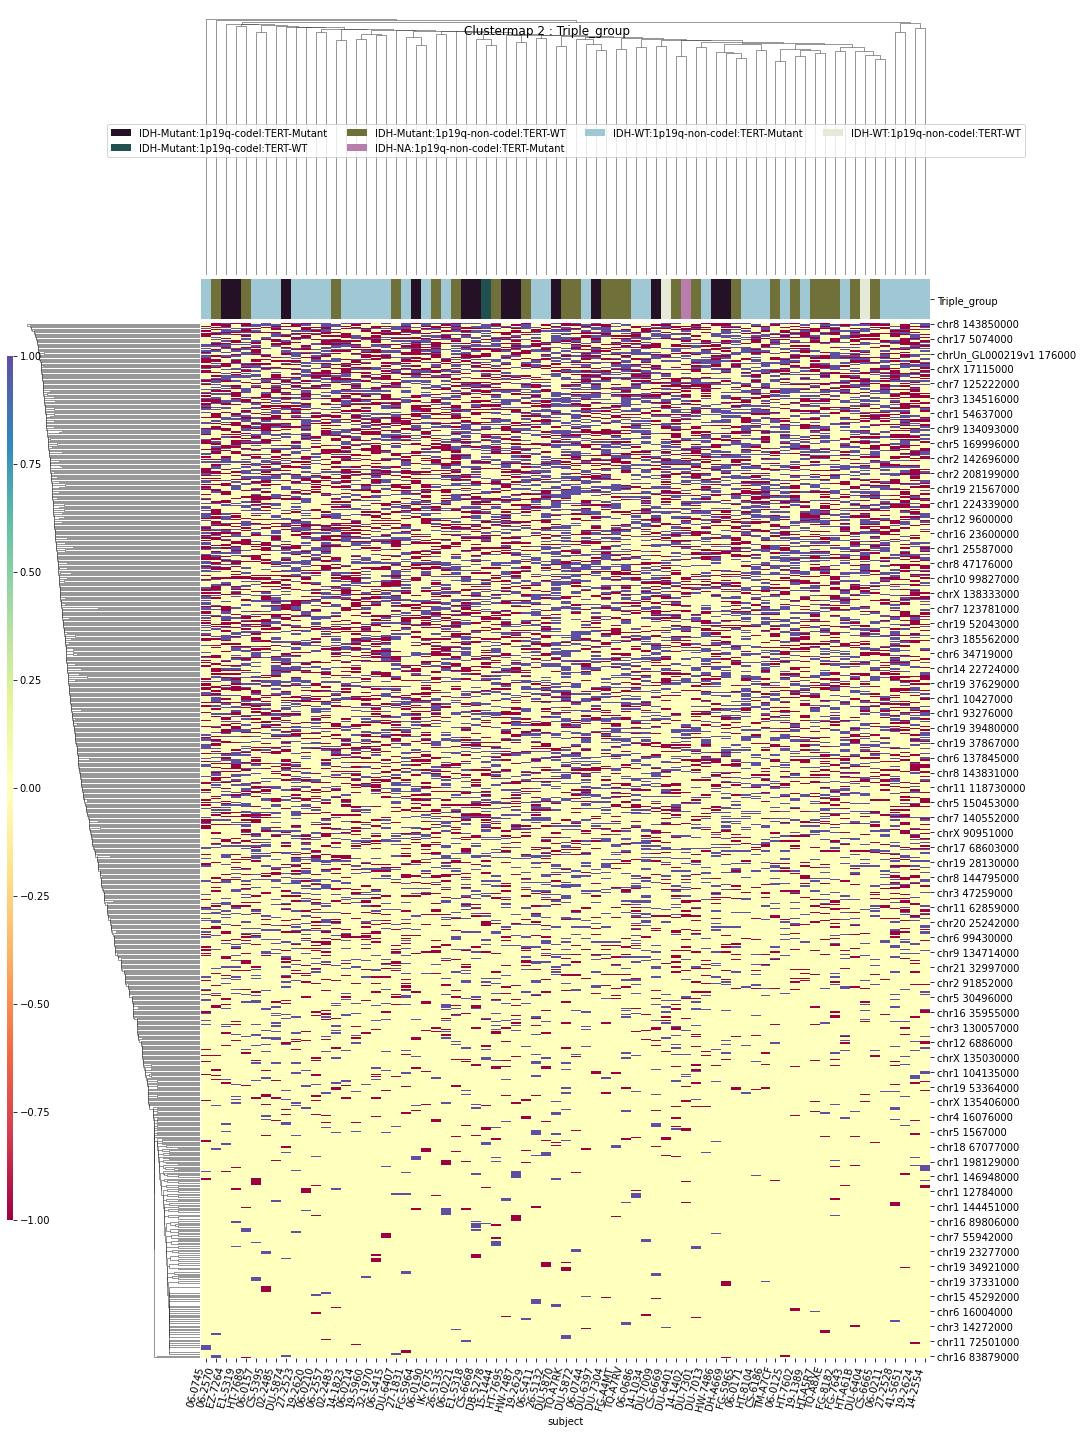

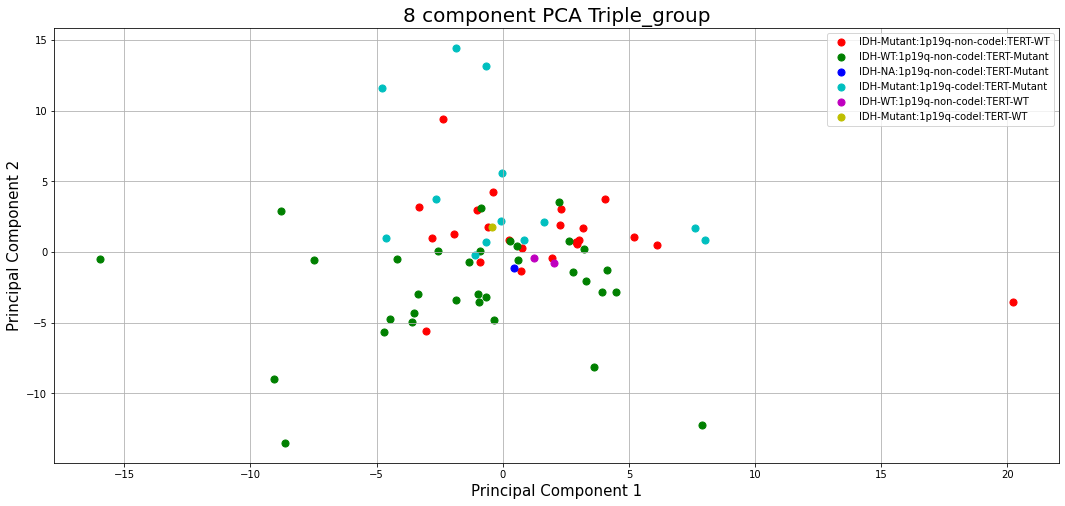

MGMT
T-Testing
Boxplotting
Clustermapping
['MGMT' 'chr1 104135000' 'chr1 10427000' 'chr1 111800000' 'chr1 114058000'
 'chr1 114059000' 'chr1 120424000' 'chr1 13353000' 'chr1 1409000'
 'chr1 1410000' 'chr1 144451000' 'chr1 145415000' 'chr1 147733000'
 'chr1 150632000' 'chr1 15135000' 'chr1 151873000' 'chr1 152455000'
 'chr1 155635000' 'chr1 1580000' 'chr1 159767000' 'chr1 160690000'
 'chr1 160914000' 'chr1 160946000' 'chr1 161315000' 'chr1 161411000'
 'chr1 161413000' 'chr1 165092000' 'chr1 188752000' 'chr1 209142000'
 'chr1 211222000' 'chr1 224339000' 'chr1 224340000' 'chr1 227606000'
 'chr1 227869000' 'chr1 236428000' 'chr1 247015000' 'chr1 247016000'
 'chr1 247582000' 'chr1 25587000' 'chr1 29338000' 'chr1 29359000'
 'chr1 29360000' 'chr1 33068000' 'chr1 39234000' 'chr1 40572000'
 'chr1 45529000' 'chr1 46320000' 'chr1 54637000' 'chr1 59915000'
 'chr1 65140000' 'chr1 66424000' 'chr1 66425000' 'chr1 66591000'
 'chr1 70461000' 'chr1 73130000' 'chr1 75383000' 'chr10 102391000'
 'chr10 102

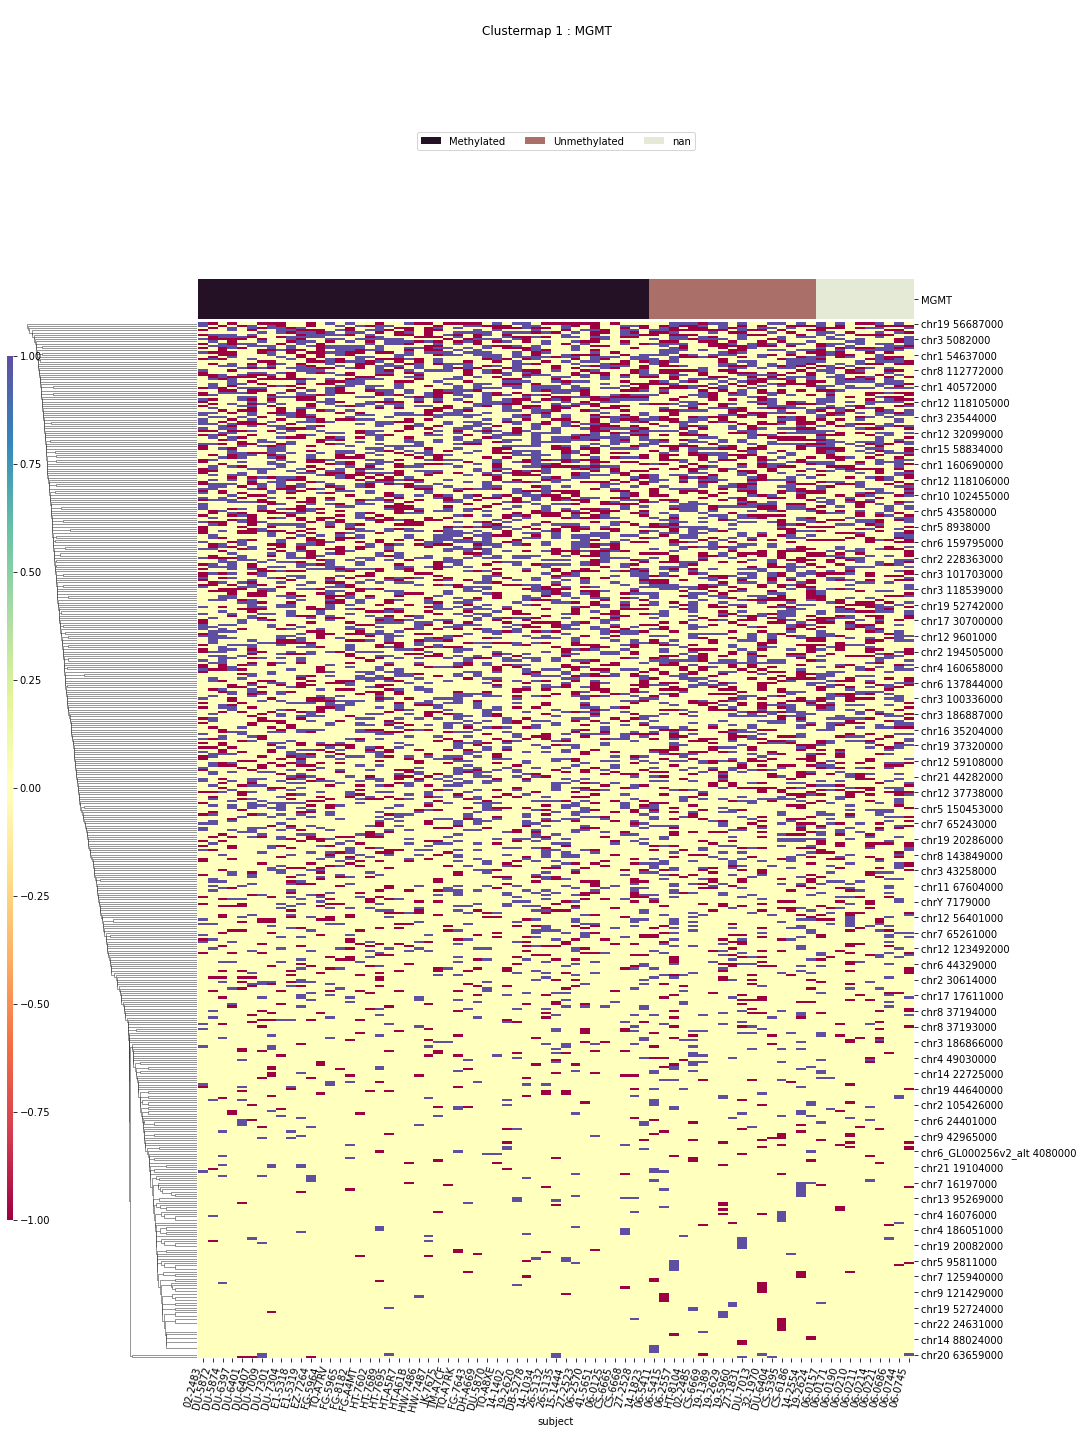

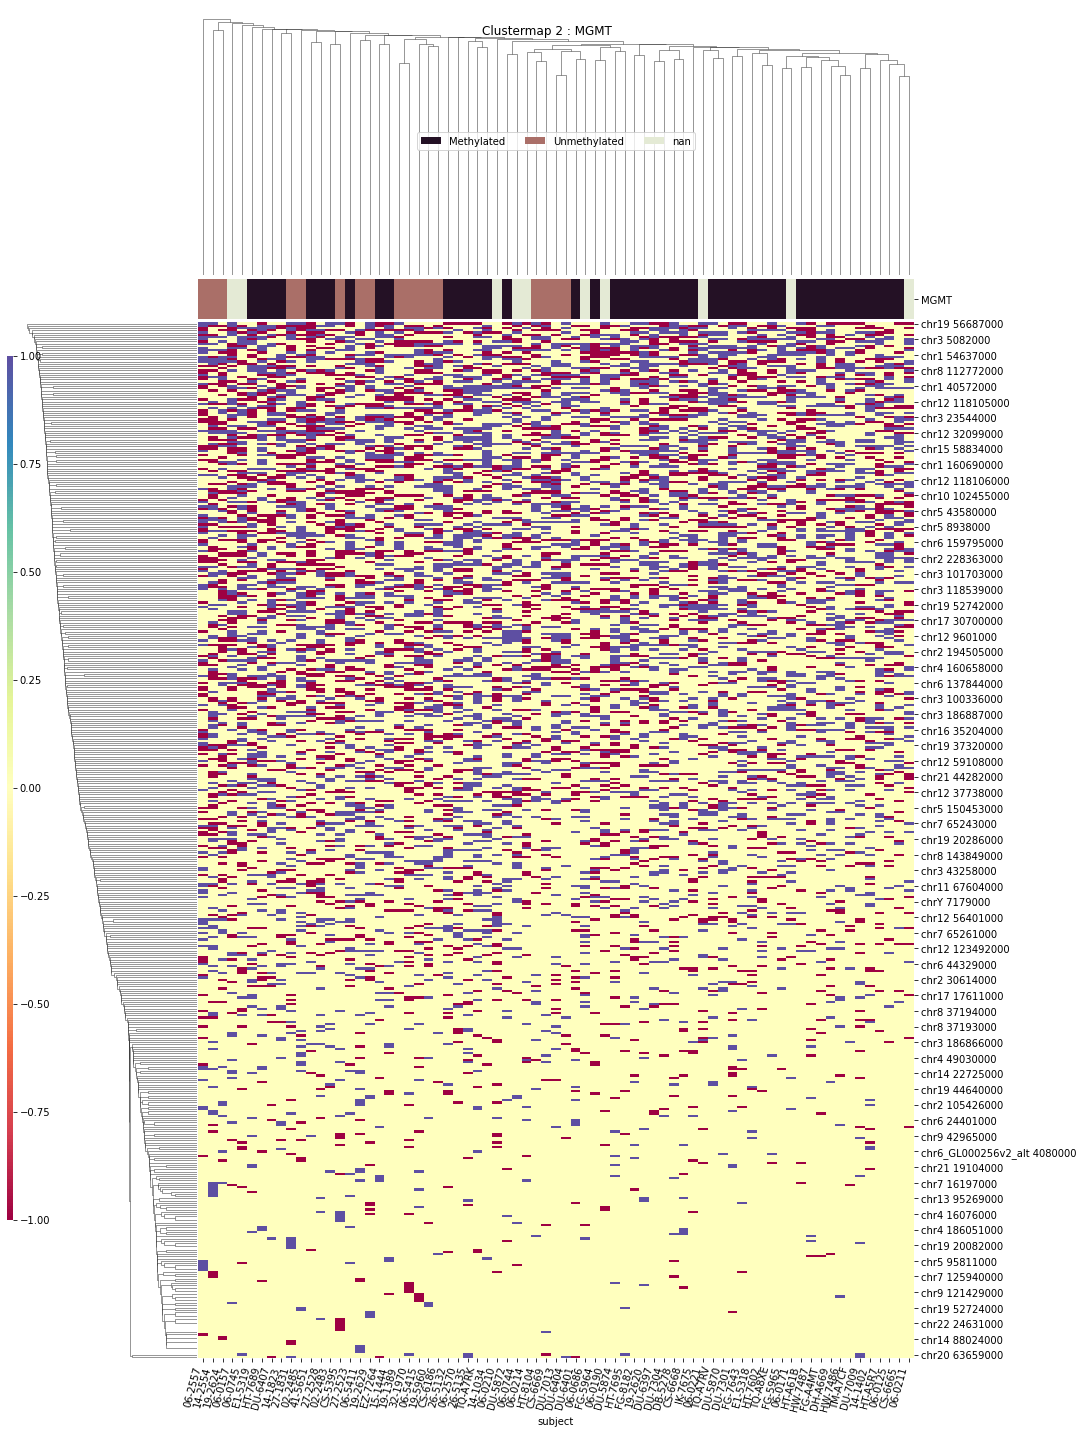

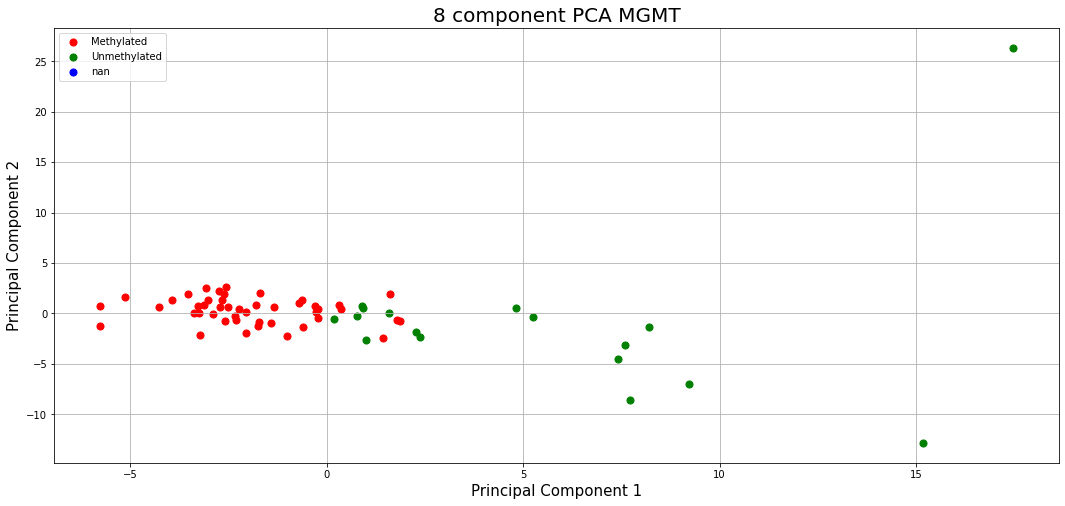

gender1
T-Testing
Boxplotting
Clustermapping
['chr1 104135000' 'chr1 10425000' 'chr1 111800000' 'chr1 114058000'
 'chr1 114059000' 'chr1 12784000' 'chr1 1410000' 'chr1 144451000'
 'chr1 145415000' 'chr1 145932000' 'chr1 146948000' 'chr1 147240000'
 'chr1 147733000' 'chr1 147734000' 'chr1 150632000' 'chr1 15135000'
 'chr1 15136000' 'chr1 152455000' 'chr1 155600000' 'chr1 156179000'
 'chr1 156181000' 'chr1 1580000' 'chr1 159767000' 'chr1 160913000'
 'chr1 160914000' 'chr1 160946000' 'chr1 160947000' 'chr1 160949000'
 'chr1 161017000' 'chr1 161411000' 'chr1 161413000' 'chr1 165092000'
 'chr1 165093000' 'chr1 197406000' 'chr1 198129000' 'chr1 209141000'
 'chr1 211222000' 'chr1 213150000' 'chr1 224340000' 'chr1 227606000'
 'chr1 227868000' 'chr1 247016000' 'chr1 27854000' 'chr1 29338000'
 'chr1 29339000' 'chr1 39234000' 'chr1 45529000' 'chr1 46320000'
 'chr1 46395000' 'chr1 46788000' 'chr1 54637000' 'chr1 66425000'
 'chr1 66591000' 'chr1 66592000' 'chr1 73129000' 'chr1 73130000'
 'chr1 7538

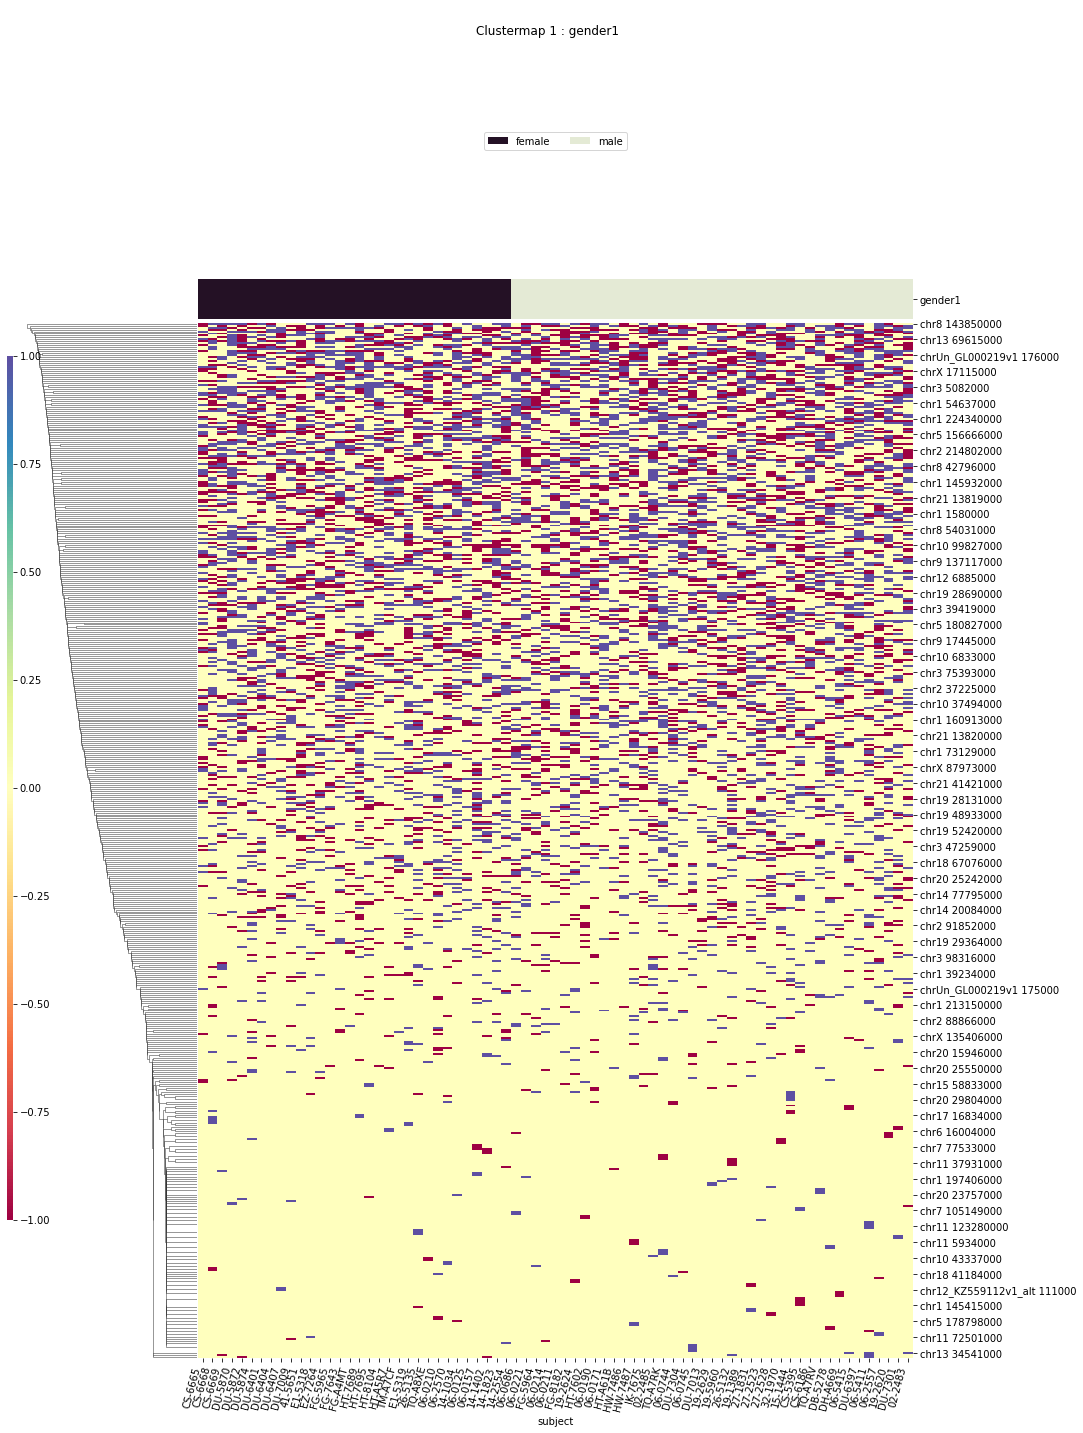

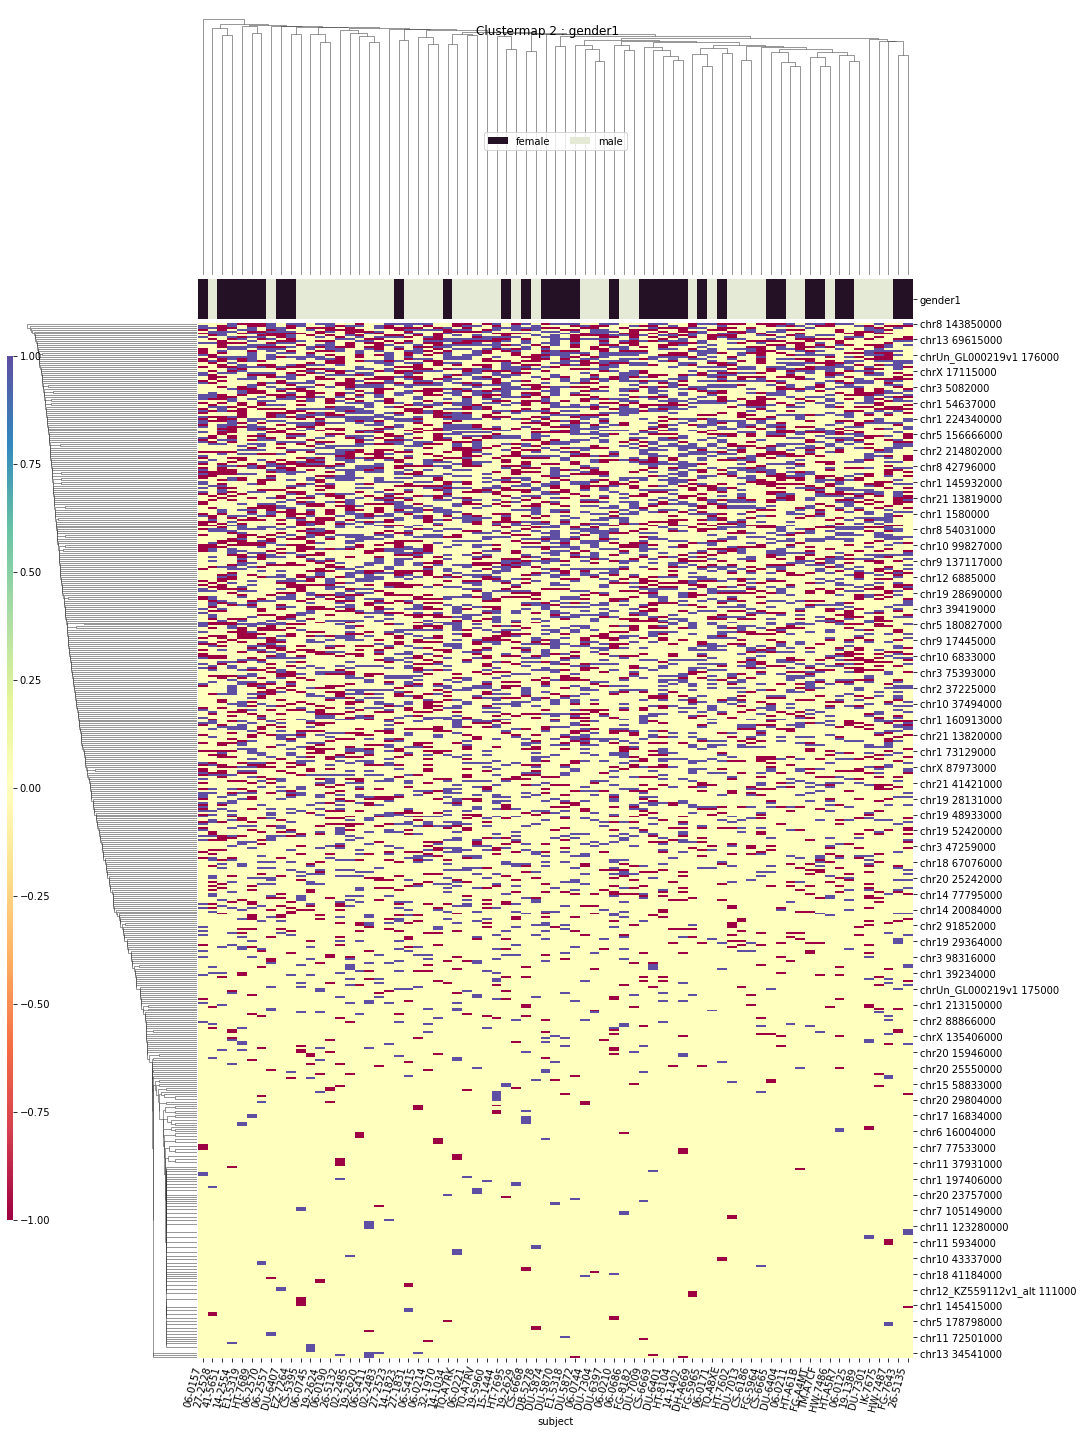

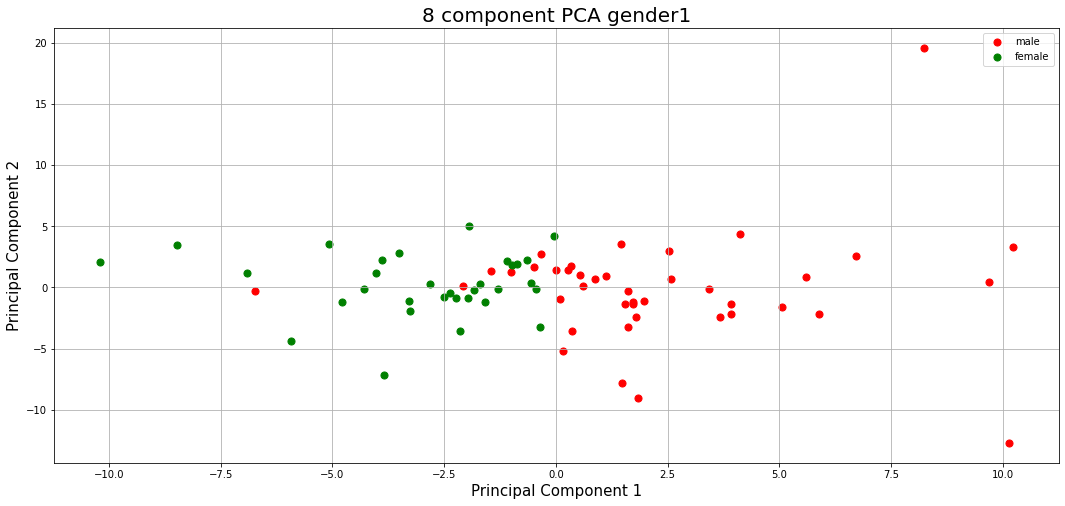

In [113]:
for column in 'primary_diagnosis','IDH','x1p19q','TERT','disease_type','IDH_1p19q_status','WHO_groups','Triple_group','MGMT','gender1':
    print(column)
    ttests_boxplots_and_heatmaps(compdf,
        compdf.columns[compdf.columns.str.contains("^chr")],column,box_p=1e-8,heat_p=0.5)

In [114]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

'20210621 12:53:04'

In [115]:
plt.rcParams["figure.figsize"] = [18.0,8.0]

In [116]:
pd.set_option('display.max_columns', default_max_columns)

In [117]:
pd.set_option('display.max_rows',default_max_rows)

In [118]:
pd.set_option('display.precision', default_precision)